# About The Project

This project uses computer vision and machine learning techniques to predict dog breeds from images. Dog Breed Categorization is a very specific application of Convolutional Neural Networks. The classification of Images by Convolutional Neural Network has proven to be highly efficient, but it has some drawbacks. This methodology requires a significant amount of images as training data and substantial time for training and achieving higher accuracy on the classification. Transfer Learning can be used to overcome this problem. Through Transfer learning, a pre-trained model can be fine-tuned to perform classification on image datasets that may be outside the domain of the pre trained model.


Dog breed identification falls under the category of fine-grained image classification problem, where inter-class variations are small and often one small part of the image considered makes the difference in the classification. This domain is especially challenging since the appearance of corresponding parts can vary dramatically, e.g., the faces of bulldogs and beagles are very different. In this work, we aim to use pre trained models to train and categorize dog breeds.We are using ResNet50, VGG16, VGG19, Xception and Inception_V3 model to classify the dog images, using the Tensorflow Library


Also we have another notebook name **Dog-Breed-Identification - Using AWS** in which instead of using pretrained models of Keras 
with bottleneck features we are designing and training our own CNN using AWS GPU and finding out accuracy on our dataset and since it is a Kaggle Competition we have also made an additional notebook name **Dog-Breed-Identification - Kaggle Competition Existing Kernels** which describes best performed Kernels in this competition

# Objective

Our goal is to identify different breeds of dogs using different pre-trained Keras models and our own designed GPU based CNN model and compare the accuracies between them on our dog image dataset.

# Introduction to CNN

Convolutional neural networks (CNN) have been used to great effect in applications such as object classification, scene recognition, and other applications. In many situations, we can imagine the features (both low-level and higher-level) that are learned by the CNNs in the process of training. However, when the objects the CNNs are trying to categorize share many similar features, such as the breeds of dogs, it becomes hard to imagine the specific features that CNNs must learn in order to categorize these dogs correctly. This is especially true if we take a look at the images below, where the 2 dogs share almost all the same visible features, but belong to different classes. The first image is of Alaskan Malamute and second image is of Husky dog It is therefore interesting to see how well CNNs can perform on only dog breeds, compared to labels from all classes of objects in the regular ImageNet.

<img style="border-width:0" src="https://www.dogbreedinfo.com/images14/AlaskanMalemuteKianaDSC_0033.JPG" />

<img style="border-width:0" src="http://dcbkeycdn-3ed6.kxcdn.com/dog-collars-blog/wp-content/uploads/2011/03/siberianhusky.jpg" />

Since the introduction of Deep Learning, there have been rapid advances in the field of Image Classification. Convolutional Neural Networks (CNN) have been used to a great effect in applications such as object classification, scene recognition, and other applications mainly due to its high accuracy. The success of CNNs is attributed to their ability to learn rich midlevel image representations as opposed to hand-designed low-level features used in other image classification methods. Learning CNNs, however, amounts to estimating millions of parameters and requires a very large number of annotated image samples. This property currently prevents application of CNNs to problems with limited training data. In this work we show how image representations learned with CNNs on large-scale annotated datasets can be efficiently transferred to other visual recognition tasks with limited amount of training data



# Initial Setup and Requirements

Download the data from the following link

Dog Images :  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

Human Images :  http://vis-www.cs.umass.edu/lfw/lfw.tgz 

Download the dog dataset. Unzip the folder and place it in the repo, at location <i>path/to/dog-project/dogImages</i><br>
Download the human dataset. Unzip the folder and place it in the repo, at location <i>path/to/dog-project/lfw</i>
<br><br>


Before you start running this file there are couples of things that needs to be installed

1. Keras 
2. TensorFlow 

<br><br>
Please follow thses two links to install Keras and TensorFlow respectively

Keras installation: https://keras.io/#installation

TensorFlow installation: https://www.tensorflow.org/install/


## Table of Contents

Step 1: Import Datasets of Dogs and Humans

Step 2: Detect Humans

Step 3: Detect Dogs

Step 4: Create a CNN to Identify Dog Breeds (using Transfer Learning)

-  4.1: Using ResNet50
-  4.2: Using VGG16
-  4.3: Using VGG19
-  4.4: Using Xception
-  4.5: Using Inception_V3

Step 5: Write the Algorithm to identify Dog Breeds

Step 6: Test the Algorithm



In [1]:
%matplotlib inline  
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

F:\Anacondaa3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Step 1: Import Datasets of Dogs and Humans

### Import Dog Dataset



In the code cell below, we import a dataset of dog images. We populate a few variables through the use of the **load_files** function from the scikit-learn library:

-  **train_files**, **valid_files**, **test_files** - numpy arrays containing file paths to images

-  **train_targets**, **valid_targets**, **test_targets** - numpy arrays containing onehot-encoded classification labels

-  **dog_names** - list of string-valued dog breed names for translating labels

In [2]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset


In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array **human_files**.

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


# Step 2: Detect Humans

We have used OpenCV's implementation of Haar feature-based cascade classifiers to detect human faces in images. 
OpenCV provides many pre-trained face detectors, stored as XML files on github. We have downloaded one of these detectors and stored it at <i>path/to/dog-project/haarcascades</i>.



Link to know more about Haar features [Haar](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html)

Github link used for downloading haarcascades features [Haarfeatures directory](https://github.com/opencv/opencv/tree/master/data/haarcascades)

The above Github link also contains many other haarcascades features for various other object used for image detection purpose

In the code cell below, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 5


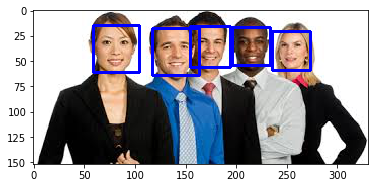

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
# we have downloaded haar feature for face detection from above github link
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread('humanTestImage/human2.jpg')
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    #add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale. The **detectMultiScale** function executes the classifier stored in **face_cascade** and takes the grayscale image as a parameter.

In the above code, **faces** is a numpy array of detected faces, where each row corresponds to a detected face. Each detected face is a 1D array with four entries that specifies the bounding box of the detected face. The first two entries in the array (extracted in the above code as x and y) specify the horizontal and vertical positions of the top left corner of the bounding box. The last two entries in the array (extracted here as w and h) specify the width and height of the box.

### Writing a Human Face Detector

Now we have wrote a Human face Detector function that returns True if a human face is detected in an image and False otherwise. This function, named **face_detector**, takes a string-valued file path to an image as input

In [5]:
# returns "True" if face is detected in image 
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assessing the Human Face Detector

<br>

Here we are evaluating our human face detector on a subset of our image collections for humans and dogs.

i.e We want to find out

How many of the first 100 images in humans have detected a human face?

How many of the first 100 images in dogs have detected a human face?

Ideally, the detector should report human faces with 100% in the human photos and 0% in the dog photos.

Note: Here we are taking first 100 images of humans from human dataset and first 100 images from train folder of dog dataset

In [6]:
# Selecting subset of data for faster evaluation
human_files_short = human_files[:100]
dog_files_short = train_files[:100]


human_count = 0
for human_img in human_files_short:
    if face_detector(human_img):
        human_count = human_count + 1
        
dog_count = 0
for dog_img in dog_files_short:
    if face_detector(dog_img):
        dog_count = dog_count + 1



        
print(str(human_count) + " no of the humans were detected as humans in humans photo library")
print(str(dog_count) + " no of the dogs were detected as humans in dogs photo library ")


99 no of the humans were detected as humans in humans photo library
12 no of the dogs were detected as humans in dogs photo library 


As you can see, that the face detector isn't perfect as it detected 12 no of dogs as humans in dogs photo library and also out of 100 human images in human photo library it could detect only 99 humans.

# Step 3: Detect Dogs

Now we will use keras pre-trained ResNet-50 model to detect dogs in images. The first line of code downloads keras pre-trained model ResNet50 from keras library. In the next line we are downloading weights for the ResNet50 model which is imagenet.

**What is ImageNet ?**

ImageNet is an image dataset organized according to the WordNet hierarchy. Basically its a very large database which is majorly used for image classification and other similar related tasks. ImageNet contains over 10 million URLs where each link refers to an image containing an object from one of 1000 categories. When an image is parsed to thses pre-trained model i.e ResNet50 currently, it returns a prediction for the object which is contained in that image.

To know more about ImageNet please refer this link [ImageNet](http://www.image-net.org/about-overview)



In [7]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions


# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-processing the Data



When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape <br><br>

<center>(nb_samples, rows,columns,channels)</center>

where **nb_samples** corresponds to the total number of images, and rows, columns & channels correspond to the number of rows, columns, and channels for each image, respectively.<br>

The **path_to_tensor** function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN. The function first loads the image and resizes it to a square image that is 224 X 224 pixels. Next, the image is converted to an array, which is then resized to a 4D tensor. In this case, since we are working with color images, each image has three channels. Likewise, since we are processing a single image, the returned tensor will always have shape<br>

<center>(1, 224, 224, 3).</center>

The **paths_to_tensor** function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape<br><br>

<center>(nb_samples, 224, 224, 3).</center>

Here, **nb_samples** can be a single image or an array of image paths.<br>

In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with Keras

Getting the 4D tensor ready for pre-trained models in Keras, requires some additional processing. First, the RGB image is converted to BGR by reordering the channels. All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as [103.939, 116.779, 123.68] and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.This is implemented in the imported function **preprocess_input**.<br>

To know more about  **preprocess_input**, you can check this link to know more about it [preprocess_input](https://github.com/keras-team/keras/blob/master/keras/applications/imagenet_utils.py)


Now that we have a way to format our image for supplying to pre-trained model, we are now ready to use the model to extract the predictions. This is accomplished with the predict method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category. This is implemented in the keras_predict_labels function below.


By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).



In [9]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def keras_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

While looking at the dictionary, you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from 'Chihuahua' to 'Mexican hairless'. Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the **keras_predict_labels** function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the **dog_detector** function below, which returns True if a dog is detected in an image (and False if not).

### Writing Dog Detector

In [10]:
def dog_detector(img_path):
    prediction = keras_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

### Assessing the Dog Detector

<br>
Let's evaluate our dog detector on a subset of our image collections for humans and dogs.

i.e We want to find out

How many of the first 100 images in humans have detected a dog?

How many of the first 100 images in dogs have detected a dog?

Ideally, the detector should report dog faces with 100% in the dog photos and 0% in the human photos.

Note: Here also we are taking first 100 images of humans from human dataset and first 100 images from train folder of dog dataset just like we did in Huamn Detector

In [11]:
human_count = 0
for human_img in human_files_short:
    if dog_detector(human_img):
        human_count = human_count + 1
        
dog_count = 0
for dog_img in dog_files_short:
    if dog_detector(dog_img):
        dog_count = dog_count + 1
        
print(str(human_count) + " no of the humans were detected as dogs in humans photo library")
print(str(dog_count) + " no of the dogs were detected as dogs in dogs photo library")

1 no of the humans were detected as dogs in humans photo library
100 no of the dogs were detected as dogs in dogs photo library


As you can see, the dog detector is also not perfect but it performed better than the human face detector as it detected only 1 human as dogs in humans photo library and it successfully identified all dog images as dogs in dog photo library

# Step 4: Create a CNN to Identify Dog Breeds (using Transfer Learning)

### Downloading the Bottleneck Features

Here we are going to use the Bottleneck features for our model so kindly download them and store  at location <i>path/to/dog-project/bottleneck_features</i>

Links for downloading Bottleneck feature: <br>
-  ResNet50 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz
-  VGG16 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz
-  VGG19 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz
-  Xception : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz
-  Inception_V3 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz"


**What are Bottleneck features ? **

Bottleneck features are generated from a multi-layer perceptron in which one of the internal layers has a small number of hidden units, relative to the size of the other layers.This small layer creates a constriction in the network that forces the information pertinent to classification into a low dimensional representation. Bottleneck features are most commonly used in an autoencoder which the neural network is trained to predict the input features themselves.


To know more about bottleneck features please refer this link https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Bottleneck-Interspeech2011-pub.pdf

### What  is Transfer learning?

Transfer learning or inductive transfer is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem

In transfer learning, you essentially use the CNN architecture of a state-of-the-art model, and then perform additional training to learn from your provided dataset. Remember, training is simply finding the best parameters for our model. In convolutional networks, these parameters represent filters which can create feature mappings of your original input. Early layers in the network learn to identify general shapes and patterns in the image, whereas later layers look for more specific features within your image. We can leverage these pretrained filters from existing models rather than spending multiple hours training on a GPU every time we want to build a CNN for object recognition.

A convolutional network architecture commonly consists of a series of convolutional and pooling layers, followed by fully connected layers that figure out how to combine the extracted feature mappings to make a classification decision.

<img style="border-width:0" src="http://bennycheung.github.io/images/deep-transfer-learning-on-small-dataset/VGG16_ConvNet_700.jpg" />


A good transfer learning strategy is outlined as following steps:

- Freezing the lower ConvNet blocks (blue) as fixed feature extractor. Take a ConvNet pretrained on ImageNet, remove the last fully-connected layers, then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. In an VGG16 network, this would compute a 4096-D vector for every image that contains the activations of the hidden layer immediately before the classifier. These features are termed as CNN codes.

- Training the new fully-connected layers (green, aka. bottleneck layers). Extract the CNN codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.

- Fine-tuning the ConvNet. Replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the back-propagation to part of the higher layers (yellow+green).

Transfer learning helps to save a lot of training time and using transfer learning we can achieve much higher accuracy as compared to other models that are developed from scratch

## Step 4.1: Using ResNet50

- Unlike traditional sequential network architectures such as AlexNet, and VGG, ResNet is instead a form of “exotic architecture” that relies on micro-architecture modules (also called “network-in-network architectures”).

- The term micro-architecture refers to the set of “building blocks” used to construct the network. A collection of micro-architecture building blocks (along with your standard CONV, POOL, etc. layers) leads to the macro-architecture (i.e,. the end network itself). 

- The ResNet architecture has become a seminal work, demonstrating that extremely deep networks can be trained using standard SGD (and a reasonable initialization function) through the use of residual modules. Further accuracy can be obtained by updating the residual module to use identity mappings, ResNet-50 is 50 layers deep.

<img style="border-width:0" src="http://www.deeplearningmodel.net/img/resnet/resnet_block.png" />



- Deeper nets almost always degrade in performance 

- Instead of trying to learn an underlying mapping from x to H(x), learn the difference between the two, or the “residual.” Then, to calculate H(x), we can just add the residual to the input.

- Say the residual is F(x)=H(x)-x. Now, instead of trying to learn H(x) directly, our nets are trying to learn F(x)+x.

- Each “block” in ResNet consists of a series of layers and a “shortcut” connection adding the input of the block to its output. The “add” operation is performed element-wise, and if the input and output are of different sizes, zero-padding or projections (via 1x1 convolutions) can be used to create matching dimensions.

- Even though ResNet is much deeper than VGG16 and VGG19, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers — this reduces the model size down to 102MB for ResNet50.


### Extracting ResNet50 bottleneck features

In [12]:
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

dog_breeds = len(dog_names)

### Defining the Model Architecture

First, we have used a GlobalAveragePooling layer to flatten the features into a vector that could be fed into a fully-connected layer. I was also experiencing some overfitting even with dropout, so I decided to regularize the dense layer's weights. Lastly, the softmax layer predicts the probability of each breed.

In [13]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
Resnet50_model.add(Dropout(0.4))
Resnet50_model.add(Dense(dog_breeds, activation='softmax'))

Resnet50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               307350    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               20083     
Total params: 327,433
Trainable params: 327,433
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [14]:
from keras.optimizers import Adam, Adamax

Resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

### Train the Model

We will train the model in the code cell below and we are using model checkpointing to save the model that attains the best validation loss.

In [15]:
from keras.callbacks import ModelCheckpoint 

epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.ResNet50.hdf5', verbose=1, save_best_only=True)

Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 2:55 - loss: 6.7985 - acc: 0.0000e+0 - ETA: 27s - loss: 6.6070 - acc: 0.0143    - ETA: 15s - loss: 6.5117 - acc: 0.02 - ETA: 10s - loss: 6.3868 - acc: 0.03 - ETA: 8s - loss: 6.3027 - acc: 0.0385 - ETA: 7s - loss: 6.2476 - acc: 0.035 - ETA: 6s - loss: 6.1890 - acc: 0.044 - ETA: 5s - loss: 6.1252 - acc: 0.046 - ETA: 5s - loss: 6.0731 - acc: 0.052 - ETA: 5s - loss: 6.0232 - acc: 0.058 - ETA: 4s - loss: 5.9735 - acc: 0.061 - ETA: 4s - loss: 5.9157 - acc: 0.067 - ETA: 4s - loss: 5.8821 - acc: 0.068 - ETA: 3s - loss: 5.8506 - acc: 0.070 - ETA: 3s - loss: 5.8143 - acc: 0.073 - ETA: 3s - loss: 5.7814 - acc: 0.075 - ETA: 3s - loss: 5.7389 - acc: 0.078 - ETA: 3s - loss: 5.6940 - acc: 0.081 - ETA: 2s - loss: 5.6576 - acc: 0.084 - ETA: 2s - loss: 5.6204 - acc: 0.087 - ETA: 2s - loss: 5.5728 - acc: 0.089 - ETA: 2s - loss: 5.5374 - acc: 0.095 - ETA: 2s - loss: 5.4991 - acc: 0.098 - ETA: 2s - l

6680/6680 [==============================] - ETA: 3s - loss: 1.1447 - acc: 0.750 - ETA: 2s - loss: 1.2471 - acc: 0.750 - ETA: 2s - loss: 1.2813 - acc: 0.723 - ETA: 2s - loss: 1.2595 - acc: 0.720 - ETA: 2s - loss: 1.2558 - acc: 0.728 - ETA: 2s - loss: 1.2528 - acc: 0.745 - ETA: 2s - loss: 1.2345 - acc: 0.759 - ETA: 2s - loss: 1.2481 - acc: 0.756 - ETA: 2s - loss: 1.2327 - acc: 0.759 - ETA: 2s - loss: 1.2243 - acc: 0.762 - ETA: 2s - loss: 1.2301 - acc: 0.760 - ETA: 2s - loss: 1.2240 - acc: 0.760 - ETA: 2s - loss: 1.2239 - acc: 0.758 - ETA: 2s - loss: 1.2183 - acc: 0.761 - ETA: 2s - loss: 1.2186 - acc: 0.765 - ETA: 2s - loss: 1.2261 - acc: 0.763 - ETA: 1s - loss: 1.2215 - acc: 0.765 - ETA: 1s - loss: 1.2205 - acc: 0.767 - ETA: 1s - loss: 1.2232 - acc: 0.768 - ETA: 1s - loss: 1.2243 - acc: 0.768 - ETA: 1s - loss: 1.2203 - acc: 0.770 - ETA: 1s - loss: 1.2252 - acc: 0.769 - ETA: 1s - loss: 1.2306 - acc: 0.767 - ETA: 1s - loss: 1.2276 - acc: 0.769 - ETA: 1s - loss: 1.2291 - acc: 0.768 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.7187 - acc: 0.900 - ETA: 2s - loss: 0.8627 - acc: 0.864 - ETA: 2s - loss: 0.8530 - acc: 0.853 - ETA: 2s - loss: 0.8893 - acc: 0.850 - ETA: 2s - loss: 0.8742 - acc: 0.859 - ETA: 2s - loss: 0.8852 - acc: 0.850 - ETA: 2s - loss: 0.8756 - acc: 0.859 - ETA: 2s - loss: 0.8743 - acc: 0.858 - ETA: 2s - loss: 0.8899 - acc: 0.849 - ETA: 2s - loss: 0.8864 - acc: 0.848 - ETA: 2s - loss: 0.8852 - acc: 0.848 - ETA: 2s - loss: 0.8814 - acc: 0.848 - ETA: 2s - loss: 0.8840 - acc: 0.846 - ETA: 2s - loss: 0.8859 - acc: 0.845 - ETA: 2s - loss: 0.8815 - acc: 0.848 - ETA: 2s - loss: 0.8830 - acc: 0.847 - ETA: 1s - loss: 0.8893 - acc: 0.846 - ETA: 1s - loss: 0.8889 - acc: 0.845 - ETA: 1s - loss: 0.8866 - acc: 0.848 - ETA: 1s - loss: 0.8843 - acc: 0.850 - ETA: 1s - loss: 0.8894 - acc: 0.848 - ETA: 1s - loss: 0.8943 - acc: 0.845 - ETA: 1s - loss: 0.8955 - acc: 0.845 - ETA: 1s - loss: 0.8996 - acc: 0.843 - ETA: 1s - loss: 0.8989 - acc: 0.842 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.5784 - acc: 0.900 - ETA: 2s - loss: 0.7253 - acc: 0.892 - ETA: 2s - loss: 0.7119 - acc: 0.900 - ETA: 2s - loss: 0.7470 - acc: 0.892 - ETA: 2s - loss: 0.7614 - acc: 0.880 - ETA: 2s - loss: 0.7755 - acc: 0.877 - ETA: 2s - loss: 0.7891 - acc: 0.873 - ETA: 2s - loss: 0.7913 - acc: 0.874 - ETA: 2s - loss: 0.7912 - acc: 0.876 - ETA: 2s - loss: 0.7825 - acc: 0.877 - ETA: 2s - loss: 0.7822 - acc: 0.877 - ETA: 2s - loss: 0.7779 - acc: 0.879 - ETA: 2s - loss: 0.7708 - acc: 0.881 - ETA: 2s - loss: 0.7696 - acc: 0.880 - ETA: 2s - loss: 0.7701 - acc: 0.879 - ETA: 2s - loss: 0.7742 - acc: 0.876 - ETA: 1s - loss: 0.7694 - acc: 0.876 - ETA: 1s - loss: 0.7715 - acc: 0.875 - ETA: 1s - loss: 0.7709 - acc: 0.875 - ETA: 1s - loss: 0.7698 - acc: 0.876 - ETA: 1s - loss: 0.7709 - acc: 0.875 - ETA: 1s - loss: 0.7702 - acc: 0.875 - ETA: 1s - loss: 0.7696 - acc: 0.876 - ETA: 1s - loss: 0.7730 - acc: 0.876 - ETA: 1s - loss: 0.7702 - acc: 0.877 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.7870 - acc: 0.900 - ETA: 2s - loss: 0.7608 - acc: 0.864 - ETA: 2s - loss: 0.7378 - acc: 0.892 - ETA: 2s - loss: 0.7384 - acc: 0.897 - ETA: 2s - loss: 0.7342 - acc: 0.898 - ETA: 2s - loss: 0.7095 - acc: 0.901 - ETA: 2s - loss: 0.6991 - acc: 0.900 - ETA: 2s - loss: 0.7072 - acc: 0.892 - ETA: 2s - loss: 0.7065 - acc: 0.892 - ETA: 2s - loss: 0.7056 - acc: 0.890 - ETA: 2s - loss: 0.7018 - acc: 0.890 - ETA: 2s - loss: 0.7019 - acc: 0.888 - ETA: 2s - loss: 0.7030 - acc: 0.889 - ETA: 2s - loss: 0.7085 - acc: 0.888 - ETA: 2s - loss: 0.7045 - acc: 0.892 - ETA: 2s - loss: 0.7013 - acc: 0.893 - ETA: 2s - loss: 0.6983 - acc: 0.895 - ETA: 1s - loss: 0.6955 - acc: 0.894 - ETA: 1s - loss: 0.6996 - acc: 0.892 - ETA: 1s - loss: 0.7033 - acc: 0.889 - ETA: 1s - loss: 0.7098 - acc: 0.887 - ETA: 1s - loss: 0.7084 - acc: 0.888 - ETA: 1s - loss: 0.7100 - acc: 0.887 - ETA: 1s - loss: 0.7130 - acc: 0.887 - ETA: 1s - loss: 0.7147 - acc: 0.885 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.7125 - acc: 0.900 - ETA: 2s - loss: 0.6385 - acc: 0.900 - ETA: 2s - loss: 0.6609 - acc: 0.892 - ETA: 2s - loss: 0.6257 - acc: 0.900 - ETA: 2s - loss: 0.6696 - acc: 0.884 - ETA: 2s - loss: 0.6662 - acc: 0.890 - ETA: 2s - loss: 0.6727 - acc: 0.891 - ETA: 2s - loss: 0.6807 - acc: 0.883 - ETA: 2s - loss: 0.6817 - acc: 0.885 - ETA: 2s - loss: 0.6668 - acc: 0.894 - ETA: 2s - loss: 0.6672 - acc: 0.894 - ETA: 2s - loss: 0.6716 - acc: 0.890 - ETA: 2s - loss: 0.6644 - acc: 0.893 - ETA: 2s - loss: 0.6653 - acc: 0.895 - ETA: 2s - loss: 0.6712 - acc: 0.894 - ETA: 2s - loss: 0.6703 - acc: 0.893 - ETA: 1s - loss: 0.6684 - acc: 0.894 - ETA: 1s - loss: 0.6675 - acc: 0.894 - ETA: 1s - loss: 0.6670 - acc: 0.894 - ETA: 1s - loss: 0.6647 - acc: 0.896 - ETA: 1s - loss: 0.6651 - acc: 0.896 - ETA: 1s - loss: 0.6637 - acc: 0.896 - ETA: 1s - loss: 0.6636 - acc: 0.895 - ETA: 1s - loss: 0.6642 - acc: 0.894 - ETA: 1s - loss: 0.6678 - acc: 0.893 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.6613 - acc: 0.850 - ETA: 2s - loss: 0.5601 - acc: 0.921 - ETA: 2s - loss: 0.5815 - acc: 0.919 - ETA: 2s - loss: 0.6070 - acc: 0.910 - ETA: 2s - loss: 0.6267 - acc: 0.898 - ETA: 2s - loss: 0.6207 - acc: 0.903 - ETA: 2s - loss: 0.6075 - acc: 0.907 - ETA: 2s - loss: 0.6139 - acc: 0.904 - ETA: 2s - loss: 0.6194 - acc: 0.903 - ETA: 2s - loss: 0.6159 - acc: 0.905 - ETA: 2s - loss: 0.6153 - acc: 0.903 - ETA: 2s - loss: 0.6167 - acc: 0.904 - ETA: 2s - loss: 0.6105 - acc: 0.907 - ETA: 2s - loss: 0.6064 - acc: 0.909 - ETA: 2s - loss: 0.6079 - acc: 0.910 - ETA: 2s - loss: 0.6111 - acc: 0.907 - ETA: 1s - loss: 0.6094 - acc: 0.907 - ETA: 1s - loss: 0.6078 - acc: 0.906 - ETA: 1s - loss: 0.6041 - acc: 0.907 - ETA: 1s - loss: 0.6049 - acc: 0.907 - ETA: 1s - loss: 0.6013 - acc: 0.908 - ETA: 1s - loss: 0.5987 - acc: 0.909 - ETA: 1s - loss: 0.5958 - acc: 0.910 - ETA: 1s - loss: 0.5976 - acc: 0.910 - ETA: 1s - loss: 0.6032 - acc: 0.907 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.5914 - acc: 0.900 - ETA: 3s - loss: 0.6068 - acc: 0.907 - ETA: 2s - loss: 0.5733 - acc: 0.921 - ETA: 2s - loss: 0.5537 - acc: 0.930 - ETA: 2s - loss: 0.5583 - acc: 0.923 - ETA: 2s - loss: 0.5505 - acc: 0.923 - ETA: 2s - loss: 0.5599 - acc: 0.921 - ETA: 2s - loss: 0.5649 - acc: 0.914 - ETA: 2s - loss: 0.5608 - acc: 0.916 - ETA: 2s - loss: 0.5685 - acc: 0.912 - ETA: 2s - loss: 0.5743 - acc: 0.908 - ETA: 2s - loss: 0.5764 - acc: 0.907 - ETA: 2s - loss: 0.5736 - acc: 0.907 - ETA: 2s - loss: 0.5793 - acc: 0.905 - ETA: 2s - loss: 0.5788 - acc: 0.907 - ETA: 2s - loss: 0.5830 - acc: 0.907 - ETA: 2s - loss: 0.5778 - acc: 0.910 - ETA: 1s - loss: 0.5809 - acc: 0.909 - ETA: 1s - loss: 0.5779 - acc: 0.910 - ETA: 1s - loss: 0.5798 - acc: 0.909 - ETA: 1s - loss: 0.5801 - acc: 0.909 - ETA: 1s - loss: 0.5781 - acc: 0.911 - ETA: 1s - loss: 0.5804 - acc: 0.911 - ETA: 1s - loss: 0.5777 - acc: 0.913 - ETA: 1s - loss: 0.5834 - acc: 0.910 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.7289 - acc: 0.800 - ETA: 3s - loss: 0.5347 - acc: 0.921 - ETA: 2s - loss: 0.5285 - acc: 0.923 - ETA: 2s - loss: 0.5136 - acc: 0.934 - ETA: 2s - loss: 0.5238 - acc: 0.926 - ETA: 2s - loss: 0.5217 - acc: 0.929 - ETA: 2s - loss: 0.5302 - acc: 0.923 - ETA: 2s - loss: 0.5323 - acc: 0.923 - ETA: 2s - loss: 0.5395 - acc: 0.921 - ETA: 2s - loss: 0.5415 - acc: 0.923 - ETA: 2s - loss: 0.5364 - acc: 0.927 - ETA: 2s - loss: 0.5448 - acc: 0.921 - ETA: 2s - loss: 0.5405 - acc: 0.921 - ETA: 2s - loss: 0.5414 - acc: 0.923 - ETA: 2s - loss: 0.5364 - acc: 0.926 - ETA: 2s - loss: 0.5428 - acc: 0.926 - ETA: 2s - loss: 0.5468 - acc: 0.925 - ETA: 1s - loss: 0.5462 - acc: 0.925 - ETA: 1s - loss: 0.5438 - acc: 0.926 - ETA: 1s - loss: 0.5455 - acc: 0.925 - ETA: 1s - loss: 0.5439 - acc: 0.926 - ETA: 1s - loss: 0.5459 - acc: 0.925 - ETA: 1s - loss: 0.5459 - acc: 0.923 - ETA: 1s - loss: 0.5478 - acc: 0.923 - ETA: 1s - loss: 0.5496 - acc: 0.923 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.5352 - acc: 0.950 - ETA: 3s - loss: 0.5285 - acc: 0.921 - ETA: 2s - loss: 0.5084 - acc: 0.930 - ETA: 2s - loss: 0.5258 - acc: 0.918 - ETA: 2s - loss: 0.5258 - acc: 0.926 - ETA: 2s - loss: 0.5277 - acc: 0.922 - ETA: 2s - loss: 0.5164 - acc: 0.924 - ETA: 2s - loss: 0.5185 - acc: 0.922 - ETA: 2s - loss: 0.5343 - acc: 0.916 - ETA: 2s - loss: 0.5337 - acc: 0.918 - ETA: 2s - loss: 0.5259 - acc: 0.922 - ETA: 2s - loss: 0.5273 - acc: 0.925 - ETA: 2s - loss: 0.5329 - acc: 0.922 - ETA: 2s - loss: 0.5320 - acc: 0.922 - ETA: 2s - loss: 0.5317 - acc: 0.921 - ETA: 2s - loss: 0.5358 - acc: 0.921 - ETA: 2s - loss: 0.5385 - acc: 0.919 - ETA: 1s - loss: 0.5364 - acc: 0.919 - ETA: 1s - loss: 0.5342 - acc: 0.921 - ETA: 1s - loss: 0.5308 - acc: 0.922 - ETA: 1s - loss: 0.5303 - acc: 0.921 - ETA: 1s - loss: 0.5349 - acc: 0.920 - ETA: 1s - loss: 0.5383 - acc: 0.918 - ETA: 1s - loss: 0.5399 - acc: 0.918 - ETA: 1s - loss: 0.5445 - acc: 0.915 - ETA: 

Lets train the model again with same batch_size and epochs

In [16]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.ResNet50.hdf5', verbose=1, save_best_only=True)

Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 3s - loss: 0.4108 - acc: 0.950 - ETA: 3s - loss: 0.5209 - acc: 0.900 - ETA: 2s - loss: 0.5259 - acc: 0.930 - ETA: 2s - loss: 0.5347 - acc: 0.912 - ETA: 2s - loss: 0.5319 - acc: 0.908 - ETA: 2s - loss: 0.5351 - acc: 0.908 - ETA: 2s - loss: 0.5338 - acc: 0.908 - ETA: 2s - loss: 0.5370 - acc: 0.910 - ETA: 2s - loss: 0.5274 - acc: 0.915 - ETA: 2s - loss: 0.5212 - acc: 0.919 - ETA: 2s - loss: 0.5216 - acc: 0.921 - ETA: 2s - loss: 0.5194 - acc: 0.920 - ETA: 2s - loss: 0.5232 - acc: 0.919 - ETA: 2s - loss: 0.5220 - acc: 0.918 - ETA: 2s - loss: 0.5206 - acc: 0.919 - ETA: 2s - loss: 0.5164 - acc: 0.920 - ETA: 2s - loss: 0.5159 - acc: 0.922 - ETA: 1s - loss: 0.5186 - acc: 0.922 - ETA: 1s - loss: 0.5190 - acc: 0.921 - ETA: 1s - loss: 0.5188 - acc: 0.922 - ETA: 1s - loss: 0.5223 - acc: 0.921 - ETA: 1s - loss: 0.5238 - acc: 0.920 - ETA: 1s - loss: 0.5235 - acc: 0.921 - ETA: 1s - loss: 0.5294 

6680/6680 [==============================] - ETA: 3s - loss: 0.3492 - acc: 1.000 - ETA: 2s - loss: 0.5003 - acc: 0.931 - ETA: 2s - loss: 0.4872 - acc: 0.942 - ETA: 2s - loss: 0.5039 - acc: 0.930 - ETA: 2s - loss: 0.4894 - acc: 0.934 - ETA: 2s - loss: 0.4959 - acc: 0.929 - ETA: 2s - loss: 0.5003 - acc: 0.930 - ETA: 2s - loss: 0.4947 - acc: 0.931 - ETA: 2s - loss: 0.5034 - acc: 0.926 - ETA: 2s - loss: 0.5077 - acc: 0.926 - ETA: 2s - loss: 0.5059 - acc: 0.927 - ETA: 2s - loss: 0.4996 - acc: 0.929 - ETA: 2s - loss: 0.5013 - acc: 0.929 - ETA: 2s - loss: 0.5099 - acc: 0.925 - ETA: 2s - loss: 0.5101 - acc: 0.925 - ETA: 2s - loss: 0.5125 - acc: 0.925 - ETA: 2s - loss: 0.5098 - acc: 0.926 - ETA: 2s - loss: 0.5055 - acc: 0.927 - ETA: 2s - loss: 0.5050 - acc: 0.927 - ETA: 1s - loss: 0.5067 - acc: 0.926 - ETA: 1s - loss: 0.5069 - acc: 0.924 - ETA: 1s - loss: 0.5094 - acc: 0.924 - ETA: 1s - loss: 0.5090 - acc: 0.924 - ETA: 1s - loss: 0.5121 - acc: 0.922 - ETA: 1s - loss: 0.5143 - acc: 0.922 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4803 - acc: 0.850 - ETA: 2s - loss: 0.4535 - acc: 0.925 - ETA: 2s - loss: 0.4805 - acc: 0.932 - ETA: 2s - loss: 0.4685 - acc: 0.940 - ETA: 2s - loss: 0.4706 - acc: 0.940 - ETA: 2s - loss: 0.4707 - acc: 0.939 - ETA: 2s - loss: 0.4754 - acc: 0.938 - ETA: 2s - loss: 0.4688 - acc: 0.938 - ETA: 2s - loss: 0.4623 - acc: 0.943 - ETA: 2s - loss: 0.4586 - acc: 0.943 - ETA: 2s - loss: 0.4701 - acc: 0.939 - ETA: 2s - loss: 0.4745 - acc: 0.937 - ETA: 2s - loss: 0.4684 - acc: 0.940 - ETA: 2s - loss: 0.4730 - acc: 0.938 - ETA: 2s - loss: 0.4756 - acc: 0.937 - ETA: 1s - loss: 0.4764 - acc: 0.938 - ETA: 1s - loss: 0.4744 - acc: 0.939 - ETA: 1s - loss: 0.4726 - acc: 0.940 - ETA: 1s - loss: 0.4690 - acc: 0.942 - ETA: 1s - loss: 0.4729 - acc: 0.941 - ETA: 1s - loss: 0.4789 - acc: 0.938 - ETA: 1s - loss: 0.4820 - acc: 0.937 - ETA: 1s - loss: 0.4824 - acc: 0.937 - ETA: 1s - loss: 0.4838 - acc: 0.937 - ETA: 1s - loss: 0.4833 - acc: 0.937 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.3511 - acc: 1.000 - ETA: 3s - loss: 0.4669 - acc: 0.942 - ETA: 2s - loss: 0.4693 - acc: 0.930 - ETA: 2s - loss: 0.4975 - acc: 0.921 - ETA: 2s - loss: 0.5137 - acc: 0.914 - ETA: 2s - loss: 0.4905 - acc: 0.923 - ETA: 2s - loss: 0.4865 - acc: 0.926 - ETA: 2s - loss: 0.4796 - acc: 0.929 - ETA: 2s - loss: 0.4834 - acc: 0.927 - ETA: 2s - loss: 0.4849 - acc: 0.930 - ETA: 2s - loss: 0.4838 - acc: 0.927 - ETA: 2s - loss: 0.4817 - acc: 0.929 - ETA: 2s - loss: 0.4758 - acc: 0.932 - ETA: 2s - loss: 0.4794 - acc: 0.930 - ETA: 2s - loss: 0.4833 - acc: 0.930 - ETA: 2s - loss: 0.4863 - acc: 0.927 - ETA: 1s - loss: 0.4870 - acc: 0.927 - ETA: 1s - loss: 0.4922 - acc: 0.924 - ETA: 1s - loss: 0.4899 - acc: 0.926 - ETA: 1s - loss: 0.4927 - acc: 0.925 - ETA: 1s - loss: 0.4932 - acc: 0.926 - ETA: 1s - loss: 0.4944 - acc: 0.926 - ETA: 1s - loss: 0.4982 - acc: 0.925 - ETA: 1s - loss: 0.4962 - acc: 0.927 - ETA: 1s - loss: 0.4951 - acc: 0.927 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.4360 - acc: 0.950 - ETA: 2s - loss: 0.4642 - acc: 0.956 - ETA: 2s - loss: 0.4529 - acc: 0.957 - ETA: 2s - loss: 0.4560 - acc: 0.945 - ETA: 2s - loss: 0.4614 - acc: 0.942 - ETA: 2s - loss: 0.4639 - acc: 0.939 - ETA: 2s - loss: 0.4604 - acc: 0.942 - ETA: 2s - loss: 0.4537 - acc: 0.943 - ETA: 2s - loss: 0.4561 - acc: 0.940 - ETA: 2s - loss: 0.4601 - acc: 0.937 - ETA: 2s - loss: 0.4596 - acc: 0.936 - ETA: 2s - loss: 0.4594 - acc: 0.935 - ETA: 2s - loss: 0.4631 - acc: 0.932 - ETA: 2s - loss: 0.4628 - acc: 0.933 - ETA: 2s - loss: 0.4632 - acc: 0.935 - ETA: 2s - loss: 0.4626 - acc: 0.935 - ETA: 1s - loss: 0.4659 - acc: 0.933 - ETA: 1s - loss: 0.4695 - acc: 0.931 - ETA: 1s - loss: 0.4674 - acc: 0.933 - ETA: 1s - loss: 0.4683 - acc: 0.933 - ETA: 1s - loss: 0.4678 - acc: 0.933 - ETA: 1s - loss: 0.4745 - acc: 0.931 - ETA: 1s - loss: 0.4774 - acc: 0.930 - ETA: 1s - loss: 0.4822 - acc: 0.929 - ETA: 1s - loss: 0.4824 - acc: 0.928 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.5695 - acc: 0.900 - ETA: 3s - loss: 0.4874 - acc: 0.914 - ETA: 2s - loss: 0.4905 - acc: 0.923 - ETA: 2s - loss: 0.4891 - acc: 0.918 - ETA: 2s - loss: 0.4703 - acc: 0.930 - ETA: 2s - loss: 0.4695 - acc: 0.929 - ETA: 2s - loss: 0.4618 - acc: 0.931 - ETA: 2s - loss: 0.4579 - acc: 0.933 - ETA: 2s - loss: 0.4542 - acc: 0.936 - ETA: 2s - loss: 0.4567 - acc: 0.934 - ETA: 2s - loss: 0.4562 - acc: 0.935 - ETA: 2s - loss: 0.4547 - acc: 0.936 - ETA: 2s - loss: 0.4602 - acc: 0.933 - ETA: 2s - loss: 0.4629 - acc: 0.932 - ETA: 2s - loss: 0.4618 - acc: 0.935 - ETA: 2s - loss: 0.4662 - acc: 0.934 - ETA: 1s - loss: 0.4653 - acc: 0.934 - ETA: 1s - loss: 0.4641 - acc: 0.933 - ETA: 1s - loss: 0.4642 - acc: 0.932 - ETA: 1s - loss: 0.4659 - acc: 0.932 - ETA: 1s - loss: 0.4657 - acc: 0.932 - ETA: 1s - loss: 0.4688 - acc: 0.931 - ETA: 1s - loss: 0.4729 - acc: 0.930 - ETA: 1s - loss: 0.4739 - acc: 0.929 - ETA: 1s - loss: 0.4728 - acc: 0.931 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.4593 - acc: 0.950 - ETA: 2s - loss: 0.3788 - acc: 0.971 - ETA: 2s - loss: 0.4197 - acc: 0.942 - ETA: 2s - loss: 0.4162 - acc: 0.950 - ETA: 2s - loss: 0.4186 - acc: 0.948 - ETA: 2s - loss: 0.4226 - acc: 0.946 - ETA: 2s - loss: 0.4261 - acc: 0.943 - ETA: 2s - loss: 0.4313 - acc: 0.940 - ETA: 2s - loss: 0.4314 - acc: 0.942 - ETA: 2s - loss: 0.4422 - acc: 0.938 - ETA: 2s - loss: 0.4441 - acc: 0.936 - ETA: 2s - loss: 0.4465 - acc: 0.935 - ETA: 2s - loss: 0.4487 - acc: 0.934 - ETA: 2s - loss: 0.4532 - acc: 0.932 - ETA: 2s - loss: 0.4503 - acc: 0.934 - ETA: 2s - loss: 0.4462 - acc: 0.937 - ETA: 1s - loss: 0.4495 - acc: 0.935 - ETA: 1s - loss: 0.4523 - acc: 0.934 - ETA: 1s - loss: 0.4491 - acc: 0.936 - ETA: 1s - loss: 0.4464 - acc: 0.937 - ETA: 1s - loss: 0.4464 - acc: 0.937 - ETA: 1s - loss: 0.4508 - acc: 0.936 - ETA: 1s - loss: 0.4516 - acc: 0.935 - ETA: 1s - loss: 0.4482 - acc: 0.936 - ETA: 1s - loss: 0.4451 - acc: 0.939 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.3616 - acc: 1.000 - ETA: 3s - loss: 0.4377 - acc: 0.942 - ETA: 2s - loss: 0.4182 - acc: 0.957 - ETA: 2s - loss: 0.4139 - acc: 0.955 - ETA: 2s - loss: 0.4259 - acc: 0.950 - ETA: 2s - loss: 0.4338 - acc: 0.946 - ETA: 2s - loss: 0.4276 - acc: 0.950 - ETA: 2s - loss: 0.4336 - acc: 0.947 - ETA: 2s - loss: 0.4319 - acc: 0.949 - ETA: 2s - loss: 0.4400 - acc: 0.942 - ETA: 2s - loss: 0.4404 - acc: 0.942 - ETA: 2s - loss: 0.4415 - acc: 0.942 - ETA: 2s - loss: 0.4407 - acc: 0.942 - ETA: 2s - loss: 0.4380 - acc: 0.943 - ETA: 2s - loss: 0.4399 - acc: 0.943 - ETA: 2s - loss: 0.4446 - acc: 0.942 - ETA: 2s - loss: 0.4467 - acc: 0.941 - ETA: 1s - loss: 0.4531 - acc: 0.938 - ETA: 1s - loss: 0.4578 - acc: 0.936 - ETA: 1s - loss: 0.4558 - acc: 0.937 - ETA: 1s - loss: 0.4566 - acc: 0.936 - ETA: 1s - loss: 0.4572 - acc: 0.935 - ETA: 1s - loss: 0.4560 - acc: 0.935 - ETA: 1s - loss: 0.4564 - acc: 0.935 - ETA: 1s - loss: 0.4540 - acc: 0.936 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.3365 - acc: 1.000 - ETA: 3s - loss: 0.4040 - acc: 0.957 - ETA: 2s - loss: 0.4775 - acc: 0.911 - ETA: 2s - loss: 0.4604 - acc: 0.918 - ETA: 2s - loss: 0.4493 - acc: 0.930 - ETA: 2s - loss: 0.4448 - acc: 0.932 - ETA: 2s - loss: 0.4402 - acc: 0.938 - ETA: 2s - loss: 0.4397 - acc: 0.939 - ETA: 2s - loss: 0.4408 - acc: 0.936 - ETA: 2s - loss: 0.4409 - acc: 0.937 - ETA: 2s - loss: 0.4469 - acc: 0.934 - ETA: 2s - loss: 0.4419 - acc: 0.938 - ETA: 2s - loss: 0.4382 - acc: 0.940 - ETA: 2s - loss: 0.4407 - acc: 0.939 - ETA: 2s - loss: 0.4418 - acc: 0.938 - ETA: 2s - loss: 0.4392 - acc: 0.939 - ETA: 1s - loss: 0.4378 - acc: 0.939 - ETA: 1s - loss: 0.4363 - acc: 0.940 - ETA: 1s - loss: 0.4356 - acc: 0.939 - ETA: 1s - loss: 0.4345 - acc: 0.940 - ETA: 1s - loss: 0.4349 - acc: 0.939 - ETA: 1s - loss: 0.4349 - acc: 0.938 - ETA: 1s - loss: 0.4341 - acc: 0.938 - ETA: 1s - loss: 0.4349 - acc: 0.938 - ETA: 1s - loss: 0.4335 - acc: 0.938 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 0.6384 - acc: 0.850 - ETA: 2s - loss: 0.4478 - acc: 0.925 - ETA: 2s - loss: 0.4612 - acc: 0.925 - ETA: 2s - loss: 0.4580 - acc: 0.923 - ETA: 2s - loss: 0.4439 - acc: 0.931 - ETA: 2s - loss: 0.4388 - acc: 0.934 - ETA: 2s - loss: 0.4351 - acc: 0.935 - ETA: 2s - loss: 0.4339 - acc: 0.937 - ETA: 2s - loss: 0.4437 - acc: 0.938 - ETA: 2s - loss: 0.4373 - acc: 0.942 - ETA: 2s - loss: 0.4329 - acc: 0.942 - ETA: 2s - loss: 0.4305 - acc: 0.941 - ETA: 2s - loss: 0.4287 - acc: 0.941 - ETA: 2s - loss: 0.4287 - acc: 0.940 - ETA: 2s - loss: 0.4281 - acc: 0.939 - ETA: 2s - loss: 0.4276 - acc: 0.940 - ETA: 2s - loss: 0.4289 - acc: 0.939 - ETA: 1s - loss: 0.4298 - acc: 0.938 - ETA: 1s - loss: 0.4336 - acc: 0.937 - ETA: 1s - loss: 0.4311 - acc: 0.938 - ETA: 1s - loss: 0.4362 - acc: 0.936 - ETA: 1s - loss: 0.4381 - acc: 0.934 - ETA: 1s - loss: 0.4376 - acc: 0.936 - ETA: 1s - loss: 0.4385 - acc: 0.936 - ETA: 1s - loss: 0.4399 - acc: 0.935 - ETA: 

### Test the Accuracy of Model

In [17]:
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.5694%


### Predicting Dog Breed with the Model

Now, we'll write an algorithm to accept an image path as input, obtain the bottleneck features, and classify the dog breed


In [18]:
def extract_Resnet50(tensor):
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [19]:
# top_N defines how many predictions to return
top_N = 5

def predict_breed(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_Resnet50
    print('Extracting bottleneck features...')
    bottleneck_features = extract_Resnet50(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction = Resnet50_model.predict(bottleneck_features)[0]
    
    # sort predicted breeds by highest probability, extract the top N predictions
    breeds_predicted = [dog_names[idx] for idx in np.argsort(prediction)[::-1][:top_N]]
    confidence_predicted = np.sort(prediction)[::-1][:top_N]
    
    print('Predicting breed...')
    # take prediction, lookup in dog_names, return value
    return breeds_predicted, confidence_predicted

# Step 5: Write the Algorithm to identify Dog Breeds

Now, we'll write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither. Then,

-  if a dog is detected in the image, return the predicted breed.

-  if a human is detected in the image, return saying that human was detected and the resembling dog breed if that person was a dog.

-  if neither is detected in the image, provide output that says nether dog nor human was detected


Also we have written an additional feature were if you parse an image to the model, then model can give you top 5 predictions of the dog breeds, but for that you have to parse <i>multiple_breeds = True</i> along with dog image path

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction(path, multiple_breeds = False):
    breeds, confidence = predict_breed(path)
    img = mpimg.imread(path)
    plt.axis('off')
  
    if dog_detector(path):
        imgplot = plt.imshow(img)
        print('Its a Dog. Breed: {}.'.format(breeds[0].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 5 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[0].replace("_", " ")))
    else:
        print("No human face or dog detected")
        imgplot = plt.imshow(img)

# Step 6: Test the Algorithm

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Golden retriever.


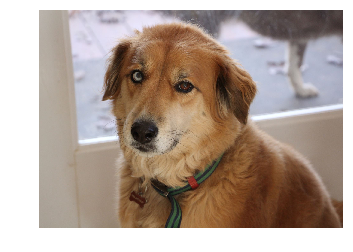

In [21]:
make_prediction('images/tea1.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Alaskan malamute.


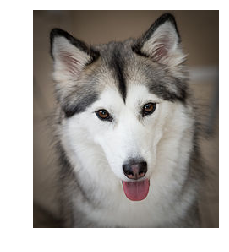

In [22]:
make_prediction('images/sib.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chow chow.


Top 5 predictions (for mixed breeds)
Predicted breed: Chow chow with a confidence of 0.9990
Predicted breed: Tibetan mastiff with a confidence of 0.0008
Predicted breed: Akita with a confidence of 0.0001
Predicted breed: Chinese shar-pei with a confidence of 0.0000
Predicted breed: Finnish spitz with a confidence of 0.0000


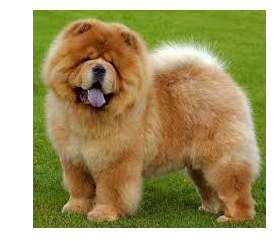

In [23]:
make_prediction('images/chow.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Norfolk terrier.


Top 5 predictions (for mixed breeds)
Predicted breed: Norfolk terrier with a confidence of 0.3111
Predicted breed: German wirehaired pointer with a confidence of 0.2422
Predicted breed: Glen of imaal terrier with a confidence of 0.0971
Predicted breed: Irish terrier with a confidence of 0.0820
Predicted breed: Miniature schnauzer with a confidence of 0.0703


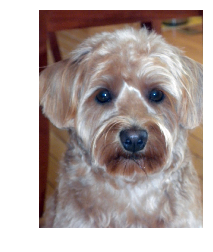

In [24]:
make_prediction('images/m.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Lowchen.


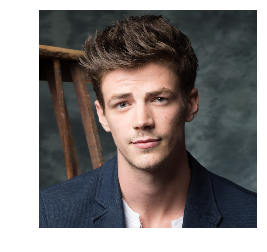

In [25]:
make_prediction('images/grant.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Chinese crested.


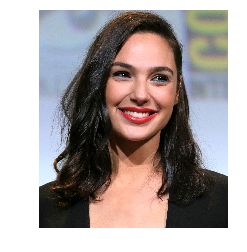

In [26]:
make_prediction('images/gal.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


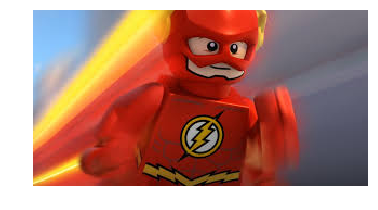

In [27]:
make_prediction('images/flash.jpg')

-------------------------------------------------------------------------------------------------

Now we will perform the same transfer learning but instead of using ResNet50 model we will be using other models 

i.e
- VGG16 model
- VGG19 model
- Xception model
- Inception model 

So we wil be repeating Steps 4, 5 and 6 for the above mentioned models


## Step 4.2: Using VGG16



- VGG-16 can be used for classification, transfer learning, and feature extraction. VGG-16 is trained using the ImageNet data set. 

- VGG-16 has 16 layers with learnable weights: 13 convolutional layers and 3 fully connected layers. 

<img style="border-width:0" src="https://qph.fs.quoracdn.net/main-qimg-ba81c87204be1a5d11d64a464bca39eb" />


### Extracting bottleneck features

i.e VGG16 Bottleneck features

In [28]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

dog_breeds = len(dog_names)

### Defining the Model Architecture

In [29]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
VGG16_model.add(Dropout(0.4))
VGG16_model.add(Dense(dog_breeds, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               76950     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               20083     
Total params: 97,033
Trainable params: 97,033
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

In [30]:
from keras.optimizers import Adam, Adamax

VGG16_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

### Training the Model

In [31]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 25:24 - loss: 13.8807 - acc: 0.0000e+0 - ETA: 3:08 - loss: 15.7836 - acc: 0.0063    - ETA: 1:39 - loss: 15.5166 - acc: 0.00 - ETA: 1:07 - loss: 15.3716 - acc: 0.00 - ETA: 52s - loss: 15.1127 - acc: 0.0071 - ETA: 41s - loss: 14.8810 - acc: 0.010 - ETA: 35s - loss: 14.4491 - acc: 0.014 - ETA: 30s - loss: 14.0300 - acc: 0.017 - ETA: 26s - loss: 13.4992 - acc: 0.017 - ETA: 23s - loss: 12.8694 - acc: 0.017 - ETA: 20s - loss: 12.2233 - acc: 0.017 - ETA: 18s - loss: 11.7124 - acc: 0.019 - ETA: 17s - loss: 11.3055 - acc: 0.019 - ETA: 15s - loss: 10.8842 - acc: 0.020 - ETA: 14s - loss: 10.5657 - acc: 0.019 - ETA: 13s - loss: 10.2773 - acc: 0.021 - ETA: 12s - loss: 10.0370 - acc: 0.021 - ETA: 11s - loss: 9.8093 - acc: 0.022 - ETA: 10s - loss: 9.5815 - acc: 0.02 - ETA: 9s - loss: 9.3749 - acc: 0.0220 - ETA: 8s - loss: 9.1967 - acc: 0.020 - ETA: 8s - loss: 9.0539 - acc: 0.021 - ETA: 7s - los

6680/6680 [==============================] - ETA: 3s - loss: 2.2869 - acc: 0.450 - ETA: 2s - loss: 2.1798 - acc: 0.578 - ETA: 2s - loss: 2.1528 - acc: 0.557 - ETA: 2s - loss: 2.2692 - acc: 0.537 - ETA: 2s - loss: 2.2350 - acc: 0.537 - ETA: 2s - loss: 2.2696 - acc: 0.529 - ETA: 2s - loss: 2.2310 - acc: 0.537 - ETA: 2s - loss: 2.2489 - acc: 0.537 - ETA: 2s - loss: 2.2562 - acc: 0.536 - ETA: 2s - loss: 2.2668 - acc: 0.539 - ETA: 2s - loss: 2.2492 - acc: 0.544 - ETA: 2s - loss: 2.2412 - acc: 0.542 - ETA: 2s - loss: 2.2285 - acc: 0.545 - ETA: 2s - loss: 2.2259 - acc: 0.548 - ETA: 1s - loss: 2.2168 - acc: 0.551 - ETA: 1s - loss: 2.2212 - acc: 0.548 - ETA: 1s - loss: 2.2250 - acc: 0.548 - ETA: 1s - loss: 2.2263 - acc: 0.548 - ETA: 1s - loss: 2.2259 - acc: 0.547 - ETA: 1s - loss: 2.2246 - acc: 0.548 - ETA: 1s - loss: 2.2190 - acc: 0.549 - ETA: 1s - loss: 2.2251 - acc: 0.547 - ETA: 1s - loss: 2.2314 - acc: 0.547 - ETA: 1s - loss: 2.2320 - acc: 0.546 - ETA: 1s - loss: 2.2280 - acc: 0.548 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 1.3860 - acc: 0.700 - ETA: 2s - loss: 1.3275 - acc: 0.737 - ETA: 2s - loss: 1.4076 - acc: 0.733 - ETA: 2s - loss: 1.3100 - acc: 0.750 - ETA: 2s - loss: 1.3057 - acc: 0.734 - ETA: 2s - loss: 1.2922 - acc: 0.734 - ETA: 2s - loss: 1.2899 - acc: 0.740 - ETA: 2s - loss: 1.3082 - acc: 0.733 - ETA: 2s - loss: 1.2989 - acc: 0.734 - ETA: 2s - loss: 1.3051 - acc: 0.734 - ETA: 2s - loss: 1.3029 - acc: 0.734 - ETA: 2s - loss: 1.3024 - acc: 0.734 - ETA: 2s - loss: 1.2963 - acc: 0.740 - ETA: 2s - loss: 1.2973 - acc: 0.741 - ETA: 2s - loss: 1.3013 - acc: 0.740 - ETA: 2s - loss: 1.3035 - acc: 0.740 - ETA: 1s - loss: 1.3027 - acc: 0.740 - ETA: 1s - loss: 1.3029 - acc: 0.740 - ETA: 1s - loss: 1.3036 - acc: 0.739 - ETA: 1s - loss: 1.3115 - acc: 0.734 - ETA: 1s - loss: 1.3153 - acc: 0.733 - ETA: 1s - loss: 1.3158 - acc: 0.731 - ETA: 1s - loss: 1.3183 - acc: 0.731 - ETA: 1s - loss: 1.3200 - acc: 0.730 - ETA: 1s - loss: 1.3176 - acc: 0.731 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 1.0070 - acc: 0.750 - ETA: 2s - loss: 1.0379 - acc: 0.785 - ETA: 2s - loss: 0.9763 - acc: 0.800 - ETA: 2s - loss: 1.0050 - acc: 0.795 - ETA: 2s - loss: 0.9888 - acc: 0.803 - ETA: 2s - loss: 0.9874 - acc: 0.800 - ETA: 2s - loss: 0.9628 - acc: 0.806 - ETA: 2s - loss: 0.9705 - acc: 0.802 - ETA: 2s - loss: 0.9681 - acc: 0.802 - ETA: 2s - loss: 0.9561 - acc: 0.811 - ETA: 2s - loss: 0.9749 - acc: 0.807 - ETA: 2s - loss: 0.9712 - acc: 0.811 - ETA: 2s - loss: 0.9758 - acc: 0.809 - ETA: 2s - loss: 0.9855 - acc: 0.806 - ETA: 2s - loss: 0.9817 - acc: 0.808 - ETA: 2s - loss: 0.9882 - acc: 0.805 - ETA: 1s - loss: 0.9881 - acc: 0.805 - ETA: 1s - loss: 0.9871 - acc: 0.805 - ETA: 1s - loss: 0.9888 - acc: 0.804 - ETA: 1s - loss: 0.9839 - acc: 0.805 - ETA: 1s - loss: 0.9799 - acc: 0.807 - ETA: 1s - loss: 0.9763 - acc: 0.809 - ETA: 1s - loss: 0.9739 - acc: 0.810 - ETA: 1s - loss: 0.9782 - acc: 0.809 - ETA: 1s - loss: 0.9837 - acc: 0.807 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.5124 - acc: 0.950 - ETA: 2s - loss: 0.8233 - acc: 0.835 - ETA: 2s - loss: 0.7408 - acc: 0.869 - ETA: 2s - loss: 0.7541 - acc: 0.873 - ETA: 2s - loss: 0.7586 - acc: 0.866 - ETA: 2s - loss: 0.7773 - acc: 0.856 - ETA: 2s - loss: 0.7909 - acc: 0.847 - ETA: 2s - loss: 0.7878 - acc: 0.846 - ETA: 2s - loss: 0.7762 - acc: 0.849 - ETA: 2s - loss: 0.7752 - acc: 0.844 - ETA: 2s - loss: 0.7616 - acc: 0.850 - ETA: 2s - loss: 0.7686 - acc: 0.848 - ETA: 2s - loss: 0.7619 - acc: 0.851 - ETA: 2s - loss: 0.7693 - acc: 0.849 - ETA: 2s - loss: 0.7726 - acc: 0.848 - ETA: 2s - loss: 0.7690 - acc: 0.851 - ETA: 2s - loss: 0.7754 - acc: 0.848 - ETA: 2s - loss: 0.7787 - acc: 0.848 - ETA: 1s - loss: 0.7690 - acc: 0.852 - ETA: 1s - loss: 0.7690 - acc: 0.850 - ETA: 1s - loss: 0.7679 - acc: 0.851 - ETA: 1s - loss: 0.7636 - acc: 0.853 - ETA: 1s - loss: 0.7609 - acc: 0.854 - ETA: 1s - loss: 0.7608 - acc: 0.855 - ETA: 1s - loss: 0.7625 - acc: 0.854 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.6215 - acc: 0.850 - ETA: 2s - loss: 0.5916 - acc: 0.914 - ETA: 2s - loss: 0.6042 - acc: 0.903 - ETA: 2s - loss: 0.6063 - acc: 0.907 - ETA: 2s - loss: 0.6082 - acc: 0.908 - ETA: 2s - loss: 0.6325 - acc: 0.900 - ETA: 2s - loss: 0.6305 - acc: 0.902 - ETA: 2s - loss: 0.6309 - acc: 0.901 - ETA: 2s - loss: 0.6392 - acc: 0.898 - ETA: 2s - loss: 0.6402 - acc: 0.895 - ETA: 2s - loss: 0.6234 - acc: 0.900 - ETA: 2s - loss: 0.6251 - acc: 0.901 - ETA: 2s - loss: 0.6262 - acc: 0.899 - ETA: 2s - loss: 0.6275 - acc: 0.899 - ETA: 2s - loss: 0.6274 - acc: 0.896 - ETA: 2s - loss: 0.6249 - acc: 0.896 - ETA: 2s - loss: 0.6168 - acc: 0.898 - ETA: 2s - loss: 0.6211 - acc: 0.896 - ETA: 1s - loss: 0.6238 - acc: 0.894 - ETA: 1s - loss: 0.6281 - acc: 0.893 - ETA: 1s - loss: 0.6266 - acc: 0.893 - ETA: 1s - loss: 0.6221 - acc: 0.895 - ETA: 1s - loss: 0.6304 - acc: 0.890 - ETA: 1s - loss: 0.6317 - acc: 0.888 - ETA: 1s - loss: 0.6292 - acc: 0.889 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4279 - acc: 1.000 - ETA: 2s - loss: 0.5101 - acc: 0.921 - ETA: 2s - loss: 0.5441 - acc: 0.907 - ETA: 2s - loss: 0.5563 - acc: 0.902 - ETA: 2s - loss: 0.5606 - acc: 0.902 - ETA: 2s - loss: 0.5565 - acc: 0.908 - ETA: 2s - loss: 0.5677 - acc: 0.901 - ETA: 2s - loss: 0.5666 - acc: 0.897 - ETA: 2s - loss: 0.5536 - acc: 0.903 - ETA: 2s - loss: 0.5564 - acc: 0.902 - ETA: 2s - loss: 0.5651 - acc: 0.896 - ETA: 2s - loss: 0.5567 - acc: 0.899 - ETA: 2s - loss: 0.5602 - acc: 0.894 - ETA: 2s - loss: 0.5611 - acc: 0.895 - ETA: 2s - loss: 0.5653 - acc: 0.893 - ETA: 2s - loss: 0.5626 - acc: 0.895 - ETA: 2s - loss: 0.5635 - acc: 0.894 - ETA: 2s - loss: 0.5652 - acc: 0.894 - ETA: 1s - loss: 0.5661 - acc: 0.892 - ETA: 1s - loss: 0.5697 - acc: 0.890 - ETA: 1s - loss: 0.5722 - acc: 0.889 - ETA: 1s - loss: 0.5732 - acc: 0.887 - ETA: 1s - loss: 0.5702 - acc: 0.889 - ETA: 1s - loss: 0.5720 - acc: 0.888 - ETA: 1s - loss: 0.5778 - acc: 0.887 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4667 - acc: 0.950 - ETA: 2s - loss: 0.4769 - acc: 0.912 - ETA: 2s - loss: 0.4723 - acc: 0.916 - ETA: 2s - loss: 0.4682 - acc: 0.923 - ETA: 2s - loss: 0.4696 - acc: 0.925 - ETA: 2s - loss: 0.4691 - acc: 0.930 - ETA: 2s - loss: 0.4640 - acc: 0.931 - ETA: 2s - loss: 0.4672 - acc: 0.930 - ETA: 2s - loss: 0.4639 - acc: 0.930 - ETA: 2s - loss: 0.4714 - acc: 0.931 - ETA: 2s - loss: 0.4746 - acc: 0.929 - ETA: 2s - loss: 0.4831 - acc: 0.927 - ETA: 2s - loss: 0.4789 - acc: 0.927 - ETA: 2s - loss: 0.4816 - acc: 0.926 - ETA: 1s - loss: 0.4832 - acc: 0.926 - ETA: 1s - loss: 0.4835 - acc: 0.925 - ETA: 1s - loss: 0.4785 - acc: 0.926 - ETA: 1s - loss: 0.4813 - acc: 0.925 - ETA: 1s - loss: 0.4826 - acc: 0.926 - ETA: 1s - loss: 0.4846 - acc: 0.924 - ETA: 1s - loss: 0.4831 - acc: 0.925 - ETA: 1s - loss: 0.4815 - acc: 0.925 - ETA: 1s - loss: 0.4860 - acc: 0.922 - ETA: 1s - loss: 0.4879 - acc: 0.921 - ETA: 1s - loss: 0.4869 - acc: 0.921 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.5617 - acc: 0.800 - ETA: 2s - loss: 0.4579 - acc: 0.912 - ETA: 2s - loss: 0.4864 - acc: 0.917 - ETA: 2s - loss: 0.4564 - acc: 0.928 - ETA: 2s - loss: 0.4490 - acc: 0.925 - ETA: 2s - loss: 0.4428 - acc: 0.933 - ETA: 2s - loss: 0.4471 - acc: 0.932 - ETA: 2s - loss: 0.4447 - acc: 0.930 - ETA: 2s - loss: 0.4491 - acc: 0.927 - ETA: 2s - loss: 0.4459 - acc: 0.930 - ETA: 2s - loss: 0.4455 - acc: 0.927 - ETA: 2s - loss: 0.4535 - acc: 0.922 - ETA: 2s - loss: 0.4517 - acc: 0.922 - ETA: 2s - loss: 0.4606 - acc: 0.919 - ETA: 2s - loss: 0.4632 - acc: 0.919 - ETA: 2s - loss: 0.4677 - acc: 0.916 - ETA: 1s - loss: 0.4666 - acc: 0.915 - ETA: 1s - loss: 0.4688 - acc: 0.916 - ETA: 1s - loss: 0.4697 - acc: 0.916 - ETA: 1s - loss: 0.4672 - acc: 0.916 - ETA: 1s - loss: 0.4646 - acc: 0.918 - ETA: 1s - loss: 0.4684 - acc: 0.916 - ETA: 1s - loss: 0.4663 - acc: 0.916 - ETA: 1s - loss: 0.4651 - acc: 0.918 - ETA: 1s - loss: 0.4659 - acc: 0.918 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.6237 - acc: 0.800 - ETA: 2s - loss: 0.4223 - acc: 0.911 - ETA: 2s - loss: 0.4309 - acc: 0.922 - ETA: 2s - loss: 0.4088 - acc: 0.932 - ETA: 2s - loss: 0.4076 - acc: 0.932 - ETA: 2s - loss: 0.4082 - acc: 0.929 - ETA: 2s - loss: 0.4061 - acc: 0.933 - ETA: 2s - loss: 0.4108 - acc: 0.932 - ETA: 2s - loss: 0.4127 - acc: 0.932 - ETA: 2s - loss: 0.4165 - acc: 0.929 - ETA: 2s - loss: 0.4175 - acc: 0.928 - ETA: 2s - loss: 0.4141 - acc: 0.930 - ETA: 2s - loss: 0.4199 - acc: 0.928 - ETA: 1s - loss: 0.4194 - acc: 0.928 - ETA: 1s - loss: 0.4224 - acc: 0.928 - ETA: 1s - loss: 0.4217 - acc: 0.929 - ETA: 1s - loss: 0.4201 - acc: 0.929 - ETA: 1s - loss: 0.4201 - acc: 0.928 - ETA: 1s - loss: 0.4212 - acc: 0.927 - ETA: 1s - loss: 0.4221 - acc: 0.927 - ETA: 1s - loss: 0.4224 - acc: 0.927 - ETA: 1s - loss: 0.4249 - acc: 0.926 - ETA: 1s - loss: 0.4255 - acc: 0.926 - ETA: 1s - loss: 0.4289 - acc: 0.925 - ETA: 1s - loss: 0.4292 - acc: 0.926 - ETA: 

In [32]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 2s - loss: 0.3558 - acc: 0.950 - ETA: 2s - loss: 0.3601 - acc: 0.942 - ETA: 2s - loss: 0.3623 - acc: 0.938 - ETA: 2s - loss: 0.3580 - acc: 0.950 - ETA: 2s - loss: 0.3699 - acc: 0.944 - ETA: 2s - loss: 0.3788 - acc: 0.943 - ETA: 2s - loss: 0.3791 - acc: 0.942 - ETA: 2s - loss: 0.3850 - acc: 0.942 - ETA: 2s - loss: 0.3986 - acc: 0.938 - ETA: 2s - loss: 0.3993 - acc: 0.939 - ETA: 2s - loss: 0.3999 - acc: 0.938 - ETA: 2s - loss: 0.4009 - acc: 0.937 - ETA: 2s - loss: 0.4005 - acc: 0.936 - ETA: 2s - loss: 0.4016 - acc: 0.935 - ETA: 2s - loss: 0.4005 - acc: 0.934 - ETA: 1s - loss: 0.4051 - acc: 0.932 - ETA: 1s - loss: 0.4073 - acc: 0.931 - ETA: 1s - loss: 0.4027 - acc: 0.934 - ETA: 1s - loss: 0.4075 - acc: 0.932 - ETA: 1s - loss: 0.4077 - acc: 0.933 - ETA: 1s - loss: 0.4084 - acc: 0.934 - ETA: 1s - loss: 0.4098 - acc: 0.933 - ETA: 1s - loss: 0.4091 - acc: 0.933 - ETA: 1s - loss: 0.4101 

6680/6680 [==============================] - ETA: 3s - loss: 0.2605 - acc: 1.000 - ETA: 3s - loss: 0.3281 - acc: 0.966 - ETA: 3s - loss: 0.3741 - acc: 0.940 - ETA: 3s - loss: 0.4087 - acc: 0.929 - ETA: 3s - loss: 0.3869 - acc: 0.940 - ETA: 3s - loss: 0.3797 - acc: 0.942 - ETA: 2s - loss: 0.3837 - acc: 0.938 - ETA: 2s - loss: 0.3704 - acc: 0.943 - ETA: 2s - loss: 0.3763 - acc: 0.941 - ETA: 2s - loss: 0.3848 - acc: 0.937 - ETA: 2s - loss: 0.3846 - acc: 0.938 - ETA: 2s - loss: 0.3835 - acc: 0.940 - ETA: 2s - loss: 0.3831 - acc: 0.938 - ETA: 2s - loss: 0.3773 - acc: 0.939 - ETA: 2s - loss: 0.3753 - acc: 0.940 - ETA: 2s - loss: 0.3750 - acc: 0.940 - ETA: 2s - loss: 0.3749 - acc: 0.940 - ETA: 2s - loss: 0.3784 - acc: 0.940 - ETA: 2s - loss: 0.3839 - acc: 0.937 - ETA: 2s - loss: 0.3858 - acc: 0.936 - ETA: 1s - loss: 0.3859 - acc: 0.936 - ETA: 1s - loss: 0.3865 - acc: 0.936 - ETA: 1s - loss: 0.3875 - acc: 0.935 - ETA: 1s - loss: 0.3868 - acc: 0.935 - ETA: 1s - loss: 0.3874 - acc: 0.934 - ETA: 


Epoch 00010: val_loss did not improve
Epoch 11/60
6680/6680 [==============================] - ETA: 3s - loss: 0.3876 - acc: 0.900 - ETA: 2s - loss: 0.3654 - acc: 0.933 - ETA: 2s - loss: 0.3584 - acc: 0.940 - ETA: 2s - loss: 0.3564 - acc: 0.941 - ETA: 2s - loss: 0.3737 - acc: 0.925 - ETA: 2s - loss: 0.3799 - acc: 0.923 - ETA: 2s - loss: 0.3810 - acc: 0.922 - ETA: 2s - loss: 0.3880 - acc: 0.921 - ETA: 1s - loss: 0.3837 - acc: 0.924 - ETA: 1s - loss: 0.3763 - acc: 0.928 - ETA: 1s - loss: 0.3770 - acc: 0.929 - ETA: 1s - loss: 0.3736 - acc: 0.931 - ETA: 1s - loss: 0.3733 - acc: 0.931 - ETA: 1s - loss: 0.3696 - acc: 0.932 - ETA: 1s - loss: 0.3698 - acc: 0.933 - ETA: 1s - loss: 0.3669 - acc: 0.935 - ETA: 1s - loss: 0.3663 - acc: 0.936 - ETA: 1s - loss: 0.3624 - acc: 0.938 - ETA: 1s - loss: 0.3611 - acc: 0.938 - ETA: 1s - loss: 0.3610 - acc: 0.939 - ETA: 1s - loss: 0.3578 - acc: 0.940 - ETA: 1s - loss: 0.3585 - acc: 0.940 - ETA: 1s - loss: 0.3566 - acc: 0.942 - ETA: 1s - loss: 0.3580 - acc: 

6680/6680 [==============================] - ETA: 3s - loss: 0.5039 - acc: 0.900 - ETA: 2s - loss: 0.3790 - acc: 0.911 - ETA: 2s - loss: 0.3648 - acc: 0.925 - ETA: 2s - loss: 0.3636 - acc: 0.930 - ETA: 2s - loss: 0.3718 - acc: 0.935 - ETA: 2s - loss: 0.3653 - acc: 0.933 - ETA: 2s - loss: 0.3628 - acc: 0.935 - ETA: 2s - loss: 0.3571 - acc: 0.938 - ETA: 1s - loss: 0.3594 - acc: 0.939 - ETA: 1s - loss: 0.3610 - acc: 0.940 - ETA: 1s - loss: 0.3605 - acc: 0.941 - ETA: 1s - loss: 0.3595 - acc: 0.941 - ETA: 1s - loss: 0.3554 - acc: 0.944 - ETA: 1s - loss: 0.3539 - acc: 0.945 - ETA: 1s - loss: 0.3635 - acc: 0.942 - ETA: 1s - loss: 0.3641 - acc: 0.941 - ETA: 1s - loss: 0.3620 - acc: 0.942 - ETA: 1s - loss: 0.3618 - acc: 0.942 - ETA: 1s - loss: 0.3617 - acc: 0.942 - ETA: 1s - loss: 0.3632 - acc: 0.942 - ETA: 1s - loss: 0.3625 - acc: 0.942 - ETA: 1s - loss: 0.3623 - acc: 0.942 - ETA: 1s - loss: 0.3604 - acc: 0.943 - ETA: 1s - loss: 0.3601 - acc: 0.942 - ETA: 1s - loss: 0.3618 - acc: 0.941 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 0.2690 - acc: 0.950 - ETA: 2s - loss: 0.2657 - acc: 0.975 - ETA: 2s - loss: 0.2928 - acc: 0.970 - ETA: 2s - loss: 0.3391 - acc: 0.950 - ETA: 2s - loss: 0.3471 - acc: 0.946 - ETA: 2s - loss: 0.3400 - acc: 0.945 - ETA: 2s - loss: 0.3412 - acc: 0.945 - ETA: 2s - loss: 0.3468 - acc: 0.944 - ETA: 2s - loss: 0.3445 - acc: 0.943 - ETA: 2s - loss: 0.3446 - acc: 0.944 - ETA: 1s - loss: 0.3498 - acc: 0.940 - ETA: 1s - loss: 0.3557 - acc: 0.937 - ETA: 1s - loss: 0.3527 - acc: 0.938 - ETA: 1s - loss: 0.3513 - acc: 0.940 - ETA: 1s - loss: 0.3536 - acc: 0.938 - ETA: 1s - loss: 0.3547 - acc: 0.937 - ETA: 1s - loss: 0.3507 - acc: 0.940 - ETA: 1s - loss: 0.3493 - acc: 0.941 - ETA: 1s - loss: 0.3501 - acc: 0.942 - ETA: 1s - loss: 0.3521 - acc: 0.941 - ETA: 1s - loss: 0.3498 - acc: 0.941 - ETA: 1s - loss: 0.3490 - acc: 0.941 - ETA: 1s - loss: 0.3466 - acc: 0.942 - ETA: 1s - loss: 0.3466 - acc: 0.941 - ETA: 1s - loss: 0.3481 - acc: 0.941 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2994 - acc: 1.000 - ETA: 2s - loss: 0.3375 - acc: 0.962 - ETA: 2s - loss: 0.3282 - acc: 0.966 - ETA: 2s - loss: 0.3045 - acc: 0.970 - ETA: 2s - loss: 0.2977 - acc: 0.969 - ETA: 2s - loss: 0.3048 - acc: 0.956 - ETA: 2s - loss: 0.3105 - acc: 0.954 - ETA: 2s - loss: 0.3150 - acc: 0.951 - ETA: 2s - loss: 0.3118 - acc: 0.953 - ETA: 1s - loss: 0.3193 - acc: 0.950 - ETA: 1s - loss: 0.3165 - acc: 0.950 - ETA: 1s - loss: 0.3137 - acc: 0.950 - ETA: 1s - loss: 0.3138 - acc: 0.950 - ETA: 1s - loss: 0.3122 - acc: 0.951 - ETA: 1s - loss: 0.3146 - acc: 0.950 - ETA: 1s - loss: 0.3155 - acc: 0.950 - ETA: 1s - loss: 0.3155 - acc: 0.949 - ETA: 1s - loss: 0.3177 - acc: 0.949 - ETA: 1s - loss: 0.3210 - acc: 0.948 - ETA: 1s - loss: 0.3197 - acc: 0.949 - ETA: 1s - loss: 0.3192 - acc: 0.950 - ETA: 1s - loss: 0.3203 - acc: 0.950 - ETA: 1s - loss: 0.3204 - acc: 0.950 - ETA: 1s - loss: 0.3189 - acc: 0.950 - ETA: 1s - loss: 0.3234 - acc: 0.949 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2545 - acc: 1.000 - ETA: 2s - loss: 0.2933 - acc: 0.962 - ETA: 2s - loss: 0.3104 - acc: 0.953 - ETA: 2s - loss: 0.3403 - acc: 0.936 - ETA: 2s - loss: 0.3371 - acc: 0.937 - ETA: 2s - loss: 0.3275 - acc: 0.940 - ETA: 2s - loss: 0.3225 - acc: 0.944 - ETA: 2s - loss: 0.3214 - acc: 0.948 - ETA: 2s - loss: 0.3172 - acc: 0.951 - ETA: 1s - loss: 0.3175 - acc: 0.950 - ETA: 1s - loss: 0.3191 - acc: 0.950 - ETA: 1s - loss: 0.3190 - acc: 0.950 - ETA: 1s - loss: 0.3224 - acc: 0.947 - ETA: 1s - loss: 0.3198 - acc: 0.948 - ETA: 1s - loss: 0.3196 - acc: 0.948 - ETA: 1s - loss: 0.3209 - acc: 0.946 - ETA: 1s - loss: 0.3211 - acc: 0.947 - ETA: 1s - loss: 0.3242 - acc: 0.946 - ETA: 1s - loss: 0.3252 - acc: 0.946 - ETA: 1s - loss: 0.3234 - acc: 0.947 - ETA: 1s - loss: 0.3197 - acc: 0.948 - ETA: 1s - loss: 0.3226 - acc: 0.947 - ETA: 1s - loss: 0.3252 - acc: 0.945 - ETA: 1s - loss: 0.3259 - acc: 0.945 - ETA: 1s - loss: 0.3239 - acc: 0.946 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.1932 - acc: 1.000 - ETA: 2s - loss: 0.2073 - acc: 1.000 - ETA: 2s - loss: 0.2732 - acc: 0.978 - ETA: 2s - loss: 0.2944 - acc: 0.970 - ETA: 2s - loss: 0.2978 - acc: 0.969 - ETA: 2s - loss: 0.2987 - acc: 0.964 - ETA: 2s - loss: 0.2985 - acc: 0.963 - ETA: 2s - loss: 0.2963 - acc: 0.961 - ETA: 2s - loss: 0.2902 - acc: 0.961 - ETA: 2s - loss: 0.2940 - acc: 0.958 - ETA: 2s - loss: 0.2956 - acc: 0.955 - ETA: 2s - loss: 0.2988 - acc: 0.955 - ETA: 2s - loss: 0.2968 - acc: 0.955 - ETA: 2s - loss: 0.2924 - acc: 0.957 - ETA: 2s - loss: 0.2895 - acc: 0.958 - ETA: 2s - loss: 0.2935 - acc: 0.957 - ETA: 2s - loss: 0.2929 - acc: 0.955 - ETA: 2s - loss: 0.2959 - acc: 0.955 - ETA: 1s - loss: 0.2939 - acc: 0.956 - ETA: 1s - loss: 0.2940 - acc: 0.956 - ETA: 1s - loss: 0.2950 - acc: 0.957 - ETA: 1s - loss: 0.2999 - acc: 0.955 - ETA: 1s - loss: 0.3034 - acc: 0.954 - ETA: 1s - loss: 0.3035 - acc: 0.954 - ETA: 1s - loss: 0.3047 - acc: 0.954 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2275 - acc: 1.000 - ETA: 2s - loss: 0.2898 - acc: 0.950 - ETA: 2s - loss: 0.3191 - acc: 0.934 - ETA: 2s - loss: 0.3106 - acc: 0.944 - ETA: 2s - loss: 0.3163 - acc: 0.944 - ETA: 2s - loss: 0.3080 - acc: 0.948 - ETA: 2s - loss: 0.3128 - acc: 0.948 - ETA: 2s - loss: 0.3038 - acc: 0.952 - ETA: 2s - loss: 0.3056 - acc: 0.951 - ETA: 2s - loss: 0.3040 - acc: 0.950 - ETA: 2s - loss: 0.2995 - acc: 0.953 - ETA: 2s - loss: 0.3011 - acc: 0.951 - ETA: 2s - loss: 0.3001 - acc: 0.951 - ETA: 2s - loss: 0.3015 - acc: 0.951 - ETA: 2s - loss: 0.3099 - acc: 0.948 - ETA: 1s - loss: 0.3104 - acc: 0.950 - ETA: 1s - loss: 0.3112 - acc: 0.950 - ETA: 1s - loss: 0.3117 - acc: 0.950 - ETA: 1s - loss: 0.3097 - acc: 0.950 - ETA: 1s - loss: 0.3064 - acc: 0.951 - ETA: 1s - loss: 0.3110 - acc: 0.950 - ETA: 1s - loss: 0.3086 - acc: 0.950 - ETA: 1s - loss: 0.3089 - acc: 0.950 - ETA: 1s - loss: 0.3087 - acc: 0.950 - ETA: 1s - loss: 0.3065 - acc: 0.951 - ETA: 

### Test the accuracy of model

In [33]:
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.5024%


### Predicting Dog Breed with VGG16

In [34]:
def extract_VGG16(tensor):
    from keras.applications.vgg16 import VGG16, preprocess_input
    return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [35]:
# top_N defines how many predictions to return
top_N = 5

def predict_breed_VGG16(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_VGG16
    print('Extracting bottleneck features...')
    bottleneck_features_forVGG16 = extract_VGG16(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction_VGG16 = VGG16_model.predict(bottleneck_features_forVGG16)[0]
    
    # sort predicted breeds by highest probability, extract the top N predictions
    breeds_predicted_VGG16 = [dog_names[idx] for idx in np.argsort(prediction_VGG16)[::-1][:top_N]]
    confidence_predicted_VGG16 = np.sort(prediction_VGG16)[::-1][:top_N]
    
    print('Predicting breed...')
    # take prediction, lookup in dog_names, return value
    return breeds_predicted_VGG16, confidence_predicted_VGG16

# Step 5: Write the Algorithm to identify Dog Breeds

In [36]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction_VGG16(path, multiple_breeds = False):
    breeds, confidence = predict_breed_VGG16(path)
    img = mpimg.imread(path)
    plt.axis('off')
  
    if dog_detector(path):
        imgplot = plt.imshow(img)
        print('Its a Dog. Breed: {}.'.format(breeds[0].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 5 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[0].replace("_", " ")))
    else:
        print("No human face or dog detected")
        imgplot = plt.imshow(img)

# Step 6: Test the Algorithm

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: German pinscher.


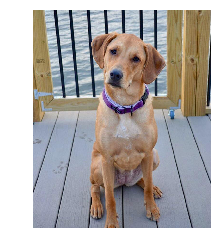

In [37]:
make_prediction_VGG16('images/chelsea.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Dalmatian.


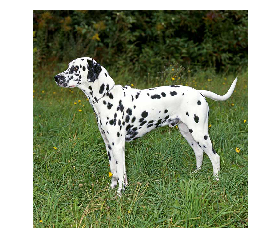

In [38]:
make_prediction_VGG16('images/dal.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Pomeranian.


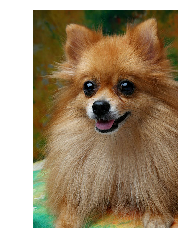

In [39]:
make_prediction_VGG16('images/pomerian.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Pomeranian.


Top 5 predictions (for mixed breeds)
Predicted breed: Pomeranian with a confidence of 0.9469
Predicted breed: Chihuahua with a confidence of 0.0434
Predicted breed: Tibetan mastiff with a confidence of 0.0063
Predicted breed: Keeshond with a confidence of 0.0018
Predicted breed: Collie with a confidence of 0.0007


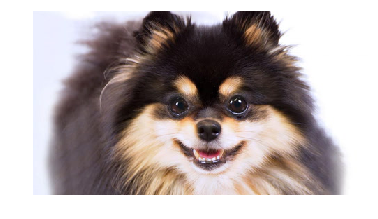

In [40]:
make_prediction_VGG16('images/pom.jpg',multiple_breeds = True )

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Icelandic sheepdog.


Top 5 predictions (for mixed breeds)
Predicted breed: Icelandic sheepdog with a confidence of 0.9484
Predicted breed: Norwegian buhund with a confidence of 0.0158
Predicted breed: Cardigan welsh corgi with a confidence of 0.0121
Predicted breed: American eskimo dog with a confidence of 0.0098
Predicted breed: Norwich terrier with a confidence of 0.0049


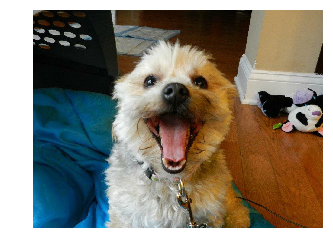

In [41]:
make_prediction_VGG16('images/melissa2.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Doberman pinscher.


Top 5 predictions (for mixed breeds)
Predicted breed: Doberman pinscher with a confidence of 0.8857
Predicted breed: German pinscher with a confidence of 0.0833
Predicted breed: Manchester terrier with a confidence of 0.0310
Predicted breed: Beauceron with a confidence of 0.0000
Predicted breed: Great dane with a confidence of 0.0000


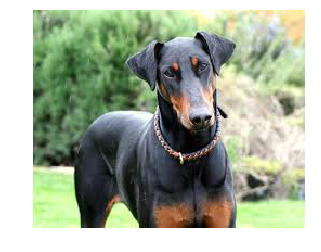

In [42]:
make_prediction_VGG16('images/dober.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Boston terrier.


Top 5 predictions (for mixed breeds)
Predicted breed: Boston terrier with a confidence of 0.4299
Predicted breed: Chihuahua with a confidence of 0.4181
Predicted breed: Italian greyhound with a confidence of 0.0770
Predicted breed: Chinese crested with a confidence of 0.0182
Predicted breed: Cardigan welsh corgi with a confidence of 0.0165


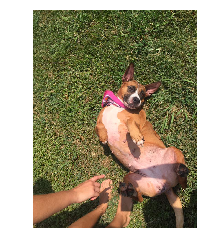

In [43]:
make_prediction_VGG16('images/Jason.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Xoloitzcuintli.


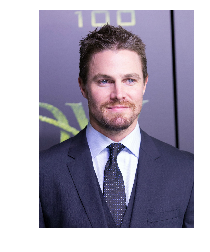

In [44]:
make_prediction_VGG16('images/stephen.png')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Chinese crested.


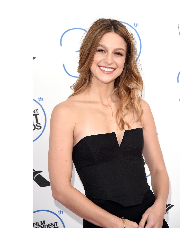

In [45]:
make_prediction_VGG16('images/melissa.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


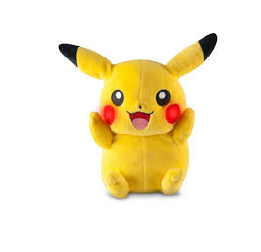

In [46]:
make_prediction_VGG16('images/pikachu.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


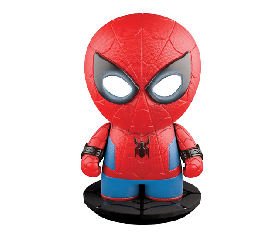

In [47]:
make_prediction_VGG16('images/spidey.jpg')

------------------------------------------------------------------

## Step 4.3: Using VGG19

- VGG-19 can be used for classification, transfer learning, and feature extraction. VGG-19 is trained using the ImageNet data set. 

- VGG-19 has 19 layers with learnable weights: 16 convolutional layers
<img alt="VGG19" style="border-width:0" src="https://lihan.me/assets/images/vgg-hero-cover.jpg" />


### Extracting bottleneck features

i.e VGG19 Bottleneck features

In [48]:
bottleneck_features_VGG19 = np.load('bottleneck_features/DogVGG19Data.npz')
train_VGG19 = bottleneck_features_VGG19['train']
valid_VGG19 = bottleneck_features_VGG19['valid']
test_VGG19 = bottleneck_features_VGG19['test']

dog_breeds = len(dog_names)

### Defining the Model Architecture

In [49]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
VGG19_model.add(Dropout(0.4))
VGG19_model.add(Dense(dog_breeds, activation='softmax'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               76950     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               20083     
Total params: 97,033
Trainable params: 97,033
Non-trainable params: 0
_________________________________________________________________



### Compiling the Model

In [50]:
from keras.optimizers import Adam, Adamax

VGG19_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

### Training the Model

In [51]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 25:32 - loss: 16.2590 - acc: 0.0000e+0 - ETA: 3:37 - loss: 15.5919 - acc: 0.0000e+0 - ETA: 1:56 - loss: 15.2867 - acc: 0.0038   - ETA: 1:18 - loss: 14.4798 - acc: 0.00 - ETA: 59s - loss: 13.5453 - acc: 0.0020 - ETA: 49s - loss: 12.8304 - acc: 0.003 - ETA: 40s - loss: 11.9341 - acc: 0.006 - ETA: 34s - loss: 11.2160 - acc: 0.008 - ETA: 29s - loss: 10.6362 - acc: 0.013 - ETA: 26s - loss: 10.1420 - acc: 0.014 - ETA: 23s - loss: 9.7417 - acc: 0.016 - ETA: 21s - loss: 9.3942 - acc: 0.01 - ETA: 19s - loss: 9.1151 - acc: 0.01 - ETA: 17s - loss: 8.8694 - acc: 0.01 - ETA: 15s - loss: 8.6287 - acc: 0.02 - ETA: 14s - loss: 8.4483 - acc: 0.02 - ETA: 13s - loss: 8.2900 - acc: 0.02 - ETA: 12s - loss: 8.1511 - acc: 0.02 - ETA: 11s - loss: 8.0140 - acc: 0.03 - ETA: 10s - loss: 7.8922 - acc: 0.03 - ETA: 9s - loss: 7.7865 - acc: 0.0343 - ETA: 9s - loss: 7.6948 - acc: 0.035 - ETA: 8s - loss: 7.6060 

6680/6680 [==============================] - ETA: 3s - loss: 2.1522 - acc: 0.550 - ETA: 2s - loss: 1.8802 - acc: 0.621 - ETA: 2s - loss: 1.9408 - acc: 0.619 - ETA: 2s - loss: 2.0209 - acc: 0.618 - ETA: 2s - loss: 2.1013 - acc: 0.606 - ETA: 2s - loss: 2.0625 - acc: 0.612 - ETA: 2s - loss: 2.0466 - acc: 0.616 - ETA: 2s - loss: 2.0187 - acc: 0.618 - ETA: 2s - loss: 2.0428 - acc: 0.613 - ETA: 2s - loss: 2.0366 - acc: 0.614 - ETA: 2s - loss: 2.0713 - acc: 0.605 - ETA: 2s - loss: 2.0817 - acc: 0.599 - ETA: 2s - loss: 2.1012 - acc: 0.594 - ETA: 2s - loss: 2.0867 - acc: 0.598 - ETA: 2s - loss: 2.0796 - acc: 0.598 - ETA: 2s - loss: 2.0767 - acc: 0.596 - ETA: 1s - loss: 2.0869 - acc: 0.597 - ETA: 1s - loss: 2.0791 - acc: 0.599 - ETA: 1s - loss: 2.0695 - acc: 0.599 - ETA: 1s - loss: 2.0778 - acc: 0.596 - ETA: 1s - loss: 2.0844 - acc: 0.595 - ETA: 1s - loss: 2.0845 - acc: 0.594 - ETA: 1s - loss: 2.0952 - acc: 0.589 - ETA: 1s - loss: 2.1083 - acc: 0.587 - ETA: 1s - loss: 2.1102 - acc: 0.586 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 1.1406 - acc: 0.750 - ETA: 2s - loss: 1.2811 - acc: 0.731 - ETA: 2s - loss: 1.2407 - acc: 0.739 - ETA: 2s - loss: 1.2842 - acc: 0.727 - ETA: 2s - loss: 1.2907 - acc: 0.729 - ETA: 2s - loss: 1.2893 - acc: 0.732 - ETA: 2s - loss: 1.2829 - acc: 0.739 - ETA: 2s - loss: 1.2550 - acc: 0.749 - ETA: 2s - loss: 1.2346 - acc: 0.753 - ETA: 2s - loss: 1.2226 - acc: 0.760 - ETA: 2s - loss: 1.2131 - acc: 0.760 - ETA: 2s - loss: 1.2094 - acc: 0.762 - ETA: 1s - loss: 1.2076 - acc: 0.763 - ETA: 1s - loss: 1.2130 - acc: 0.760 - ETA: 1s - loss: 1.2101 - acc: 0.762 - ETA: 1s - loss: 1.2129 - acc: 0.763 - ETA: 1s - loss: 1.2202 - acc: 0.761 - ETA: 1s - loss: 1.2218 - acc: 0.760 - ETA: 1s - loss: 1.2192 - acc: 0.760 - ETA: 1s - loss: 1.2191 - acc: 0.759 - ETA: 1s - loss: 1.2194 - acc: 0.760 - ETA: 1s - loss: 1.2200 - acc: 0.758 - ETA: 1s - loss: 1.2215 - acc: 0.756 - ETA: 1s - loss: 1.2265 - acc: 0.755 - ETA: 1s - loss: 1.2262 - acc: 0.756 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.6893 - acc: 0.850 - ETA: 2s - loss: 0.9464 - acc: 0.814 - ETA: 2s - loss: 0.8596 - acc: 0.842 - ETA: 2s - loss: 0.9119 - acc: 0.827 - ETA: 2s - loss: 0.9082 - acc: 0.818 - ETA: 2s - loss: 0.9286 - acc: 0.813 - ETA: 3s - loss: 0.9062 - acc: 0.819 - ETA: 3s - loss: 0.9171 - acc: 0.819 - ETA: 3s - loss: 0.9040 - acc: 0.825 - ETA: 3s - loss: 0.8940 - acc: 0.827 - ETA: 3s - loss: 0.9032 - acc: 0.826 - ETA: 3s - loss: 0.8989 - acc: 0.825 - ETA: 3s - loss: 0.8965 - acc: 0.824 - ETA: 3s - loss: 0.8890 - acc: 0.823 - ETA: 3s - loss: 0.8947 - acc: 0.820 - ETA: 2s - loss: 0.8985 - acc: 0.819 - ETA: 2s - loss: 0.9000 - acc: 0.819 - ETA: 2s - loss: 0.9007 - acc: 0.822 - ETA: 2s - loss: 0.9102 - acc: 0.818 - ETA: 2s - loss: 0.9053 - acc: 0.821 - ETA: 2s - loss: 0.8971 - acc: 0.824 - ETA: 2s - loss: 0.8942 - acc: 0.823 - ETA: 2s - loss: 0.8833 - acc: 0.827 - ETA: 2s - loss: 0.8728 - acc: 0.829 - ETA: 2s - loss: 0.8837 - acc: 0.826 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.6815 - acc: 0.850 - ETA: 2s - loss: 0.7308 - acc: 0.875 - ETA: 2s - loss: 0.6778 - acc: 0.886 - ETA: 2s - loss: 0.6690 - acc: 0.886 - ETA: 2s - loss: 0.6934 - acc: 0.872 - ETA: 2s - loss: 0.6879 - acc: 0.877 - ETA: 2s - loss: 0.6901 - acc: 0.875 - ETA: 2s - loss: 0.6874 - acc: 0.878 - ETA: 2s - loss: 0.6882 - acc: 0.878 - ETA: 2s - loss: 0.6902 - acc: 0.878 - ETA: 1s - loss: 0.6800 - acc: 0.881 - ETA: 1s - loss: 0.6719 - acc: 0.880 - ETA: 1s - loss: 0.6687 - acc: 0.880 - ETA: 1s - loss: 0.6669 - acc: 0.876 - ETA: 1s - loss: 0.6710 - acc: 0.875 - ETA: 1s - loss: 0.6744 - acc: 0.874 - ETA: 1s - loss: 0.6780 - acc: 0.873 - ETA: 1s - loss: 0.6779 - acc: 0.871 - ETA: 1s - loss: 0.6735 - acc: 0.874 - ETA: 1s - loss: 0.6782 - acc: 0.872 - ETA: 1s - loss: 0.6801 - acc: 0.871 - ETA: 1s - loss: 0.6786 - acc: 0.872 - ETA: 1s - loss: 0.6791 - acc: 0.872 - ETA: 1s - loss: 0.6803 - acc: 0.872 - ETA: 1s - loss: 0.6803 - acc: 0.873 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.3690 - acc: 1.000 - ETA: 2s - loss: 0.5235 - acc: 0.921 - ETA: 2s - loss: 0.5424 - acc: 0.911 - ETA: 2s - loss: 0.5310 - acc: 0.915 - ETA: 2s - loss: 0.5466 - acc: 0.908 - ETA: 2s - loss: 0.5712 - acc: 0.906 - ETA: 2s - loss: 0.5590 - acc: 0.906 - ETA: 2s - loss: 0.5548 - acc: 0.905 - ETA: 2s - loss: 0.5507 - acc: 0.910 - ETA: 2s - loss: 0.5512 - acc: 0.910 - ETA: 2s - loss: 0.5508 - acc: 0.908 - ETA: 2s - loss: 0.5506 - acc: 0.909 - ETA: 2s - loss: 0.5638 - acc: 0.904 - ETA: 2s - loss: 0.5618 - acc: 0.906 - ETA: 2s - loss: 0.5582 - acc: 0.907 - ETA: 2s - loss: 0.5612 - acc: 0.906 - ETA: 2s - loss: 0.5561 - acc: 0.908 - ETA: 2s - loss: 0.5620 - acc: 0.905 - ETA: 1s - loss: 0.5661 - acc: 0.904 - ETA: 1s - loss: 0.5695 - acc: 0.904 - ETA: 1s - loss: 0.5753 - acc: 0.902 - ETA: 1s - loss: 0.5750 - acc: 0.902 - ETA: 1s - loss: 0.5782 - acc: 0.900 - ETA: 1s - loss: 0.5797 - acc: 0.899 - ETA: 1s - loss: 0.5798 - acc: 0.900 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4676 - acc: 0.900 - ETA: 2s - loss: 0.5435 - acc: 0.885 - ETA: 2s - loss: 0.5445 - acc: 0.907 - ETA: 2s - loss: 0.5670 - acc: 0.894 - ETA: 2s - loss: 0.5803 - acc: 0.888 - ETA: 2s - loss: 0.5797 - acc: 0.888 - ETA: 2s - loss: 0.5695 - acc: 0.892 - ETA: 2s - loss: 0.5765 - acc: 0.889 - ETA: 2s - loss: 0.5695 - acc: 0.890 - ETA: 2s - loss: 0.5646 - acc: 0.891 - ETA: 2s - loss: 0.5621 - acc: 0.893 - ETA: 2s - loss: 0.5581 - acc: 0.895 - ETA: 2s - loss: 0.5584 - acc: 0.895 - ETA: 2s - loss: 0.5611 - acc: 0.893 - ETA: 2s - loss: 0.5604 - acc: 0.893 - ETA: 2s - loss: 0.5572 - acc: 0.894 - ETA: 2s - loss: 0.5565 - acc: 0.893 - ETA: 1s - loss: 0.5506 - acc: 0.895 - ETA: 1s - loss: 0.5460 - acc: 0.896 - ETA: 1s - loss: 0.5453 - acc: 0.897 - ETA: 1s - loss: 0.5498 - acc: 0.896 - ETA: 1s - loss: 0.5503 - acc: 0.895 - ETA: 1s - loss: 0.5499 - acc: 0.895 - ETA: 1s - loss: 0.5487 - acc: 0.896 - ETA: 1s - loss: 0.5490 - acc: 0.897 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4166 - acc: 0.950 - ETA: 2s - loss: 0.4913 - acc: 0.914 - ETA: 2s - loss: 0.4617 - acc: 0.930 - ETA: 2s - loss: 0.4639 - acc: 0.921 - ETA: 2s - loss: 0.4863 - acc: 0.910 - ETA: 2s - loss: 0.4675 - acc: 0.919 - ETA: 2s - loss: 0.4668 - acc: 0.920 - ETA: 2s - loss: 0.4756 - acc: 0.914 - ETA: 2s - loss: 0.4740 - acc: 0.913 - ETA: 2s - loss: 0.4812 - acc: 0.910 - ETA: 2s - loss: 0.4824 - acc: 0.909 - ETA: 2s - loss: 0.4799 - acc: 0.909 - ETA: 2s - loss: 0.4729 - acc: 0.911 - ETA: 2s - loss: 0.4739 - acc: 0.910 - ETA: 2s - loss: 0.4774 - acc: 0.910 - ETA: 2s - loss: 0.4749 - acc: 0.911 - ETA: 2s - loss: 0.4740 - acc: 0.912 - ETA: 2s - loss: 0.4749 - acc: 0.913 - ETA: 1s - loss: 0.4747 - acc: 0.913 - ETA: 1s - loss: 0.4746 - acc: 0.911 - ETA: 1s - loss: 0.4787 - acc: 0.910 - ETA: 1s - loss: 0.4797 - acc: 0.910 - ETA: 1s - loss: 0.4805 - acc: 0.910 - ETA: 1s - loss: 0.4823 - acc: 0.909 - ETA: 1s - loss: 0.4820 - acc: 0.909 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4456 - acc: 0.950 - ETA: 2s - loss: 0.3928 - acc: 0.935 - ETA: 2s - loss: 0.4014 - acc: 0.934 - ETA: 2s - loss: 0.4036 - acc: 0.939 - ETA: 2s - loss: 0.3984 - acc: 0.944 - ETA: 2s - loss: 0.4162 - acc: 0.935 - ETA: 2s - loss: 0.4265 - acc: 0.931 - ETA: 2s - loss: 0.4263 - acc: 0.931 - ETA: 2s - loss: 0.4218 - acc: 0.934 - ETA: 2s - loss: 0.4242 - acc: 0.933 - ETA: 2s - loss: 0.4278 - acc: 0.929 - ETA: 2s - loss: 0.4333 - acc: 0.928 - ETA: 2s - loss: 0.4327 - acc: 0.928 - ETA: 2s - loss: 0.4369 - acc: 0.928 - ETA: 2s - loss: 0.4419 - acc: 0.928 - ETA: 2s - loss: 0.4485 - acc: 0.926 - ETA: 2s - loss: 0.4508 - acc: 0.924 - ETA: 1s - loss: 0.4490 - acc: 0.926 - ETA: 1s - loss: 0.4541 - acc: 0.924 - ETA: 1s - loss: 0.4504 - acc: 0.925 - ETA: 1s - loss: 0.4495 - acc: 0.925 - ETA: 1s - loss: 0.4505 - acc: 0.926 - ETA: 1s - loss: 0.4525 - acc: 0.925 - ETA: 1s - loss: 0.4515 - acc: 0.925 - ETA: 1s - loss: 0.4546 - acc: 0.924 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4541 - acc: 0.900 - ETA: 2s - loss: 0.4244 - acc: 0.928 - ETA: 2s - loss: 0.4243 - acc: 0.926 - ETA: 2s - loss: 0.4404 - acc: 0.921 - ETA: 2s - loss: 0.4224 - acc: 0.928 - ETA: 2s - loss: 0.4443 - acc: 0.924 - ETA: 2s - loss: 0.4423 - acc: 0.922 - ETA: 2s - loss: 0.4359 - acc: 0.925 - ETA: 2s - loss: 0.4263 - acc: 0.930 - ETA: 2s - loss: 0.4237 - acc: 0.927 - ETA: 2s - loss: 0.4255 - acc: 0.929 - ETA: 2s - loss: 0.4194 - acc: 0.933 - ETA: 2s - loss: 0.4187 - acc: 0.933 - ETA: 2s - loss: 0.4156 - acc: 0.933 - ETA: 2s - loss: 0.4225 - acc: 0.932 - ETA: 2s - loss: 0.4211 - acc: 0.931 - ETA: 2s - loss: 0.4210 - acc: 0.930 - ETA: 1s - loss: 0.4165 - acc: 0.933 - ETA: 1s - loss: 0.4153 - acc: 0.934 - ETA: 1s - loss: 0.4187 - acc: 0.933 - ETA: 1s - loss: 0.4275 - acc: 0.929 - ETA: 1s - loss: 0.4283 - acc: 0.928 - ETA: 1s - loss: 0.4274 - acc: 0.927 - ETA: 1s - loss: 0.4265 - acc: 0.928 - ETA: 1s - loss: 0.4237 - acc: 0.929 - ETA: 

In [52]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 3s - loss: 0.4570 - acc: 0.900 - ETA: 2s - loss: 0.4262 - acc: 0.925 - ETA: 2s - loss: 0.4034 - acc: 0.921 - ETA: 2s - loss: 0.4134 - acc: 0.925 - ETA: 2s - loss: 0.4108 - acc: 0.928 - ETA: 2s - loss: 0.3983 - acc: 0.935 - ETA: 2s - loss: 0.4046 - acc: 0.934 - ETA: 2s - loss: 0.3977 - acc: 0.934 - ETA: 2s - loss: 0.3888 - acc: 0.938 - ETA: 2s - loss: 0.4017 - acc: 0.933 - ETA: 2s - loss: 0.3988 - acc: 0.933 - ETA: 2s - loss: 0.4049 - acc: 0.933 - ETA: 2s - loss: 0.3973 - acc: 0.935 - ETA: 2s - loss: 0.4031 - acc: 0.935 - ETA: 2s - loss: 0.4045 - acc: 0.933 - ETA: 2s - loss: 0.4005 - acc: 0.934 - ETA: 2s - loss: 0.4003 - acc: 0.934 - ETA: 2s - loss: 0.4031 - acc: 0.932 - ETA: 1s - loss: 0.4074 - acc: 0.931 - ETA: 1s - loss: 0.4016 - acc: 0.934 - ETA: 1s - loss: 0.3995 - acc: 0.934 - ETA: 1s - loss: 0.3991 - acc: 0.934 - ETA: 1s - loss: 0.3985 - acc: 0.935 - ETA: 1s - loss: 0.3976 

6680/6680 [==============================] - ETA: 3s - loss: 0.2911 - acc: 0.950 - ETA: 2s - loss: 0.3589 - acc: 0.950 - ETA: 2s - loss: 0.3487 - acc: 0.957 - ETA: 2s - loss: 0.3410 - acc: 0.960 - ETA: 2s - loss: 0.3355 - acc: 0.961 - ETA: 2s - loss: 0.3350 - acc: 0.962 - ETA: 2s - loss: 0.3438 - acc: 0.958 - ETA: 2s - loss: 0.3398 - acc: 0.958 - ETA: 2s - loss: 0.3454 - acc: 0.954 - ETA: 2s - loss: 0.3488 - acc: 0.951 - ETA: 2s - loss: 0.3549 - acc: 0.950 - ETA: 2s - loss: 0.3563 - acc: 0.950 - ETA: 2s - loss: 0.3646 - acc: 0.947 - ETA: 2s - loss: 0.3616 - acc: 0.946 - ETA: 2s - loss: 0.3704 - acc: 0.943 - ETA: 2s - loss: 0.3831 - acc: 0.940 - ETA: 2s - loss: 0.3897 - acc: 0.937 - ETA: 1s - loss: 0.3876 - acc: 0.938 - ETA: 1s - loss: 0.3868 - acc: 0.939 - ETA: 1s - loss: 0.3867 - acc: 0.939 - ETA: 1s - loss: 0.3845 - acc: 0.940 - ETA: 1s - loss: 0.3842 - acc: 0.940 - ETA: 1s - loss: 0.3828 - acc: 0.941 - ETA: 1s - loss: 0.3799 - acc: 0.942 - ETA: 1s - loss: 0.3792 - acc: 0.942 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2429 - acc: 1.000 - ETA: 2s - loss: 0.2978 - acc: 0.978 - ETA: 2s - loss: 0.3081 - acc: 0.965 - ETA: 2s - loss: 0.3047 - acc: 0.971 - ETA: 2s - loss: 0.3319 - acc: 0.958 - ETA: 2s - loss: 0.3366 - acc: 0.953 - ETA: 2s - loss: 0.3410 - acc: 0.952 - ETA: 2s - loss: 0.3506 - acc: 0.948 - ETA: 2s - loss: 0.3417 - acc: 0.953 - ETA: 2s - loss: 0.3354 - acc: 0.955 - ETA: 2s - loss: 0.3436 - acc: 0.954 - ETA: 2s - loss: 0.3469 - acc: 0.952 - ETA: 2s - loss: 0.3483 - acc: 0.952 - ETA: 2s - loss: 0.3518 - acc: 0.950 - ETA: 2s - loss: 0.3477 - acc: 0.952 - ETA: 2s - loss: 0.3445 - acc: 0.954 - ETA: 2s - loss: 0.3469 - acc: 0.953 - ETA: 1s - loss: 0.3466 - acc: 0.952 - ETA: 1s - loss: 0.3472 - acc: 0.951 - ETA: 1s - loss: 0.3474 - acc: 0.951 - ETA: 1s - loss: 0.3501 - acc: 0.950 - ETA: 1s - loss: 0.3513 - acc: 0.949 - ETA: 1s - loss: 0.3485 - acc: 0.950 - ETA: 1s - loss: 0.3469 - acc: 0.950 - ETA: 1s - loss: 0.3456 - acc: 0.950 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.4384 - acc: 0.900 - ETA: 2s - loss: 0.3193 - acc: 0.964 - ETA: 2s - loss: 0.3416 - acc: 0.957 - ETA: 2s - loss: 0.3488 - acc: 0.950 - ETA: 2s - loss: 0.3418 - acc: 0.948 - ETA: 2s - loss: 0.3296 - acc: 0.951 - ETA: 2s - loss: 0.3246 - acc: 0.951 - ETA: 2s - loss: 0.3374 - acc: 0.944 - ETA: 2s - loss: 0.3340 - acc: 0.942 - ETA: 2s - loss: 0.3375 - acc: 0.943 - ETA: 2s - loss: 0.3474 - acc: 0.939 - ETA: 2s - loss: 0.3529 - acc: 0.940 - ETA: 2s - loss: 0.3507 - acc: 0.939 - ETA: 2s - loss: 0.3483 - acc: 0.940 - ETA: 2s - loss: 0.3439 - acc: 0.941 - ETA: 2s - loss: 0.3481 - acc: 0.940 - ETA: 2s - loss: 0.3476 - acc: 0.941 - ETA: 1s - loss: 0.3475 - acc: 0.942 - ETA: 1s - loss: 0.3485 - acc: 0.940 - ETA: 1s - loss: 0.3501 - acc: 0.940 - ETA: 1s - loss: 0.3522 - acc: 0.941 - ETA: 1s - loss: 0.3516 - acc: 0.941 - ETA: 1s - loss: 0.3493 - acc: 0.942 - ETA: 1s - loss: 0.3488 - acc: 0.942 - ETA: 1s - loss: 0.3473 - acc: 0.943 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.3346 - acc: 0.950 - ETA: 2s - loss: 0.3602 - acc: 0.957 - ETA: 2s - loss: 0.3742 - acc: 0.938 - ETA: 2s - loss: 0.3818 - acc: 0.934 - ETA: 2s - loss: 0.3739 - acc: 0.940 - ETA: 2s - loss: 0.3656 - acc: 0.938 - ETA: 2s - loss: 0.3573 - acc: 0.941 - ETA: 2s - loss: 0.3474 - acc: 0.946 - ETA: 2s - loss: 0.3507 - acc: 0.946 - ETA: 2s - loss: 0.3475 - acc: 0.945 - ETA: 2s - loss: 0.3443 - acc: 0.947 - ETA: 2s - loss: 0.3437 - acc: 0.947 - ETA: 2s - loss: 0.3456 - acc: 0.944 - ETA: 2s - loss: 0.3386 - acc: 0.946 - ETA: 2s - loss: 0.3396 - acc: 0.945 - ETA: 2s - loss: 0.3463 - acc: 0.943 - ETA: 2s - loss: 0.3455 - acc: 0.943 - ETA: 2s - loss: 0.3452 - acc: 0.944 - ETA: 1s - loss: 0.3468 - acc: 0.943 - ETA: 1s - loss: 0.3436 - acc: 0.943 - ETA: 1s - loss: 0.3445 - acc: 0.943 - ETA: 1s - loss: 0.3446 - acc: 0.943 - ETA: 1s - loss: 0.3457 - acc: 0.942 - ETA: 1s - loss: 0.3439 - acc: 0.942 - ETA: 1s - loss: 0.3437 - acc: 0.941 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2666 - acc: 1.000 - ETA: 2s - loss: 0.3171 - acc: 0.943 - ETA: 2s - loss: 0.3273 - acc: 0.942 - ETA: 2s - loss: 0.3334 - acc: 0.942 - ETA: 2s - loss: 0.3281 - acc: 0.946 - ETA: 2s - loss: 0.3518 - acc: 0.937 - ETA: 2s - loss: 0.3335 - acc: 0.947 - ETA: 2s - loss: 0.3322 - acc: 0.946 - ETA: 2s - loss: 0.3357 - acc: 0.946 - ETA: 2s - loss: 0.3454 - acc: 0.942 - ETA: 2s - loss: 0.3422 - acc: 0.944 - ETA: 2s - loss: 0.3401 - acc: 0.944 - ETA: 2s - loss: 0.3392 - acc: 0.946 - ETA: 2s - loss: 0.3399 - acc: 0.944 - ETA: 2s - loss: 0.3384 - acc: 0.944 - ETA: 2s - loss: 0.3419 - acc: 0.943 - ETA: 2s - loss: 0.3434 - acc: 0.941 - ETA: 1s - loss: 0.3453 - acc: 0.940 - ETA: 1s - loss: 0.3473 - acc: 0.938 - ETA: 1s - loss: 0.3467 - acc: 0.938 - ETA: 1s - loss: 0.3446 - acc: 0.939 - ETA: 1s - loss: 0.3508 - acc: 0.937 - ETA: 1s - loss: 0.3531 - acc: 0.938 - ETA: 1s - loss: 0.3537 - acc: 0.938 - ETA: 1s - loss: 0.3508 - acc: 0.939 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.3774 - acc: 0.900 - ETA: 2s - loss: 0.3135 - acc: 0.957 - ETA: 2s - loss: 0.3014 - acc: 0.965 - ETA: 2s - loss: 0.2952 - acc: 0.963 - ETA: 2s - loss: 0.3196 - acc: 0.950 - ETA: 2s - loss: 0.3147 - acc: 0.951 - ETA: 2s - loss: 0.3063 - acc: 0.955 - ETA: 2s - loss: 0.3093 - acc: 0.954 - ETA: 2s - loss: 0.3100 - acc: 0.951 - ETA: 2s - loss: 0.3081 - acc: 0.950 - ETA: 2s - loss: 0.3087 - acc: 0.950 - ETA: 2s - loss: 0.3047 - acc: 0.952 - ETA: 2s - loss: 0.3062 - acc: 0.952 - ETA: 2s - loss: 0.3038 - acc: 0.953 - ETA: 2s - loss: 0.3092 - acc: 0.950 - ETA: 2s - loss: 0.3124 - acc: 0.948 - ETA: 2s - loss: 0.3131 - acc: 0.950 - ETA: 1s - loss: 0.3150 - acc: 0.950 - ETA: 1s - loss: 0.3182 - acc: 0.950 - ETA: 1s - loss: 0.3163 - acc: 0.950 - ETA: 1s - loss: 0.3181 - acc: 0.949 - ETA: 1s - loss: 0.3132 - acc: 0.951 - ETA: 1s - loss: 0.3129 - acc: 0.951 - ETA: 1s - loss: 0.3154 - acc: 0.950 - ETA: 1s - loss: 0.3148 - acc: 0.950 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2190 - acc: 1.000 - ETA: 2s - loss: 0.3246 - acc: 0.957 - ETA: 2s - loss: 0.3366 - acc: 0.950 - ETA: 2s - loss: 0.3241 - acc: 0.947 - ETA: 2s - loss: 0.3277 - acc: 0.946 - ETA: 2s - loss: 0.3201 - acc: 0.950 - ETA: 2s - loss: 0.3121 - acc: 0.952 - ETA: 2s - loss: 0.3044 - acc: 0.954 - ETA: 2s - loss: 0.2997 - acc: 0.957 - ETA: 2s - loss: 0.3005 - acc: 0.957 - ETA: 2s - loss: 0.2998 - acc: 0.955 - ETA: 2s - loss: 0.2978 - acc: 0.957 - ETA: 2s - loss: 0.2966 - acc: 0.959 - ETA: 2s - loss: 0.3001 - acc: 0.958 - ETA: 2s - loss: 0.2999 - acc: 0.957 - ETA: 2s - loss: 0.3029 - acc: 0.956 - ETA: 2s - loss: 0.3010 - acc: 0.956 - ETA: 1s - loss: 0.2994 - acc: 0.956 - ETA: 1s - loss: 0.3010 - acc: 0.956 - ETA: 1s - loss: 0.3034 - acc: 0.956 - ETA: 1s - loss: 0.3034 - acc: 0.956 - ETA: 1s - loss: 0.3030 - acc: 0.956 - ETA: 1s - loss: 0.3043 - acc: 0.957 - ETA: 1s - loss: 0.3068 - acc: 0.956 - ETA: 1s - loss: 0.3062 - acc: 0.955 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.1951 - acc: 1.000 - ETA: 3s - loss: 0.3178 - acc: 0.942 - ETA: 2s - loss: 0.3132 - acc: 0.950 - ETA: 2s - loss: 0.3217 - acc: 0.950 - ETA: 2s - loss: 0.3176 - acc: 0.952 - ETA: 2s - loss: 0.3207 - acc: 0.950 - ETA: 2s - loss: 0.3242 - acc: 0.944 - ETA: 2s - loss: 0.3185 - acc: 0.946 - ETA: 2s - loss: 0.3104 - acc: 0.951 - ETA: 2s - loss: 0.3145 - acc: 0.948 - ETA: 2s - loss: 0.3230 - acc: 0.944 - ETA: 2s - loss: 0.3222 - acc: 0.944 - ETA: 2s - loss: 0.3197 - acc: 0.944 - ETA: 2s - loss: 0.3218 - acc: 0.943 - ETA: 2s - loss: 0.3229 - acc: 0.943 - ETA: 2s - loss: 0.3248 - acc: 0.943 - ETA: 2s - loss: 0.3265 - acc: 0.943 - ETA: 1s - loss: 0.3281 - acc: 0.941 - ETA: 1s - loss: 0.3284 - acc: 0.941 - ETA: 1s - loss: 0.3241 - acc: 0.944 - ETA: 1s - loss: 0.3249 - acc: 0.943 - ETA: 1s - loss: 0.3219 - acc: 0.945 - ETA: 1s - loss: 0.3224 - acc: 0.944 - ETA: 1s - loss: 0.3237 - acc: 0.943 - ETA: 1s - loss: 0.3248 - acc: 0.943 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.2309 - acc: 1.000 - ETA: 2s - loss: 0.2433 - acc: 0.971 - ETA: 2s - loss: 0.2563 - acc: 0.969 - ETA: 2s - loss: 0.2720 - acc: 0.963 - ETA: 2s - loss: 0.2835 - acc: 0.960 - ETA: 2s - loss: 0.2782 - acc: 0.959 - ETA: 2s - loss: 0.2786 - acc: 0.958 - ETA: 2s - loss: 0.2791 - acc: 0.958 - ETA: 2s - loss: 0.2850 - acc: 0.955 - ETA: 2s - loss: 0.2911 - acc: 0.952 - ETA: 2s - loss: 0.2980 - acc: 0.949 - ETA: 2s - loss: 0.3140 - acc: 0.944 - ETA: 2s - loss: 0.3164 - acc: 0.943 - ETA: 2s - loss: 0.3177 - acc: 0.942 - ETA: 2s - loss: 0.3119 - acc: 0.945 - ETA: 2s - loss: 0.3144 - acc: 0.940 - ETA: 2s - loss: 0.3155 - acc: 0.940 - ETA: 1s - loss: 0.3174 - acc: 0.939 - ETA: 1s - loss: 0.3140 - acc: 0.941 - ETA: 1s - loss: 0.3153 - acc: 0.940 - ETA: 1s - loss: 0.3143 - acc: 0.941 - ETA: 1s - loss: 0.3120 - acc: 0.943 - ETA: 1s - loss: 0.3125 - acc: 0.943 - ETA: 1s - loss: 0.3140 - acc: 0.943 - ETA: 1s - loss: 0.3161 - acc: 0.943 - ETA: 

### Test the accuracy of model

In [53]:
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.3397%


### Predicting Dog Breed with VGG19

In [54]:
def extract_VGG19(tensor):
    from keras.applications.vgg19 import VGG19, preprocess_input
    return VGG19(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [55]:
# top_N defines how many predictions to return
top_N = 5

def predict_breed_VGG19(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_VGG19
    print('Extracting bottleneck features...')
    bottleneck_features_forVGG19 = extract_VGG19(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction_VGG19 = VGG19_model.predict(bottleneck_features_forVGG19)[0]
    
    # sort predicted breeds by highest probability, extract the top N predictions
    breeds_predicted_VGG19 = [dog_names[idx] for idx in np.argsort(prediction_VGG19)[::-1][:top_N]]
    confidence_predicted_VGG19 = np.sort(prediction_VGG19)[::-1][:top_N]
    
    print('Predicting breed...')
    # take prediction, lookup in dog_names, return value
    return breeds_predicted_VGG19, confidence_predicted_VGG19

# Step 5: Write the Algorithm to identify Dog Breeds

In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction_VGG19(path, multiple_breeds = False):
    breeds, confidence = predict_breed_VGG19(path)
    img = mpimg.imread(path)
    plt.axis('off')
  
    if dog_detector(path):
        imgplot = plt.imshow(img)
        print('Its a Dog. Breed: {}.'.format(breeds[0].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 5 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[0].replace("_", " ")))
    else:
        print("No human face or dog detected")
        imgplot = plt.imshow(img)

# Step 6: Test the Algorithm¶

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Labrador retriever.


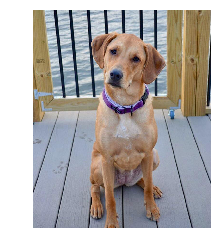

In [57]:
make_prediction_VGG19('images/chelsea.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Dalmatian.


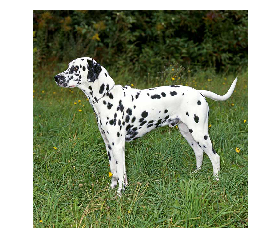

In [58]:
make_prediction_VGG19('images/dal.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Pomeranian.


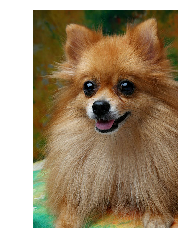

In [59]:
make_prediction_VGG19('images/pomerian.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Pomeranian.


Top 5 predictions (for mixed breeds)
Predicted breed: Pomeranian with a confidence of 0.9915
Predicted breed: Collie with a confidence of 0.0048
Predicted breed: Chihuahua with a confidence of 0.0036
Predicted breed: Icelandic sheepdog with a confidence of 0.0000
Predicted breed: Cavalier king charles spaniel with a confidence of 0.0000


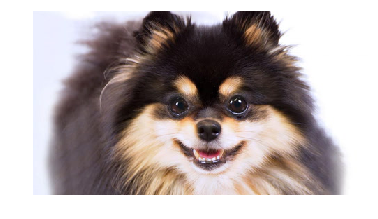

In [60]:
make_prediction_VGG19('images/pom.jpg',multiple_breeds = True )

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Norwegian buhund.


Top 5 predictions (for mixed breeds)
Predicted breed: Norwegian buhund with a confidence of 0.4516
Predicted breed: Pomeranian with a confidence of 0.4139
Predicted breed: Norfolk terrier with a confidence of 0.0359
Predicted breed: Lhasa apso with a confidence of 0.0238
Predicted breed: Cocker spaniel with a confidence of 0.0128


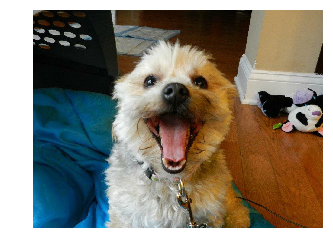

In [61]:
make_prediction_VGG19('images/melissa2.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Doberman pinscher.


Top 5 predictions (for mixed breeds)
Predicted breed: Doberman pinscher with a confidence of 0.8212
Predicted breed: German pinscher with a confidence of 0.1692
Predicted breed: Manchester terrier with a confidence of 0.0059
Predicted breed: Beauceron with a confidence of 0.0036
Predicted breed: Dachshund with a confidence of 0.0001


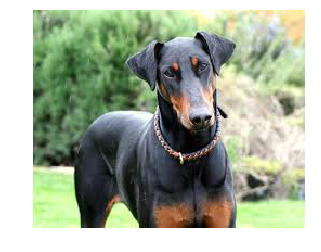

In [62]:
make_prediction_VGG19('images/dober.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chihuahua.


Top 5 predictions (for mixed breeds)
Predicted breed: Chihuahua with a confidence of 0.3900
Predicted breed: Great dane with a confidence of 0.3270
Predicted breed: Boston terrier with a confidence of 0.0574
Predicted breed: German pinscher with a confidence of 0.0506
Predicted breed: Belgian malinois with a confidence of 0.0235


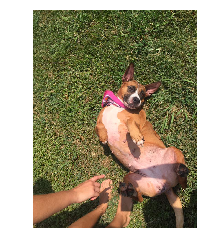

In [63]:
make_prediction_VGG19('images/Jason.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chihuahua.


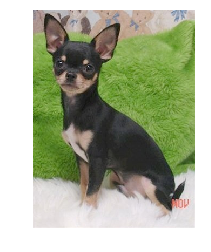

In [64]:
make_prediction_VGG19('images/chihuahua2.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chihuahua.


Top 5 predictions (for mixed breeds)
Predicted breed: Chihuahua with a confidence of 0.9998
Predicted breed: Basenji with a confidence of 0.0002
Predicted breed: Xoloitzcuintli with a confidence of 0.0000
Predicted breed: Italian greyhound with a confidence of 0.0000
Predicted breed: Manchester terrier with a confidence of 0.0000


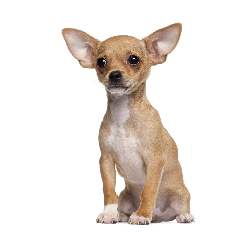

In [65]:
make_prediction_VGG19('images/chihuahua.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Papillon.


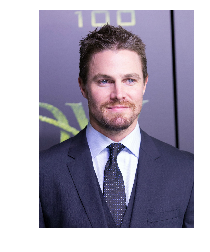

In [66]:
make_prediction_VGG19('images/stephen.png')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Lowchen.


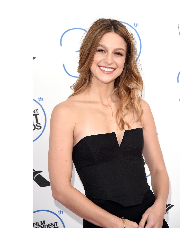

In [67]:
make_prediction_VGG19('images/melissa.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


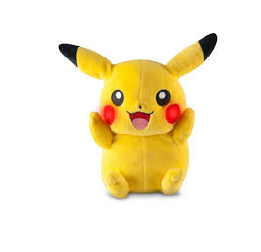

In [68]:
make_prediction_VGG19('images/pikachu.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


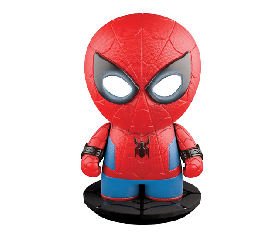

In [69]:
make_prediction_VGG19('images/spidey.jpg')

----------------------------------

# Step 4.4: Using Xception

<img style="border-width:0" src="https://cdn-images-1.medium.com/max/1600/1*SRBSbojkg48DTUMcP5VVHg.jpeg" />

- Xception stands for “extreme inception” it takes the principles of Inception to an extreme.
- In the Xception, it partitions input data into several compressed chunks, it maps the spatial correlations for each output channel separately, and then performs a 1x1 depthwise convolution to capture cross-channel correlation.



In [70]:
from keras.applications import xception

### Extracting bottleneck features

i.e Xception Bottleneck features

In [71]:
bottleneck_features_xception = np.load('bottleneck_features/DogXceptionData.npz')
train_xception = bottleneck_features_xception['train']
valid_xception = bottleneck_features_xception['valid']
test_xception = bottleneck_features_xception['test']

dog_breeds = len(dog_names)

### Defining the Model Architecture

In [72]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

xception_model = Sequential()
xception_model.add(GlobalAveragePooling2D(input_shape=train_xception.shape[1:]))
xception_model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
xception_model.add(Dropout(0.4))
xception_model.add(Dense(dog_breeds, activation='softmax'))

xception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               307350    
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 133)               20083     
Total params: 327,433
Trainable params: 327,433
Non-trainable params: 0
_________________________________________________________________



### Compiling the Model

In [73]:
from keras.optimizers import Adam, Adamax

xception_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

### Training the Model

In [74]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', verbose=1, save_best_only=True)

xception_model.fit(train_xception, train_targets, 
          validation_data=(valid_xception, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 28:47 - loss: 6.3689 - acc: 0.0000e+ - ETA: 9:38 - loss: 6.3404 - acc: 0.0000e+00 - ETA: 4:49 - loss: 6.3172 - acc: 0.0167    - ETA: 3:13 - loss: 6.3734 - acc: 0.022 - ETA: 2:25 - loss: 6.3100 - acc: 0.037 - ETA: 1:56 - loss: 6.2266 - acc: 0.046 - ETA: 1:37 - loss: 6.1547 - acc: 0.050 - ETA: 1:23 - loss: 6.1056 - acc: 0.057 - ETA: 1:13 - loss: 6.0591 - acc: 0.064 - ETA: 1:05 - loss: 6.0358 - acc: 0.068 - ETA: 58s - loss: 5.9780 - acc: 0.080 - ETA: 53s - loss: 5.9263 - acc: 0.08 - ETA: 48s - loss: 5.8721 - acc: 0.10 - ETA: 45s - loss: 5.8144 - acc: 0.11 - ETA: 41s - loss: 5.7754 - acc: 0.12 - ETA: 39s - loss: 5.7257 - acc: 0.13 - ETA: 36s - loss: 5.6817 - acc: 0.14 - ETA: 34s - loss: 5.6316 - acc: 0.14 - ETA: 32s - loss: 5.5888 - acc: 0.15 - ETA: 30s - loss: 5.5589 - acc: 0.16 - ETA: 29s - loss: 5.5176 - acc: 0.16 - ETA: 27s - loss: 5.4713 - acc: 0.17 - ETA: 26s - loss: 5.4396 - a

6680/6680 [==============================] - ETA: 6s - loss: 2.0018 - acc: 0.600 - ETA: 6s - loss: 1.6887 - acc: 0.762 - ETA: 6s - loss: 1.6008 - acc: 0.757 - ETA: 6s - loss: 1.5802 - acc: 0.765 - ETA: 6s - loss: 1.5623 - acc: 0.784 - ETA: 6s - loss: 1.5616 - acc: 0.790 - ETA: 6s - loss: 1.5585 - acc: 0.792 - ETA: 5s - loss: 1.5419 - acc: 0.795 - ETA: 5s - loss: 1.5684 - acc: 0.782 - ETA: 5s - loss: 1.5539 - acc: 0.785 - ETA: 5s - loss: 1.5548 - acc: 0.783 - ETA: 5s - loss: 1.5495 - acc: 0.782 - ETA: 5s - loss: 1.5355 - acc: 0.785 - ETA: 5s - loss: 1.5337 - acc: 0.785 - ETA: 5s - loss: 1.5310 - acc: 0.784 - ETA: 5s - loss: 1.5115 - acc: 0.791 - ETA: 5s - loss: 1.5090 - acc: 0.792 - ETA: 5s - loss: 1.5009 - acc: 0.793 - ETA: 5s - loss: 1.4933 - acc: 0.795 - ETA: 5s - loss: 1.5076 - acc: 0.791 - ETA: 5s - loss: 1.5126 - acc: 0.791 - ETA: 5s - loss: 1.5123 - acc: 0.786 - ETA: 5s - loss: 1.5235 - acc: 0.783 - ETA: 5s - loss: 1.5373 - acc: 0.778 - ETA: 4s - loss: 1.5374 - acc: 0.778 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 1.5958 - acc: 0.750 - ETA: 6s - loss: 1.2150 - acc: 0.812 - ETA: 6s - loss: 1.1450 - acc: 0.835 - ETA: 6s - loss: 1.1661 - acc: 0.815 - ETA: 6s - loss: 1.1426 - acc: 0.823 - ETA: 6s - loss: 1.1677 - acc: 0.809 - ETA: 6s - loss: 1.1561 - acc: 0.807 - ETA: 6s - loss: 1.1961 - acc: 0.797 - ETA: 6s - loss: 1.1940 - acc: 0.800 - ETA: 6s - loss: 1.1698 - acc: 0.812 - ETA: 6s - loss: 1.1509 - acc: 0.819 - ETA: 6s - loss: 1.1480 - acc: 0.823 - ETA: 5s - loss: 1.1701 - acc: 0.814 - ETA: 5s - loss: 1.1496 - acc: 0.822 - ETA: 5s - loss: 1.1600 - acc: 0.817 - ETA: 5s - loss: 1.1603 - acc: 0.820 - ETA: 5s - loss: 1.1580 - acc: 0.822 - ETA: 5s - loss: 1.1656 - acc: 0.820 - ETA: 5s - loss: 1.1589 - acc: 0.825 - ETA: 5s - loss: 1.1579 - acc: 0.823 - ETA: 5s - loss: 1.1589 - acc: 0.823 - ETA: 5s - loss: 1.1577 - acc: 0.821 - ETA: 5s - loss: 1.1701 - acc: 0.817 - ETA: 5s - loss: 1.1832 - acc: 0.816 - ETA: 5s - loss: 1.1836 - acc: 0.818 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8059 - acc: 0.850 - ETA: 6s - loss: 1.0470 - acc: 0.812 - ETA: 6s - loss: 1.1356 - acc: 0.778 - ETA: 6s - loss: 1.0745 - acc: 0.810 - ETA: 6s - loss: 1.0575 - acc: 0.811 - ETA: 6s - loss: 1.0325 - acc: 0.825 - ETA: 6s - loss: 1.0348 - acc: 0.826 - ETA: 6s - loss: 1.0228 - acc: 0.827 - ETA: 6s - loss: 1.0413 - acc: 0.828 - ETA: 5s - loss: 1.0562 - acc: 0.823 - ETA: 5s - loss: 1.0636 - acc: 0.822 - ETA: 5s - loss: 1.0571 - acc: 0.822 - ETA: 5s - loss: 1.0494 - acc: 0.825 - ETA: 5s - loss: 1.0402 - acc: 0.826 - ETA: 5s - loss: 1.0512 - acc: 0.819 - ETA: 5s - loss: 1.0516 - acc: 0.817 - ETA: 5s - loss: 1.0468 - acc: 0.819 - ETA: 5s - loss: 1.0384 - acc: 0.824 - ETA: 5s - loss: 1.0321 - acc: 0.828 - ETA: 5s - loss: 1.0267 - acc: 0.829 - ETA: 5s - loss: 1.0367 - acc: 0.824 - ETA: 5s - loss: 1.0292 - acc: 0.826 - ETA: 5s - loss: 1.0322 - acc: 0.829 - ETA: 5s - loss: 1.0284 - acc: 0.832 - ETA: 5s - loss: 1.0307 - acc: 0.830 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8699 - acc: 0.950 - ETA: 6s - loss: 0.8934 - acc: 0.875 - ETA: 6s - loss: 0.9683 - acc: 0.828 - ETA: 6s - loss: 1.0115 - acc: 0.810 - ETA: 6s - loss: 1.0148 - acc: 0.830 - ETA: 6s - loss: 1.0433 - acc: 0.821 - ETA: 6s - loss: 1.0489 - acc: 0.821 - ETA: 6s - loss: 1.0486 - acc: 0.815 - ETA: 6s - loss: 1.0380 - acc: 0.824 - ETA: 6s - loss: 1.0326 - acc: 0.826 - ETA: 6s - loss: 1.0497 - acc: 0.819 - ETA: 5s - loss: 1.0466 - acc: 0.820 - ETA: 5s - loss: 1.0421 - acc: 0.824 - ETA: 5s - loss: 1.0245 - acc: 0.831 - ETA: 5s - loss: 1.0285 - acc: 0.831 - ETA: 5s - loss: 1.0283 - acc: 0.827 - ETA: 5s - loss: 1.0171 - acc: 0.831 - ETA: 5s - loss: 1.0111 - acc: 0.833 - ETA: 5s - loss: 1.0073 - acc: 0.835 - ETA: 5s - loss: 1.0111 - acc: 0.832 - ETA: 5s - loss: 1.0130 - acc: 0.833 - ETA: 5s - loss: 1.0039 - acc: 0.834 - ETA: 5s - loss: 1.0050 - acc: 0.834 - ETA: 5s - loss: 1.0048 - acc: 0.834 - ETA: 5s - loss: 1.0134 - acc: 0.831 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6355 - acc: 0.950 - ETA: 6s - loss: 0.8524 - acc: 0.887 - ETA: 6s - loss: 0.7866 - acc: 0.900 - ETA: 6s - loss: 0.8423 - acc: 0.880 - ETA: 6s - loss: 0.8636 - acc: 0.869 - ETA: 6s - loss: 0.8581 - acc: 0.859 - ETA: 6s - loss: 0.8430 - acc: 0.871 - ETA: 6s - loss: 0.8794 - acc: 0.863 - ETA: 6s - loss: 0.8919 - acc: 0.862 - ETA: 6s - loss: 0.9052 - acc: 0.860 - ETA: 6s - loss: 0.9158 - acc: 0.860 - ETA: 6s - loss: 0.9207 - acc: 0.856 - ETA: 5s - loss: 0.9224 - acc: 0.856 - ETA: 5s - loss: 0.9179 - acc: 0.857 - ETA: 5s - loss: 0.9182 - acc: 0.858 - ETA: 5s - loss: 0.9155 - acc: 0.858 - ETA: 5s - loss: 0.9295 - acc: 0.855 - ETA: 5s - loss: 0.9312 - acc: 0.856 - ETA: 5s - loss: 0.9375 - acc: 0.853 - ETA: 5s - loss: 0.9352 - acc: 0.856 - ETA: 5s - loss: 0.9451 - acc: 0.851 - ETA: 5s - loss: 0.9576 - acc: 0.845 - ETA: 5s - loss: 0.9568 - acc: 0.843 - ETA: 5s - loss: 0.9554 - acc: 0.843 - ETA: 5s - loss: 0.9536 - acc: 0.840 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8111 - acc: 0.850 - ETA: 6s - loss: 0.8628 - acc: 0.862 - ETA: 6s - loss: 0.9290 - acc: 0.807 - ETA: 6s - loss: 0.9810 - acc: 0.811 - ETA: 6s - loss: 0.9465 - acc: 0.829 - ETA: 6s - loss: 0.9495 - acc: 0.826 - ETA: 6s - loss: 0.9212 - acc: 0.836 - ETA: 6s - loss: 0.9222 - acc: 0.831 - ETA: 6s - loss: 0.9050 - acc: 0.837 - ETA: 6s - loss: 0.9286 - acc: 0.829 - ETA: 6s - loss: 0.9262 - acc: 0.835 - ETA: 6s - loss: 0.9189 - acc: 0.836 - ETA: 5s - loss: 0.9083 - acc: 0.838 - ETA: 5s - loss: 0.8996 - acc: 0.844 - ETA: 5s - loss: 0.9132 - acc: 0.840 - ETA: 5s - loss: 0.9092 - acc: 0.840 - ETA: 5s - loss: 0.9142 - acc: 0.841 - ETA: 5s - loss: 0.9231 - acc: 0.836 - ETA: 5s - loss: 0.9089 - acc: 0.841 - ETA: 5s - loss: 0.9099 - acc: 0.842 - ETA: 5s - loss: 0.9188 - acc: 0.839 - ETA: 5s - loss: 0.9306 - acc: 0.835 - ETA: 5s - loss: 0.9257 - acc: 0.838 - ETA: 5s - loss: 0.9257 - acc: 0.840 - ETA: 5s - loss: 0.9229 - acc: 0.842 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 1.0721 - acc: 0.800 - ETA: 6s - loss: 0.8370 - acc: 0.862 - ETA: 6s - loss: 0.8333 - acc: 0.871 - ETA: 6s - loss: 0.8507 - acc: 0.870 - ETA: 6s - loss: 0.8533 - acc: 0.873 - ETA: 6s - loss: 0.8802 - acc: 0.862 - ETA: 6s - loss: 0.8702 - acc: 0.860 - ETA: 6s - loss: 0.8776 - acc: 0.859 - ETA: 6s - loss: 0.8810 - acc: 0.864 - ETA: 6s - loss: 0.8903 - acc: 0.861 - ETA: 6s - loss: 0.8762 - acc: 0.861 - ETA: 6s - loss: 0.8617 - acc: 0.865 - ETA: 6s - loss: 0.8615 - acc: 0.865 - ETA: 6s - loss: 0.8551 - acc: 0.865 - ETA: 5s - loss: 0.8490 - acc: 0.867 - ETA: 5s - loss: 0.8465 - acc: 0.867 - ETA: 5s - loss: 0.8498 - acc: 0.867 - ETA: 5s - loss: 0.8500 - acc: 0.867 - ETA: 5s - loss: 0.8555 - acc: 0.866 - ETA: 5s - loss: 0.8577 - acc: 0.867 - ETA: 5s - loss: 0.8540 - acc: 0.868 - ETA: 5s - loss: 0.8529 - acc: 0.865 - ETA: 5s - loss: 0.8480 - acc: 0.867 - ETA: 5s - loss: 0.8462 - acc: 0.866 - ETA: 5s - loss: 0.8454 - acc: 0.866 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8371 - acc: 0.800 - ETA: 6s - loss: 0.7661 - acc: 0.887 - ETA: 6s - loss: 0.7720 - acc: 0.878 - ETA: 6s - loss: 0.7960 - acc: 0.865 - ETA: 6s - loss: 0.7892 - acc: 0.865 - ETA: 6s - loss: 0.8194 - acc: 0.859 - ETA: 6s - loss: 0.8459 - acc: 0.842 - ETA: 6s - loss: 0.8491 - acc: 0.843 - ETA: 6s - loss: 0.8558 - acc: 0.840 - ETA: 6s - loss: 0.8482 - acc: 0.846 - ETA: 6s - loss: 0.8559 - acc: 0.840 - ETA: 6s - loss: 0.8540 - acc: 0.839 - ETA: 5s - loss: 0.8605 - acc: 0.839 - ETA: 5s - loss: 0.8580 - acc: 0.840 - ETA: 5s - loss: 0.8523 - acc: 0.843 - ETA: 5s - loss: 0.8491 - acc: 0.844 - ETA: 5s - loss: 0.8499 - acc: 0.846 - ETA: 5s - loss: 0.8436 - acc: 0.848 - ETA: 5s - loss: 0.8364 - acc: 0.851 - ETA: 5s - loss: 0.8352 - acc: 0.852 - ETA: 5s - loss: 0.8393 - acc: 0.852 - ETA: 5s - loss: 0.8334 - acc: 0.854 - ETA: 5s - loss: 0.8388 - acc: 0.855 - ETA: 5s - loss: 0.8344 - acc: 0.857 - ETA: 5s - loss: 0.8384 - acc: 0.854 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5676 - acc: 0.950 - ETA: 6s - loss: 0.7235 - acc: 0.887 - ETA: 6s - loss: 0.7823 - acc: 0.864 - ETA: 6s - loss: 0.7692 - acc: 0.870 - ETA: 6s - loss: 0.7842 - acc: 0.873 - ETA: 6s - loss: 0.7931 - acc: 0.865 - ETA: 6s - loss: 0.7817 - acc: 0.868 - ETA: 6s - loss: 0.7789 - acc: 0.875 - ETA: 6s - loss: 0.8063 - acc: 0.868 - ETA: 6s - loss: 0.8182 - acc: 0.860 - ETA: 6s - loss: 0.8169 - acc: 0.858 - ETA: 6s - loss: 0.8070 - acc: 0.863 - ETA: 5s - loss: 0.8034 - acc: 0.863 - ETA: 5s - loss: 0.8150 - acc: 0.858 - ETA: 5s - loss: 0.8197 - acc: 0.855 - ETA: 5s - loss: 0.8167 - acc: 0.857 - ETA: 5s - loss: 0.8117 - acc: 0.860 - ETA: 5s - loss: 0.8119 - acc: 0.859 - ETA: 5s - loss: 0.8153 - acc: 0.856 - ETA: 5s - loss: 0.8109 - acc: 0.858 - ETA: 5s - loss: 0.8077 - acc: 0.861 - ETA: 5s - loss: 0.8100 - acc: 0.860 - ETA: 5s - loss: 0.8164 - acc: 0.859 - ETA: 5s - loss: 0.8177 - acc: 0.862 - ETA: 5s - loss: 0.8192 - acc: 0.863 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.8453 - acc: 0.800 - ETA: 6s - loss: 0.6623 - acc: 0.900 - ETA: 6s - loss: 0.6777 - acc: 0.900 - ETA: 6s - loss: 0.7100 - acc: 0.900 - ETA: 6s - loss: 0.7274 - acc: 0.884 - ETA: 6s - loss: 0.7458 - acc: 0.887 - ETA: 6s - loss: 0.7347 - acc: 0.892 - ETA: 6s - loss: 0.7285 - acc: 0.890 - ETA: 6s - loss: 0.7626 - acc: 0.874 - ETA: 6s - loss: 0.7692 - acc: 0.867 - ETA: 6s - loss: 0.7669 - acc: 0.866 - ETA: 6s - loss: 0.7677 - acc: 0.867 - ETA: 6s - loss: 0.7705 - acc: 0.868 - ETA: 6s - loss: 0.7685 - acc: 0.872 - ETA: 6s - loss: 0.7655 - acc: 0.873 - ETA: 6s - loss: 0.7636 - acc: 0.872 - ETA: 5s - loss: 0.7712 - acc: 0.866 - ETA: 5s - loss: 0.7711 - acc: 0.868 - ETA: 5s - loss: 0.7655 - acc: 0.870 - ETA: 5s - loss: 0.7648 - acc: 0.873 - ETA: 5s - loss: 0.7644 - acc: 0.873 - ETA: 5s - loss: 0.7541 - acc: 0.878 - ETA: 5s - loss: 0.7544 - acc: 0.879 - ETA: 5s - loss: 0.7516 - acc: 0.880 - ETA: 5s - loss: 0.7530 - acc: 0.878 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6379 - acc: 0.900 - ETA: 6s - loss: 0.7103 - acc: 0.875 - ETA: 6s - loss: 0.7071 - acc: 0.885 - ETA: 6s - loss: 0.7567 - acc: 0.865 - ETA: 6s - loss: 0.7693 - acc: 0.853 - ETA: 6s - loss: 0.7399 - acc: 0.878 - ETA: 6s - loss: 0.7651 - acc: 0.863 - ETA: 6s - loss: 0.7475 - acc: 0.870 - ETA: 6s - loss: 0.7485 - acc: 0.874 - ETA: 6s - loss: 0.7460 - acc: 0.876 - ETA: 6s - loss: 0.7405 - acc: 0.879 - ETA: 6s - loss: 0.7390 - acc: 0.882 - ETA: 6s - loss: 0.7510 - acc: 0.874 - ETA: 6s - loss: 0.7456 - acc: 0.876 - ETA: 6s - loss: 0.7490 - acc: 0.876 - ETA: 6s - loss: 0.7557 - acc: 0.872 - ETA: 6s - loss: 0.7596 - acc: 0.872 - ETA: 5s - loss: 0.7616 - acc: 0.873 - ETA: 5s - loss: 0.7514 - acc: 0.877 - ETA: 5s - loss: 0.7644 - acc: 0.872 - ETA: 5s - loss: 0.7677 - acc: 0.870 - ETA: 5s - loss: 0.7748 - acc: 0.868 - ETA: 5s - loss: 0.7745 - acc: 0.870 - ETA: 5s - loss: 0.7731 - acc: 0.869 - ETA: 5s - loss: 0.7732 - acc: 0.868 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5080 - acc: 0.950 - ETA: 7s - loss: 0.6505 - acc: 0.875 - ETA: 6s - loss: 0.6479 - acc: 0.878 - ETA: 6s - loss: 0.6429 - acc: 0.885 - ETA: 6s - loss: 0.6786 - acc: 0.884 - ETA: 6s - loss: 0.6985 - acc: 0.884 - ETA: 6s - loss: 0.7119 - acc: 0.878 - ETA: 6s - loss: 0.7333 - acc: 0.875 - ETA: 6s - loss: 0.7349 - acc: 0.880 - ETA: 6s - loss: 0.7234 - acc: 0.885 - ETA: 5s - loss: 0.7373 - acc: 0.879 - ETA: 5s - loss: 0.7334 - acc: 0.882 - ETA: 5s - loss: 0.7420 - acc: 0.883 - ETA: 5s - loss: 0.7437 - acc: 0.881 - ETA: 5s - loss: 0.7337 - acc: 0.887 - ETA: 5s - loss: 0.7246 - acc: 0.890 - ETA: 5s - loss: 0.7311 - acc: 0.885 - ETA: 5s - loss: 0.7438 - acc: 0.879 - ETA: 5s - loss: 0.7422 - acc: 0.878 - ETA: 5s - loss: 0.7412 - acc: 0.879 - ETA: 5s - loss: 0.7456 - acc: 0.879 - ETA: 5s - loss: 0.7393 - acc: 0.880 - ETA: 5s - loss: 0.7358 - acc: 0.882 - ETA: 5s - loss: 0.7306 - acc: 0.883 - ETA: 5s - loss: 0.7373 - acc: 0.878 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6930 - acc: 0.900 - ETA: 6s - loss: 0.7132 - acc: 0.900 - ETA: 6s - loss: 0.6918 - acc: 0.907 - ETA: 6s - loss: 0.7293 - acc: 0.885 - ETA: 6s - loss: 0.7381 - acc: 0.880 - ETA: 6s - loss: 0.7024 - acc: 0.887 - ETA: 6s - loss: 0.7309 - acc: 0.873 - ETA: 6s - loss: 0.7307 - acc: 0.868 - ETA: 6s - loss: 0.7325 - acc: 0.870 - ETA: 6s - loss: 0.7361 - acc: 0.867 - ETA: 6s - loss: 0.7301 - acc: 0.874 - ETA: 5s - loss: 0.7386 - acc: 0.872 - ETA: 5s - loss: 0.7326 - acc: 0.871 - ETA: 5s - loss: 0.7426 - acc: 0.868 - ETA: 5s - loss: 0.7398 - acc: 0.868 - ETA: 5s - loss: 0.7479 - acc: 0.867 - ETA: 5s - loss: 0.7517 - acc: 0.867 - ETA: 5s - loss: 0.7509 - acc: 0.867 - ETA: 5s - loss: 0.7514 - acc: 0.867 - ETA: 5s - loss: 0.7603 - acc: 0.865 - ETA: 5s - loss: 0.7551 - acc: 0.868 - ETA: 5s - loss: 0.7547 - acc: 0.868 - ETA: 5s - loss: 0.7571 - acc: 0.867 - ETA: 5s - loss: 0.7566 - acc: 0.867 - ETA: 5s - loss: 0.7546 - acc: 0.866 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6675 - acc: 0.900 - ETA: 6s - loss: 0.8337 - acc: 0.825 - ETA: 6s - loss: 0.7720 - acc: 0.842 - ETA: 6s - loss: 0.7353 - acc: 0.865 - ETA: 6s - loss: 0.7516 - acc: 0.853 - ETA: 6s - loss: 0.7404 - acc: 0.862 - ETA: 6s - loss: 0.7415 - acc: 0.868 - ETA: 6s - loss: 0.7631 - acc: 0.856 - ETA: 5s - loss: 0.7555 - acc: 0.860 - ETA: 5s - loss: 0.7426 - acc: 0.867 - ETA: 5s - loss: 0.7443 - acc: 0.867 - ETA: 5s - loss: 0.7521 - acc: 0.867 - ETA: 5s - loss: 0.7459 - acc: 0.870 - ETA: 5s - loss: 0.7514 - acc: 0.867 - ETA: 5s - loss: 0.7451 - acc: 0.870 - ETA: 5s - loss: 0.7420 - acc: 0.871 - ETA: 5s - loss: 0.7444 - acc: 0.872 - ETA: 5s - loss: 0.7441 - acc: 0.873 - ETA: 5s - loss: 0.7531 - acc: 0.867 - ETA: 5s - loss: 0.7540 - acc: 0.866 - ETA: 5s - loss: 0.7590 - acc: 0.861 - ETA: 5s - loss: 0.7543 - acc: 0.864 - ETA: 5s - loss: 0.7536 - acc: 0.863 - ETA: 5s - loss: 0.7570 - acc: 0.862 - ETA: 5s - loss: 0.7587 - acc: 0.863 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5521 - acc: 1.000 - ETA: 6s - loss: 0.6755 - acc: 0.912 - ETA: 6s - loss: 0.6423 - acc: 0.921 - ETA: 6s - loss: 0.6661 - acc: 0.910 - ETA: 6s - loss: 0.6836 - acc: 0.896 - ETA: 6s - loss: 0.6902 - acc: 0.890 - ETA: 6s - loss: 0.6752 - acc: 0.897 - ETA: 6s - loss: 0.6964 - acc: 0.893 - ETA: 5s - loss: 0.6940 - acc: 0.898 - ETA: 5s - loss: 0.6940 - acc: 0.896 - ETA: 5s - loss: 0.6805 - acc: 0.900 - ETA: 5s - loss: 0.6919 - acc: 0.892 - ETA: 5s - loss: 0.6823 - acc: 0.894 - ETA: 5s - loss: 0.6800 - acc: 0.895 - ETA: 5s - loss: 0.6746 - acc: 0.897 - ETA: 5s - loss: 0.6875 - acc: 0.894 - ETA: 5s - loss: 0.6917 - acc: 0.891 - ETA: 5s - loss: 0.6964 - acc: 0.885 - ETA: 5s - loss: 0.6944 - acc: 0.885 - ETA: 5s - loss: 0.7005 - acc: 0.879 - ETA: 5s - loss: 0.7037 - acc: 0.877 - ETA: 5s - loss: 0.7069 - acc: 0.876 - ETA: 5s - loss: 0.7094 - acc: 0.874 - ETA: 5s - loss: 0.7124 - acc: 0.872 - ETA: 5s - loss: 0.7078 - acc: 0.875 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7428 - acc: 0.850 - ETA: 6s - loss: 0.6588 - acc: 0.900 - ETA: 6s - loss: 0.6532 - acc: 0.885 - ETA: 6s - loss: 0.6218 - acc: 0.900 - ETA: 6s - loss: 0.6461 - acc: 0.903 - ETA: 6s - loss: 0.6372 - acc: 0.912 - ETA: 6s - loss: 0.6551 - acc: 0.900 - ETA: 6s - loss: 0.6409 - acc: 0.902 - ETA: 6s - loss: 0.6376 - acc: 0.904 - ETA: 5s - loss: 0.6443 - acc: 0.900 - ETA: 5s - loss: 0.6594 - acc: 0.896 - ETA: 5s - loss: 0.6549 - acc: 0.901 - ETA: 5s - loss: 0.6694 - acc: 0.898 - ETA: 5s - loss: 0.6682 - acc: 0.898 - ETA: 5s - loss: 0.6637 - acc: 0.901 - ETA: 5s - loss: 0.6785 - acc: 0.894 - ETA: 5s - loss: 0.6812 - acc: 0.892 - ETA: 5s - loss: 0.6926 - acc: 0.882 - ETA: 5s - loss: 0.6933 - acc: 0.882 - ETA: 5s - loss: 0.6905 - acc: 0.882 - ETA: 5s - loss: 0.6855 - acc: 0.885 - ETA: 5s - loss: 0.6882 - acc: 0.884 - ETA: 5s - loss: 0.6864 - acc: 0.884 - ETA: 5s - loss: 0.6893 - acc: 0.882 - ETA: 5s - loss: 0.6893 - acc: 0.881 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5826 - acc: 0.950 - ETA: 6s - loss: 0.7293 - acc: 0.875 - ETA: 6s - loss: 0.7175 - acc: 0.871 - ETA: 6s - loss: 0.7143 - acc: 0.880 - ETA: 6s - loss: 0.6962 - acc: 0.888 - ETA: 6s - loss: 0.6940 - acc: 0.890 - ETA: 6s - loss: 0.7002 - acc: 0.886 - ETA: 6s - loss: 0.7005 - acc: 0.881 - ETA: 6s - loss: 0.7001 - acc: 0.879 - ETA: 6s - loss: 0.6825 - acc: 0.890 - ETA: 6s - loss: 0.6994 - acc: 0.886 - ETA: 6s - loss: 0.6893 - acc: 0.890 - ETA: 6s - loss: 0.6802 - acc: 0.895 - ETA: 5s - loss: 0.6845 - acc: 0.894 - ETA: 5s - loss: 0.6867 - acc: 0.895 - ETA: 5s - loss: 0.6821 - acc: 0.900 - ETA: 5s - loss: 0.6794 - acc: 0.899 - ETA: 5s - loss: 0.6742 - acc: 0.902 - ETA: 5s - loss: 0.6694 - acc: 0.905 - ETA: 5s - loss: 0.6660 - acc: 0.907 - ETA: 5s - loss: 0.6732 - acc: 0.901 - ETA: 5s - loss: 0.6792 - acc: 0.898 - ETA: 5s - loss: 0.6757 - acc: 0.901 - ETA: 5s - loss: 0.6830 - acc: 0.898 - ETA: 5s - loss: 0.6936 - acc: 0.895 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.5585 - acc: 0.950 - ETA: 6s - loss: 0.5428 - acc: 0.950 - ETA: 6s - loss: 0.5819 - acc: 0.935 - ETA: 6s - loss: 0.6321 - acc: 0.925 - ETA: 6s - loss: 0.6213 - acc: 0.926 - ETA: 6s - loss: 0.6105 - acc: 0.931 - ETA: 6s - loss: 0.6149 - acc: 0.926 - ETA: 6s - loss: 0.6330 - acc: 0.915 - ETA: 6s - loss: 0.6240 - acc: 0.914 - ETA: 6s - loss: 0.6311 - acc: 0.907 - ETA: 5s - loss: 0.6319 - acc: 0.903 - ETA: 5s - loss: 0.6369 - acc: 0.895 - ETA: 5s - loss: 0.6440 - acc: 0.894 - ETA: 5s - loss: 0.6400 - acc: 0.897 - ETA: 5s - loss: 0.6399 - acc: 0.897 - ETA: 5s - loss: 0.6493 - acc: 0.895 - ETA: 5s - loss: 0.6447 - acc: 0.899 - ETA: 5s - loss: 0.6443 - acc: 0.897 - ETA: 5s - loss: 0.6488 - acc: 0.893 - ETA: 5s - loss: 0.6596 - acc: 0.890 - ETA: 5s - loss: 0.6599 - acc: 0.892 - ETA: 5s - loss: 0.6616 - acc: 0.892 - ETA: 5s - loss: 0.6588 - acc: 0.895 - ETA: 5s - loss: 0.6577 - acc: 0.895 - ETA: 5s - loss: 0.6610 - acc: 0.895 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 1.0685 - acc: 0.700 - ETA: 6s - loss: 0.8241 - acc: 0.837 - ETA: 7s - loss: 0.7562 - acc: 0.850 - ETA: 7s - loss: 0.7601 - acc: 0.855 - ETA: 6s - loss: 0.7406 - acc: 0.850 - ETA: 6s - loss: 0.6979 - acc: 0.873 - ETA: 6s - loss: 0.6870 - acc: 0.875 - ETA: 6s - loss: 0.6914 - acc: 0.871 - ETA: 6s - loss: 0.7007 - acc: 0.862 - ETA: 6s - loss: 0.6917 - acc: 0.868 - ETA: 6s - loss: 0.6872 - acc: 0.871 - ETA: 6s - loss: 0.6765 - acc: 0.878 - ETA: 5s - loss: 0.6725 - acc: 0.879 - ETA: 5s - loss: 0.6657 - acc: 0.882 - ETA: 5s - loss: 0.6754 - acc: 0.879 - ETA: 5s - loss: 0.6749 - acc: 0.880 - ETA: 5s - loss: 0.6770 - acc: 0.878 - ETA: 5s - loss: 0.6739 - acc: 0.877 - ETA: 5s - loss: 0.6732 - acc: 0.879 - ETA: 5s - loss: 0.6733 - acc: 0.880 - ETA: 5s - loss: 0.6725 - acc: 0.881 - ETA: 5s - loss: 0.6791 - acc: 0.879 - ETA: 5s - loss: 0.6691 - acc: 0.883 - ETA: 5s - loss: 0.6729 - acc: 0.883 - ETA: 5s - loss: 0.6743 - acc: 0.884 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.4660 - acc: 0.950 - ETA: 6s - loss: 0.5967 - acc: 0.925 - ETA: 6s - loss: 0.6221 - acc: 0.892 - ETA: 6s - loss: 0.6414 - acc: 0.895 - ETA: 6s - loss: 0.6311 - acc: 0.896 - ETA: 6s - loss: 0.6255 - acc: 0.896 - ETA: 6s - loss: 0.6107 - acc: 0.894 - ETA: 6s - loss: 0.6316 - acc: 0.890 - ETA: 6s - loss: 0.6329 - acc: 0.890 - ETA: 6s - loss: 0.6292 - acc: 0.889 - ETA: 6s - loss: 0.6296 - acc: 0.887 - ETA: 6s - loss: 0.6289 - acc: 0.885 - ETA: 6s - loss: 0.6376 - acc: 0.881 - ETA: 5s - loss: 0.6331 - acc: 0.883 - ETA: 5s - loss: 0.6424 - acc: 0.879 - ETA: 5s - loss: 0.6440 - acc: 0.880 - ETA: 5s - loss: 0.6400 - acc: 0.882 - ETA: 5s - loss: 0.6463 - acc: 0.880 - ETA: 5s - loss: 0.6577 - acc: 0.877 - ETA: 5s - loss: 0.6546 - acc: 0.877 - ETA: 5s - loss: 0.6537 - acc: 0.878 - ETA: 5s - loss: 0.6539 - acc: 0.879 - ETA: 5s - loss: 0.6610 - acc: 0.877 - ETA: 5s - loss: 0.6658 - acc: 0.876 - ETA: 5s - loss: 0.6633 - acc: 0.878 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5252 - acc: 0.900 - ETA: 6s - loss: 0.6927 - acc: 0.837 - ETA: 6s - loss: 0.6459 - acc: 0.864 - ETA: 6s - loss: 0.6243 - acc: 0.880 - ETA: 6s - loss: 0.6147 - acc: 0.892 - ETA: 6s - loss: 0.6221 - acc: 0.896 - ETA: 6s - loss: 0.6237 - acc: 0.894 - ETA: 6s - loss: 0.6542 - acc: 0.888 - ETA: 6s - loss: 0.6655 - acc: 0.884 - ETA: 6s - loss: 0.6688 - acc: 0.885 - ETA: 6s - loss: 0.6654 - acc: 0.887 - ETA: 6s - loss: 0.6572 - acc: 0.889 - ETA: 5s - loss: 0.6543 - acc: 0.889 - ETA: 5s - loss: 0.6494 - acc: 0.888 - ETA: 5s - loss: 0.6454 - acc: 0.890 - ETA: 5s - loss: 0.6476 - acc: 0.890 - ETA: 5s - loss: 0.6608 - acc: 0.884 - ETA: 5s - loss: 0.6543 - acc: 0.887 - ETA: 5s - loss: 0.6529 - acc: 0.888 - ETA: 5s - loss: 0.6505 - acc: 0.888 - ETA: 5s - loss: 0.6541 - acc: 0.886 - ETA: 5s - loss: 0.6498 - acc: 0.889 - ETA: 5s - loss: 0.6501 - acc: 0.888 - ETA: 5s - loss: 0.6452 - acc: 0.890 - ETA: 5s - loss: 0.6448 - acc: 0.891 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.5781 - acc: 0.900 - ETA: 6s - loss: 0.6867 - acc: 0.850 - ETA: 6s - loss: 0.7138 - acc: 0.850 - ETA: 6s - loss: 0.7099 - acc: 0.860 - ETA: 6s - loss: 0.6718 - acc: 0.873 - ETA: 6s - loss: 0.6476 - acc: 0.887 - ETA: 6s - loss: 0.6533 - acc: 0.892 - ETA: 6s - loss: 0.6661 - acc: 0.886 - ETA: 6s - loss: 0.6693 - acc: 0.884 - ETA: 6s - loss: 0.6555 - acc: 0.887 - ETA: 6s - loss: 0.6621 - acc: 0.885 - ETA: 5s - loss: 0.6547 - acc: 0.888 - ETA: 5s - loss: 0.6679 - acc: 0.886 - ETA: 5s - loss: 0.6684 - acc: 0.886 - ETA: 5s - loss: 0.6651 - acc: 0.887 - ETA: 5s - loss: 0.6606 - acc: 0.887 - ETA: 5s - loss: 0.6576 - acc: 0.887 - ETA: 5s - loss: 0.6580 - acc: 0.888 - ETA: 5s - loss: 0.6578 - acc: 0.888 - ETA: 5s - loss: 0.6606 - acc: 0.888 - ETA: 5s - loss: 0.6533 - acc: 0.891 - ETA: 5s - loss: 0.6543 - acc: 0.890 - ETA: 5s - loss: 0.6516 - acc: 0.892 - ETA: 5s - loss: 0.6503 - acc: 0.893 - ETA: 5s - loss: 0.6466 - acc: 0.894 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7564 - acc: 0.800 - ETA: 6s - loss: 0.6135 - acc: 0.887 - ETA: 6s - loss: 0.6637 - acc: 0.871 - ETA: 6s - loss: 0.6460 - acc: 0.875 - ETA: 6s - loss: 0.6566 - acc: 0.876 - ETA: 6s - loss: 0.6699 - acc: 0.878 - ETA: 6s - loss: 0.6762 - acc: 0.876 - ETA: 6s - loss: 0.6887 - acc: 0.870 - ETA: 6s - loss: 0.6722 - acc: 0.880 - ETA: 6s - loss: 0.6676 - acc: 0.882 - ETA: 5s - loss: 0.6761 - acc: 0.872 - ETA: 5s - loss: 0.6804 - acc: 0.870 - ETA: 5s - loss: 0.6734 - acc: 0.870 - ETA: 5s - loss: 0.6645 - acc: 0.873 - ETA: 5s - loss: 0.6620 - acc: 0.876 - ETA: 5s - loss: 0.6583 - acc: 0.876 - ETA: 5s - loss: 0.6609 - acc: 0.875 - ETA: 5s - loss: 0.6533 - acc: 0.878 - ETA: 5s - loss: 0.6516 - acc: 0.880 - ETA: 5s - loss: 0.6485 - acc: 0.885 - ETA: 5s - loss: 0.6494 - acc: 0.886 - ETA: 5s - loss: 0.6482 - acc: 0.886 - ETA: 5s - loss: 0.6506 - acc: 0.883 - ETA: 5s - loss: 0.6531 - acc: 0.882 - ETA: 5s - loss: 0.6570 - acc: 0.883 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 1.1624 - acc: 0.600 - ETA: 6s - loss: 0.7383 - acc: 0.850 - ETA: 6s - loss: 0.6922 - acc: 0.857 - ETA: 6s - loss: 0.6382 - acc: 0.880 - ETA: 6s - loss: 0.6348 - acc: 0.896 - ETA: 6s - loss: 0.6245 - acc: 0.906 - ETA: 6s - loss: 0.6264 - acc: 0.905 - ETA: 6s - loss: 0.6321 - acc: 0.900 - ETA: 6s - loss: 0.6245 - acc: 0.904 - ETA: 6s - loss: 0.6216 - acc: 0.903 - ETA: 6s - loss: 0.6156 - acc: 0.906 - ETA: 5s - loss: 0.6218 - acc: 0.904 - ETA: 5s - loss: 0.6130 - acc: 0.908 - ETA: 5s - loss: 0.6134 - acc: 0.905 - ETA: 5s - loss: 0.6103 - acc: 0.907 - ETA: 5s - loss: 0.6068 - acc: 0.909 - ETA: 5s - loss: 0.6120 - acc: 0.906 - ETA: 5s - loss: 0.6166 - acc: 0.903 - ETA: 5s - loss: 0.6264 - acc: 0.901 - ETA: 5s - loss: 0.6225 - acc: 0.903 - ETA: 5s - loss: 0.6245 - acc: 0.902 - ETA: 5s - loss: 0.6304 - acc: 0.900 - ETA: 5s - loss: 0.6313 - acc: 0.898 - ETA: 5s - loss: 0.6355 - acc: 0.896 - ETA: 5s - loss: 0.6376 - acc: 0.895 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5883 - acc: 0.850 - ETA: 6s - loss: 0.6588 - acc: 0.887 - ETA: 6s - loss: 0.7091 - acc: 0.864 - ETA: 6s - loss: 0.6781 - acc: 0.895 - ETA: 6s - loss: 0.6769 - acc: 0.884 - ETA: 6s - loss: 0.6907 - acc: 0.871 - ETA: 6s - loss: 0.6787 - acc: 0.884 - ETA: 6s - loss: 0.6687 - acc: 0.888 - ETA: 6s - loss: 0.6544 - acc: 0.894 - ETA: 6s - loss: 0.6483 - acc: 0.894 - ETA: 6s - loss: 0.6381 - acc: 0.898 - ETA: 6s - loss: 0.6343 - acc: 0.898 - ETA: 5s - loss: 0.6398 - acc: 0.897 - ETA: 5s - loss: 0.6326 - acc: 0.901 - ETA: 5s - loss: 0.6308 - acc: 0.902 - ETA: 5s - loss: 0.6321 - acc: 0.902 - ETA: 5s - loss: 0.6350 - acc: 0.899 - ETA: 5s - loss: 0.6367 - acc: 0.899 - ETA: 5s - loss: 0.6352 - acc: 0.897 - ETA: 5s - loss: 0.6319 - acc: 0.896 - ETA: 5s - loss: 0.6373 - acc: 0.892 - ETA: 5s - loss: 0.6352 - acc: 0.892 - ETA: 5s - loss: 0.6283 - acc: 0.895 - ETA: 5s - loss: 0.6261 - acc: 0.896 - ETA: 5s - loss: 0.6242 - acc: 0.897 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.8119 - acc: 0.950 - ETA: 8s - loss: 0.7694 - acc: 0.883 - ETA: 7s - loss: 0.6952 - acc: 0.891 - ETA: 7s - loss: 0.6521 - acc: 0.905 - ETA: 6s - loss: 0.6378 - acc: 0.904 - ETA: 6s - loss: 0.6077 - acc: 0.913 - ETA: 6s - loss: 0.5999 - acc: 0.908 - ETA: 6s - loss: 0.5950 - acc: 0.904 - ETA: 6s - loss: 0.5975 - acc: 0.902 - ETA: 6s - loss: 0.6093 - acc: 0.901 - ETA: 6s - loss: 0.6302 - acc: 0.891 - ETA: 6s - loss: 0.6294 - acc: 0.887 - ETA: 6s - loss: 0.6299 - acc: 0.887 - ETA: 6s - loss: 0.6261 - acc: 0.887 - ETA: 5s - loss: 0.6279 - acc: 0.886 - ETA: 5s - loss: 0.6183 - acc: 0.891 - ETA: 5s - loss: 0.6170 - acc: 0.888 - ETA: 5s - loss: 0.6193 - acc: 0.889 - ETA: 5s - loss: 0.6189 - acc: 0.889 - ETA: 5s - loss: 0.6172 - acc: 0.891 - ETA: 5s - loss: 0.6138 - acc: 0.890 - ETA: 5s - loss: 0.6202 - acc: 0.891 - ETA: 5s - loss: 0.6198 - acc: 0.891 - ETA: 5s - loss: 0.6231 - acc: 0.891 - ETA: 5s - loss: 0.6224 - acc: 0.890 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5674 - acc: 0.950 - ETA: 6s - loss: 0.6745 - acc: 0.862 - ETA: 6s - loss: 0.6226 - acc: 0.885 - ETA: 6s - loss: 0.6065 - acc: 0.910 - ETA: 6s - loss: 0.6298 - acc: 0.892 - ETA: 6s - loss: 0.6262 - acc: 0.900 - ETA: 6s - loss: 0.6229 - acc: 0.902 - ETA: 6s - loss: 0.6242 - acc: 0.904 - ETA: 5s - loss: 0.6335 - acc: 0.898 - ETA: 5s - loss: 0.6366 - acc: 0.896 - ETA: 5s - loss: 0.6192 - acc: 0.901 - ETA: 5s - loss: 0.6199 - acc: 0.905 - ETA: 5s - loss: 0.6230 - acc: 0.902 - ETA: 5s - loss: 0.6231 - acc: 0.901 - ETA: 5s - loss: 0.6198 - acc: 0.902 - ETA: 5s - loss: 0.6258 - acc: 0.901 - ETA: 5s - loss: 0.6196 - acc: 0.904 - ETA: 5s - loss: 0.6318 - acc: 0.897 - ETA: 5s - loss: 0.6291 - acc: 0.898 - ETA: 5s - loss: 0.6288 - acc: 0.897 - ETA: 5s - loss: 0.6301 - acc: 0.896 - ETA: 5s - loss: 0.6285 - acc: 0.896 - ETA: 5s - loss: 0.6304 - acc: 0.897 - ETA: 5s - loss: 0.6263 - acc: 0.898 - ETA: 5s - loss: 0.6250 - acc: 0.899 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4713 - acc: 1.000 - ETA: 6s - loss: 0.5771 - acc: 0.900 - ETA: 6s - loss: 0.5935 - acc: 0.900 - ETA: 6s - loss: 0.6098 - acc: 0.900 - ETA: 6s - loss: 0.6096 - acc: 0.896 - ETA: 6s - loss: 0.5909 - acc: 0.903 - ETA: 5s - loss: 0.5821 - acc: 0.905 - ETA: 5s - loss: 0.6070 - acc: 0.897 - ETA: 5s - loss: 0.6051 - acc: 0.898 - ETA: 5s - loss: 0.5957 - acc: 0.898 - ETA: 5s - loss: 0.6019 - acc: 0.898 - ETA: 5s - loss: 0.5967 - acc: 0.902 - ETA: 5s - loss: 0.6000 - acc: 0.898 - ETA: 5s - loss: 0.6030 - acc: 0.900 - ETA: 5s - loss: 0.6038 - acc: 0.901 - ETA: 5s - loss: 0.5996 - acc: 0.904 - ETA: 5s - loss: 0.6057 - acc: 0.900 - ETA: 5s - loss: 0.6109 - acc: 0.900 - ETA: 5s - loss: 0.6192 - acc: 0.896 - ETA: 5s - loss: 0.6229 - acc: 0.893 - ETA: 5s - loss: 0.6208 - acc: 0.893 - ETA: 5s - loss: 0.6152 - acc: 0.895 - ETA: 5s - loss: 0.6180 - acc: 0.891 - ETA: 5s - loss: 0.6191 - acc: 0.891 - ETA: 5s - loss: 0.6148 - acc: 0.893 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6491 - acc: 0.850 - ETA: 6s - loss: 0.6023 - acc: 0.887 - ETA: 6s - loss: 0.5271 - acc: 0.921 - ETA: 6s - loss: 0.5562 - acc: 0.920 - ETA: 6s - loss: 0.5926 - acc: 0.903 - ETA: 6s - loss: 0.5996 - acc: 0.900 - ETA: 6s - loss: 0.6145 - acc: 0.902 - ETA: 5s - loss: 0.6177 - acc: 0.900 - ETA: 5s - loss: 0.6208 - acc: 0.900 - ETA: 5s - loss: 0.6267 - acc: 0.898 - ETA: 5s - loss: 0.6222 - acc: 0.900 - ETA: 5s - loss: 0.6226 - acc: 0.900 - ETA: 5s - loss: 0.6179 - acc: 0.898 - ETA: 5s - loss: 0.6108 - acc: 0.901 - ETA: 5s - loss: 0.6065 - acc: 0.902 - ETA: 5s - loss: 0.6052 - acc: 0.902 - ETA: 5s - loss: 0.6092 - acc: 0.900 - ETA: 5s - loss: 0.6054 - acc: 0.900 - ETA: 5s - loss: 0.6077 - acc: 0.897 - ETA: 5s - loss: 0.6057 - acc: 0.894 - ETA: 5s - loss: 0.6047 - acc: 0.895 - ETA: 5s - loss: 0.6072 - acc: 0.893 - ETA: 5s - loss: 0.6055 - acc: 0.894 - ETA: 5s - loss: 0.6061 - acc: 0.894 - ETA: 5s - loss: 0.6025 - acc: 0.895 - ETA: 

In [75]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', verbose=1, save_best_only=True)

xception_model.fit(train_xception, train_targets, 
          validation_data=(valid_xception, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 6s - loss: 0.6152 - acc: 0.900 - ETA: 6s - loss: 0.5641 - acc: 0.912 - ETA: 6s - loss: 0.5922 - acc: 0.900 - ETA: 6s - loss: 0.5588 - acc: 0.905 - ETA: 6s - loss: 0.5583 - acc: 0.911 - ETA: 6s - loss: 0.5531 - acc: 0.918 - ETA: 6s - loss: 0.5416 - acc: 0.918 - ETA: 6s - loss: 0.5492 - acc: 0.911 - ETA: 6s - loss: 0.5406 - acc: 0.920 - ETA: 6s - loss: 0.5507 - acc: 0.912 - ETA: 6s - loss: 0.5673 - acc: 0.903 - ETA: 5s - loss: 0.5750 - acc: 0.902 - ETA: 5s - loss: 0.5867 - acc: 0.900 - ETA: 5s - loss: 0.5831 - acc: 0.902 - ETA: 5s - loss: 0.5805 - acc: 0.902 - ETA: 5s - loss: 0.5818 - acc: 0.901 - ETA: 5s - loss: 0.5788 - acc: 0.905 - ETA: 5s - loss: 0.5729 - acc: 0.907 - ETA: 5s - loss: 0.5692 - acc: 0.907 - ETA: 5s - loss: 0.5732 - acc: 0.905 - ETA: 5s - loss: 0.5737 - acc: 0.905 - ETA: 5s - loss: 0.5783 - acc: 0.901 - ETA: 5s - loss: 0.5758 - acc: 0.904 - ETA: 5s - loss: 0.5753 

6680/6680 [==============================] - ETA: 6s - loss: 0.4702 - acc: 1.000 - ETA: 6s - loss: 0.5880 - acc: 0.900 - ETA: 6s - loss: 0.6015 - acc: 0.900 - ETA: 6s - loss: 0.6231 - acc: 0.875 - ETA: 6s - loss: 0.6268 - acc: 0.876 - ETA: 6s - loss: 0.5918 - acc: 0.896 - ETA: 6s - loss: 0.5840 - acc: 0.902 - ETA: 6s - loss: 0.5843 - acc: 0.897 - ETA: 6s - loss: 0.5796 - acc: 0.898 - ETA: 6s - loss: 0.5793 - acc: 0.900 - ETA: 6s - loss: 0.5788 - acc: 0.901 - ETA: 6s - loss: 0.5823 - acc: 0.901 - ETA: 5s - loss: 0.5853 - acc: 0.900 - ETA: 5s - loss: 0.5940 - acc: 0.895 - ETA: 5s - loss: 0.5941 - acc: 0.895 - ETA: 5s - loss: 0.5962 - acc: 0.894 - ETA: 5s - loss: 0.6032 - acc: 0.891 - ETA: 5s - loss: 0.6036 - acc: 0.893 - ETA: 5s - loss: 0.6026 - acc: 0.892 - ETA: 5s - loss: 0.5997 - acc: 0.893 - ETA: 5s - loss: 0.5982 - acc: 0.894 - ETA: 5s - loss: 0.5973 - acc: 0.895 - ETA: 5s - loss: 0.5989 - acc: 0.894 - ETA: 5s - loss: 0.5959 - acc: 0.896 - ETA: 5s - loss: 0.5972 - acc: 0.896 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 0.6406 - acc: 0.85 - ETA: 7s - loss: 0.5848 - acc: 0.9000 - ETA: 7s - loss: 0.5714 - acc: 0.907 - ETA: 7s - loss: 0.5931 - acc: 0.905 - ETA: 7s - loss: 0.6398 - acc: 0.888 - ETA: 6s - loss: 0.6086 - acc: 0.900 - ETA: 6s - loss: 0.6036 - acc: 0.902 - ETA: 6s - loss: 0.5962 - acc: 0.904 - ETA: 6s - loss: 0.5790 - acc: 0.912 - ETA: 6s - loss: 0.5776 - acc: 0.910 - ETA: 6s - loss: 0.5765 - acc: 0.911 - ETA: 6s - loss: 0.5750 - acc: 0.913 - ETA: 6s - loss: 0.5718 - acc: 0.914 - ETA: 6s - loss: 0.5719 - acc: 0.915 - ETA: 6s - loss: 0.5751 - acc: 0.915 - ETA: 6s - loss: 0.5667 - acc: 0.918 - ETA: 6s - loss: 0.5722 - acc: 0.917 - ETA: 6s - loss: 0.5655 - acc: 0.919 - ETA: 6s - loss: 0.5666 - acc: 0.918 - ETA: 6s - loss: 0.5696 - acc: 0.915 - ETA: 6s - loss: 0.5674 - acc: 0.916 - ETA: 5s - loss: 0.5620 - acc: 0.919 - ETA: 5s - loss: 0.5646 - acc: 0.916 - ETA: 5s - loss: 0.5643 - acc: 0.915 - ETA: 5s - loss: 0.5699 - acc: 0.913 - ETA:

6680/6680 [==============================] - ETA: 6s - loss: 0.4020 - acc: 0.950 - ETA: 6s - loss: 0.5552 - acc: 0.900 - ETA: 6s - loss: 0.5564 - acc: 0.892 - ETA: 6s - loss: 0.5588 - acc: 0.910 - ETA: 6s - loss: 0.5551 - acc: 0.911 - ETA: 6s - loss: 0.5663 - acc: 0.909 - ETA: 6s - loss: 0.5427 - acc: 0.918 - ETA: 6s - loss: 0.5619 - acc: 0.909 - ETA: 6s - loss: 0.5680 - acc: 0.908 - ETA: 5s - loss: 0.5631 - acc: 0.905 - ETA: 5s - loss: 0.5645 - acc: 0.906 - ETA: 5s - loss: 0.5735 - acc: 0.902 - ETA: 5s - loss: 0.5696 - acc: 0.904 - ETA: 5s - loss: 0.5785 - acc: 0.897 - ETA: 5s - loss: 0.5834 - acc: 0.897 - ETA: 5s - loss: 0.5783 - acc: 0.901 - ETA: 5s - loss: 0.5802 - acc: 0.899 - ETA: 5s - loss: 0.5804 - acc: 0.901 - ETA: 5s - loss: 0.5876 - acc: 0.897 - ETA: 5s - loss: 0.5936 - acc: 0.895 - ETA: 5s - loss: 0.5941 - acc: 0.895 - ETA: 5s - loss: 0.5895 - acc: 0.895 - ETA: 5s - loss: 0.5850 - acc: 0.897 - ETA: 5s - loss: 0.5873 - acc: 0.894 - ETA: 5s - loss: 0.5893 - acc: 0.893 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6690 - acc: 0.900 - ETA: 6s - loss: 0.5429 - acc: 0.937 - ETA: 6s - loss: 0.5007 - acc: 0.950 - ETA: 6s - loss: 0.4987 - acc: 0.945 - ETA: 6s - loss: 0.5286 - acc: 0.942 - ETA: 6s - loss: 0.5612 - acc: 0.934 - ETA: 6s - loss: 0.5504 - acc: 0.934 - ETA: 6s - loss: 0.5475 - acc: 0.936 - ETA: 5s - loss: 0.5614 - acc: 0.930 - ETA: 5s - loss: 0.5751 - acc: 0.917 - ETA: 5s - loss: 0.5663 - acc: 0.917 - ETA: 5s - loss: 0.5671 - acc: 0.919 - ETA: 5s - loss: 0.5655 - acc: 0.918 - ETA: 5s - loss: 0.5701 - acc: 0.916 - ETA: 5s - loss: 0.5652 - acc: 0.919 - ETA: 5s - loss: 0.5646 - acc: 0.918 - ETA: 5s - loss: 0.5649 - acc: 0.916 - ETA: 5s - loss: 0.5658 - acc: 0.914 - ETA: 5s - loss: 0.5751 - acc: 0.908 - ETA: 5s - loss: 0.5758 - acc: 0.906 - ETA: 5s - loss: 0.5696 - acc: 0.909 - ETA: 5s - loss: 0.5637 - acc: 0.910 - ETA: 5s - loss: 0.5718 - acc: 0.906 - ETA: 5s - loss: 0.5787 - acc: 0.902 - ETA: 5s - loss: 0.5788 - acc: 0.903 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.8147 - acc: 0.850 - ETA: 5s - loss: 0.5718 - acc: 0.920 - ETA: 5s - loss: 0.5484 - acc: 0.925 - ETA: 5s - loss: 0.5825 - acc: 0.904 - ETA: 5s - loss: 0.5787 - acc: 0.900 - ETA: 5s - loss: 0.5512 - acc: 0.913 - ETA: 5s - loss: 0.5467 - acc: 0.913 - ETA: 5s - loss: 0.5447 - acc: 0.913 - ETA: 5s - loss: 0.5391 - acc: 0.915 - ETA: 5s - loss: 0.5508 - acc: 0.909 - ETA: 5s - loss: 0.5482 - acc: 0.910 - ETA: 5s - loss: 0.5566 - acc: 0.907 - ETA: 5s - loss: 0.5623 - acc: 0.904 - ETA: 5s - loss: 0.5624 - acc: 0.904 - ETA: 5s - loss: 0.5587 - acc: 0.906 - ETA: 5s - loss: 0.5538 - acc: 0.907 - ETA: 5s - loss: 0.5598 - acc: 0.905 - ETA: 5s - loss: 0.5563 - acc: 0.905 - ETA: 5s - loss: 0.5572 - acc: 0.905 - ETA: 5s - loss: 0.5573 - acc: 0.905 - ETA: 5s - loss: 0.5548 - acc: 0.906 - ETA: 5s - loss: 0.5555 - acc: 0.904 - ETA: 5s - loss: 0.5512 - acc: 0.906 - ETA: 4s - loss: 0.5502 - acc: 0.908 - ETA: 4s - loss: 0.5472 - acc: 0.910 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4688 - acc: 0.900 - ETA: 6s - loss: 0.5977 - acc: 0.887 - ETA: 6s - loss: 0.5737 - acc: 0.907 - ETA: 6s - loss: 0.5962 - acc: 0.895 - ETA: 6s - loss: 0.6381 - acc: 0.880 - ETA: 6s - loss: 0.6481 - acc: 0.878 - ETA: 6s - loss: 0.6268 - acc: 0.881 - ETA: 6s - loss: 0.6179 - acc: 0.884 - ETA: 6s - loss: 0.6052 - acc: 0.892 - ETA: 6s - loss: 0.5912 - acc: 0.898 - ETA: 5s - loss: 0.5770 - acc: 0.903 - ETA: 5s - loss: 0.5783 - acc: 0.901 - ETA: 5s - loss: 0.5697 - acc: 0.904 - ETA: 5s - loss: 0.5644 - acc: 0.906 - ETA: 5s - loss: 0.5597 - acc: 0.907 - ETA: 5s - loss: 0.5568 - acc: 0.908 - ETA: 5s - loss: 0.5567 - acc: 0.909 - ETA: 5s - loss: 0.5632 - acc: 0.906 - ETA: 5s - loss: 0.5596 - acc: 0.908 - ETA: 5s - loss: 0.5609 - acc: 0.907 - ETA: 5s - loss: 0.5641 - acc: 0.905 - ETA: 5s - loss: 0.5631 - acc: 0.905 - ETA: 5s - loss: 0.5672 - acc: 0.903 - ETA: 5s - loss: 0.5701 - acc: 0.902 - ETA: 5s - loss: 0.5697 - acc: 0.902 - ETA: 

6680/6680 [==============================] - ETA: 8s - loss: 0.4605 - acc: 1.000 - ETA: 6s - loss: 0.5440 - acc: 0.912 - ETA: 6s - loss: 0.5321 - acc: 0.914 - ETA: 6s - loss: 0.5562 - acc: 0.895 - ETA: 6s - loss: 0.5357 - acc: 0.900 - ETA: 6s - loss: 0.5518 - acc: 0.903 - ETA: 6s - loss: 0.5596 - acc: 0.892 - ETA: 6s - loss: 0.5604 - acc: 0.890 - ETA: 6s - loss: 0.5690 - acc: 0.882 - ETA: 5s - loss: 0.5644 - acc: 0.889 - ETA: 5s - loss: 0.5631 - acc: 0.888 - ETA: 5s - loss: 0.5649 - acc: 0.889 - ETA: 5s - loss: 0.5659 - acc: 0.890 - ETA: 5s - loss: 0.5646 - acc: 0.892 - ETA: 5s - loss: 0.5663 - acc: 0.894 - ETA: 5s - loss: 0.5699 - acc: 0.894 - ETA: 5s - loss: 0.5717 - acc: 0.891 - ETA: 5s - loss: 0.5663 - acc: 0.895 - ETA: 5s - loss: 0.5681 - acc: 0.893 - ETA: 5s - loss: 0.5670 - acc: 0.895 - ETA: 5s - loss: 0.5692 - acc: 0.895 - ETA: 5s - loss: 0.5683 - acc: 0.896 - ETA: 5s - loss: 0.5634 - acc: 0.897 - ETA: 5s - loss: 0.5699 - acc: 0.895 - ETA: 5s - loss: 0.5690 - acc: 0.895 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5991 - acc: 0.950 - ETA: 6s - loss: 0.6057 - acc: 0.912 - ETA: 6s - loss: 0.5722 - acc: 0.914 - ETA: 6s - loss: 0.5331 - acc: 0.930 - ETA: 6s - loss: 0.5263 - acc: 0.938 - ETA: 6s - loss: 0.5439 - acc: 0.931 - ETA: 6s - loss: 0.5617 - acc: 0.928 - ETA: 6s - loss: 0.5597 - acc: 0.929 - ETA: 6s - loss: 0.5614 - acc: 0.926 - ETA: 6s - loss: 0.5895 - acc: 0.916 - ETA: 6s - loss: 0.5752 - acc: 0.922 - ETA: 6s - loss: 0.5905 - acc: 0.913 - ETA: 6s - loss: 0.5889 - acc: 0.916 - ETA: 5s - loss: 0.5837 - acc: 0.916 - ETA: 5s - loss: 0.5817 - acc: 0.917 - ETA: 5s - loss: 0.5751 - acc: 0.920 - ETA: 5s - loss: 0.5695 - acc: 0.922 - ETA: 5s - loss: 0.5615 - acc: 0.925 - ETA: 5s - loss: 0.5617 - acc: 0.924 - ETA: 5s - loss: 0.5619 - acc: 0.925 - ETA: 5s - loss: 0.5677 - acc: 0.922 - ETA: 5s - loss: 0.5624 - acc: 0.922 - ETA: 5s - loss: 0.5625 - acc: 0.923 - ETA: 5s - loss: 0.5576 - acc: 0.925 - ETA: 5s - loss: 0.5530 - acc: 0.926 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6159 - acc: 0.850 - ETA: 6s - loss: 0.6501 - acc: 0.862 - ETA: 6s - loss: 0.5893 - acc: 0.892 - ETA: 6s - loss: 0.5510 - acc: 0.905 - ETA: 6s - loss: 0.5668 - acc: 0.895 - ETA: 6s - loss: 0.5574 - acc: 0.900 - ETA: 6s - loss: 0.5474 - acc: 0.902 - ETA: 6s - loss: 0.5489 - acc: 0.907 - ETA: 6s - loss: 0.5518 - acc: 0.902 - ETA: 6s - loss: 0.5508 - acc: 0.903 - ETA: 6s - loss: 0.5564 - acc: 0.901 - ETA: 6s - loss: 0.5558 - acc: 0.901 - ETA: 5s - loss: 0.5538 - acc: 0.902 - ETA: 5s - loss: 0.5494 - acc: 0.905 - ETA: 5s - loss: 0.5523 - acc: 0.904 - ETA: 5s - loss: 0.5499 - acc: 0.907 - ETA: 5s - loss: 0.5478 - acc: 0.909 - ETA: 5s - loss: 0.5435 - acc: 0.910 - ETA: 5s - loss: 0.5440 - acc: 0.910 - ETA: 5s - loss: 0.5438 - acc: 0.911 - ETA: 5s - loss: 0.5416 - acc: 0.913 - ETA: 5s - loss: 0.5448 - acc: 0.912 - ETA: 5s - loss: 0.5406 - acc: 0.911 - ETA: 5s - loss: 0.5377 - acc: 0.913 - ETA: 5s - loss: 0.5390 - acc: 0.911 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5159 - acc: 0.900 - ETA: 5s - loss: 0.5706 - acc: 0.862 - ETA: 6s - loss: 0.5728 - acc: 0.883 - ETA: 6s - loss: 0.5779 - acc: 0.877 - ETA: 6s - loss: 0.5373 - acc: 0.904 - ETA: 6s - loss: 0.5293 - acc: 0.910 - ETA: 6s - loss: 0.5227 - acc: 0.919 - ETA: 6s - loss: 0.5158 - acc: 0.926 - ETA: 6s - loss: 0.5179 - acc: 0.927 - ETA: 6s - loss: 0.5214 - acc: 0.924 - ETA: 6s - loss: 0.5229 - acc: 0.921 - ETA: 5s - loss: 0.5217 - acc: 0.921 - ETA: 5s - loss: 0.5207 - acc: 0.922 - ETA: 5s - loss: 0.5131 - acc: 0.925 - ETA: 5s - loss: 0.5106 - acc: 0.926 - ETA: 5s - loss: 0.5064 - acc: 0.928 - ETA: 5s - loss: 0.5158 - acc: 0.926 - ETA: 5s - loss: 0.5182 - acc: 0.923 - ETA: 5s - loss: 0.5249 - acc: 0.921 - ETA: 5s - loss: 0.5261 - acc: 0.921 - ETA: 5s - loss: 0.5263 - acc: 0.920 - ETA: 5s - loss: 0.5243 - acc: 0.920 - ETA: 5s - loss: 0.5246 - acc: 0.917 - ETA: 5s - loss: 0.5323 - acc: 0.915 - ETA: 5s - loss: 0.5308 - acc: 0.914 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5866 - acc: 0.950 - ETA: 6s - loss: 0.6232 - acc: 0.875 - ETA: 6s - loss: 0.5872 - acc: 0.892 - ETA: 6s - loss: 0.5504 - acc: 0.910 - ETA: 6s - loss: 0.5388 - acc: 0.923 - ETA: 6s - loss: 0.5458 - acc: 0.909 - ETA: 6s - loss: 0.5603 - acc: 0.913 - ETA: 5s - loss: 0.5429 - acc: 0.920 - ETA: 5s - loss: 0.5362 - acc: 0.922 - ETA: 5s - loss: 0.5407 - acc: 0.912 - ETA: 5s - loss: 0.5405 - acc: 0.911 - ETA: 5s - loss: 0.5523 - acc: 0.908 - ETA: 5s - loss: 0.5438 - acc: 0.914 - ETA: 5s - loss: 0.5459 - acc: 0.916 - ETA: 5s - loss: 0.5482 - acc: 0.912 - ETA: 5s - loss: 0.5444 - acc: 0.913 - ETA: 5s - loss: 0.5430 - acc: 0.912 - ETA: 5s - loss: 0.5438 - acc: 0.910 - ETA: 5s - loss: 0.5460 - acc: 0.908 - ETA: 5s - loss: 0.5409 - acc: 0.910 - ETA: 5s - loss: 0.5386 - acc: 0.910 - ETA: 5s - loss: 0.5420 - acc: 0.910 - ETA: 5s - loss: 0.5419 - acc: 0.910 - ETA: 5s - loss: 0.5417 - acc: 0.910 - ETA: 5s - loss: 0.5409 - acc: 0.910 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7892 - acc: 0.800 - ETA: 6s - loss: 0.5697 - acc: 0.900 - ETA: 6s - loss: 0.5189 - acc: 0.921 - ETA: 6s - loss: 0.5143 - acc: 0.935 - ETA: 6s - loss: 0.4928 - acc: 0.942 - ETA: 6s - loss: 0.5167 - acc: 0.934 - ETA: 6s - loss: 0.5210 - acc: 0.926 - ETA: 6s - loss: 0.5342 - acc: 0.925 - ETA: 5s - loss: 0.5390 - acc: 0.922 - ETA: 5s - loss: 0.5390 - acc: 0.919 - ETA: 5s - loss: 0.5295 - acc: 0.924 - ETA: 5s - loss: 0.5322 - acc: 0.925 - ETA: 5s - loss: 0.5285 - acc: 0.927 - ETA: 5s - loss: 0.5196 - acc: 0.930 - ETA: 5s - loss: 0.5230 - acc: 0.927 - ETA: 5s - loss: 0.5156 - acc: 0.930 - ETA: 5s - loss: 0.5069 - acc: 0.932 - ETA: 5s - loss: 0.5054 - acc: 0.931 - ETA: 5s - loss: 0.5051 - acc: 0.931 - ETA: 5s - loss: 0.5039 - acc: 0.931 - ETA: 5s - loss: 0.5014 - acc: 0.930 - ETA: 5s - loss: 0.4996 - acc: 0.929 - ETA: 5s - loss: 0.5091 - acc: 0.923 - ETA: 5s - loss: 0.5122 - acc: 0.921 - ETA: 5s - loss: 0.5118 - acc: 0.922 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.3016 - acc: 1.000 - ETA: 6s - loss: 0.5441 - acc: 0.875 - ETA: 6s - loss: 0.5570 - acc: 0.892 - ETA: 6s - loss: 0.5405 - acc: 0.920 - ETA: 6s - loss: 0.5354 - acc: 0.915 - ETA: 6s - loss: 0.5307 - acc: 0.918 - ETA: 6s - loss: 0.5363 - acc: 0.921 - ETA: 6s - loss: 0.5366 - acc: 0.918 - ETA: 6s - loss: 0.5359 - acc: 0.922 - ETA: 5s - loss: 0.5497 - acc: 0.917 - ETA: 5s - loss: 0.5576 - acc: 0.911 - ETA: 5s - loss: 0.5606 - acc: 0.908 - ETA: 5s - loss: 0.5503 - acc: 0.912 - ETA: 5s - loss: 0.5422 - acc: 0.913 - ETA: 5s - loss: 0.5428 - acc: 0.914 - ETA: 5s - loss: 0.5388 - acc: 0.916 - ETA: 5s - loss: 0.5287 - acc: 0.920 - ETA: 5s - loss: 0.5395 - acc: 0.916 - ETA: 5s - loss: 0.5388 - acc: 0.916 - ETA: 5s - loss: 0.5374 - acc: 0.916 - ETA: 5s - loss: 0.5313 - acc: 0.918 - ETA: 5s - loss: 0.5286 - acc: 0.918 - ETA: 5s - loss: 0.5295 - acc: 0.919 - ETA: 5s - loss: 0.5276 - acc: 0.921 - ETA: 5s - loss: 0.5277 - acc: 0.920 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7523 - acc: 0.800 - ETA: 6s - loss: 0.4841 - acc: 0.950 - ETA: 6s - loss: 0.5101 - acc: 0.935 - ETA: 6s - loss: 0.4847 - acc: 0.945 - ETA: 6s - loss: 0.4893 - acc: 0.942 - ETA: 6s - loss: 0.5001 - acc: 0.937 - ETA: 6s - loss: 0.4957 - acc: 0.936 - ETA: 5s - loss: 0.4919 - acc: 0.940 - ETA: 5s - loss: 0.5041 - acc: 0.932 - ETA: 5s - loss: 0.5004 - acc: 0.932 - ETA: 5s - loss: 0.4978 - acc: 0.933 - ETA: 5s - loss: 0.4957 - acc: 0.932 - ETA: 5s - loss: 0.5052 - acc: 0.927 - ETA: 5s - loss: 0.5055 - acc: 0.930 - ETA: 5s - loss: 0.5154 - acc: 0.924 - ETA: 5s - loss: 0.5174 - acc: 0.920 - ETA: 5s - loss: 0.5212 - acc: 0.918 - ETA: 5s - loss: 0.5254 - acc: 0.915 - ETA: 5s - loss: 0.5232 - acc: 0.916 - ETA: 5s - loss: 0.5205 - acc: 0.918 - ETA: 5s - loss: 0.5213 - acc: 0.917 - ETA: 5s - loss: 0.5235 - acc: 0.915 - ETA: 5s - loss: 0.5210 - acc: 0.917 - ETA: 5s - loss: 0.5217 - acc: 0.916 - ETA: 5s - loss: 0.5227 - acc: 0.917 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4011 - acc: 0.950 - ETA: 6s - loss: 0.4361 - acc: 0.925 - ETA: 6s - loss: 0.4426 - acc: 0.950 - ETA: 6s - loss: 0.4592 - acc: 0.945 - ETA: 6s - loss: 0.4759 - acc: 0.938 - ETA: 6s - loss: 0.4881 - acc: 0.928 - ETA: 5s - loss: 0.5032 - acc: 0.918 - ETA: 6s - loss: 0.4956 - acc: 0.922 - ETA: 5s - loss: 0.4971 - acc: 0.920 - ETA: 5s - loss: 0.5162 - acc: 0.914 - ETA: 5s - loss: 0.5236 - acc: 0.908 - ETA: 5s - loss: 0.5258 - acc: 0.910 - ETA: 5s - loss: 0.5222 - acc: 0.912 - ETA: 5s - loss: 0.5234 - acc: 0.912 - ETA: 5s - loss: 0.5280 - acc: 0.912 - ETA: 5s - loss: 0.5291 - acc: 0.909 - ETA: 5s - loss: 0.5367 - acc: 0.907 - ETA: 5s - loss: 0.5380 - acc: 0.908 - ETA: 5s - loss: 0.5361 - acc: 0.910 - ETA: 5s - loss: 0.5399 - acc: 0.909 - ETA: 5s - loss: 0.5323 - acc: 0.913 - ETA: 5s - loss: 0.5304 - acc: 0.913 - ETA: 5s - loss: 0.5284 - acc: 0.914 - ETA: 5s - loss: 0.5246 - acc: 0.916 - ETA: 5s - loss: 0.5243 - acc: 0.915 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5442 - acc: 0.950 - ETA: 6s - loss: 0.4791 - acc: 0.925 - ETA: 7s - loss: 0.4687 - acc: 0.933 - ETA: 7s - loss: 0.4534 - acc: 0.938 - ETA: 6s - loss: 0.5095 - acc: 0.920 - ETA: 6s - loss: 0.4890 - acc: 0.936 - ETA: 6s - loss: 0.4963 - acc: 0.927 - ETA: 6s - loss: 0.4989 - acc: 0.931 - ETA: 6s - loss: 0.4954 - acc: 0.929 - ETA: 6s - loss: 0.5144 - acc: 0.920 - ETA: 6s - loss: 0.5067 - acc: 0.926 - ETA: 5s - loss: 0.5063 - acc: 0.925 - ETA: 5s - loss: 0.5120 - acc: 0.916 - ETA: 5s - loss: 0.5064 - acc: 0.917 - ETA: 5s - loss: 0.4995 - acc: 0.921 - ETA: 5s - loss: 0.5050 - acc: 0.921 - ETA: 5s - loss: 0.5084 - acc: 0.919 - ETA: 5s - loss: 0.5055 - acc: 0.920 - ETA: 5s - loss: 0.5067 - acc: 0.920 - ETA: 5s - loss: 0.5101 - acc: 0.918 - ETA: 5s - loss: 0.5139 - acc: 0.918 - ETA: 5s - loss: 0.5107 - acc: 0.921 - ETA: 5s - loss: 0.5131 - acc: 0.921 - ETA: 5s - loss: 0.5174 - acc: 0.919 - ETA: 5s - loss: 0.5160 - acc: 0.920 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.6213 - acc: 0.800 - ETA: 7s - loss: 0.6330 - acc: 0.825 - ETA: 6s - loss: 0.5932 - acc: 0.850 - ETA: 6s - loss: 0.5702 - acc: 0.870 - ETA: 6s - loss: 0.5352 - acc: 0.892 - ETA: 6s - loss: 0.5425 - acc: 0.890 - ETA: 6s - loss: 0.5271 - acc: 0.902 - ETA: 6s - loss: 0.5264 - acc: 0.904 - ETA: 6s - loss: 0.5361 - acc: 0.904 - ETA: 6s - loss: 0.5435 - acc: 0.907 - ETA: 5s - loss: 0.5303 - acc: 0.912 - ETA: 5s - loss: 0.5357 - acc: 0.907 - ETA: 5s - loss: 0.5391 - acc: 0.904 - ETA: 5s - loss: 0.5393 - acc: 0.903 - ETA: 5s - loss: 0.5335 - acc: 0.907 - ETA: 5s - loss: 0.5321 - acc: 0.907 - ETA: 5s - loss: 0.5303 - acc: 0.910 - ETA: 5s - loss: 0.5249 - acc: 0.912 - ETA: 5s - loss: 0.5245 - acc: 0.910 - ETA: 5s - loss: 0.5281 - acc: 0.908 - ETA: 5s - loss: 0.5282 - acc: 0.908 - ETA: 5s - loss: 0.5276 - acc: 0.908 - ETA: 5s - loss: 0.5319 - acc: 0.908 - ETA: 5s - loss: 0.5309 - acc: 0.908 - ETA: 5s - loss: 0.5248 - acc: 0.911 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4809 - acc: 0.950 - ETA: 6s - loss: 0.6051 - acc: 0.900 - ETA: 6s - loss: 0.5419 - acc: 0.925 - ETA: 6s - loss: 0.5166 - acc: 0.933 - ETA: 6s - loss: 0.5092 - acc: 0.925 - ETA: 6s - loss: 0.4921 - acc: 0.933 - ETA: 6s - loss: 0.4959 - acc: 0.925 - ETA: 6s - loss: 0.4924 - acc: 0.926 - ETA: 6s - loss: 0.4951 - acc: 0.929 - ETA: 6s - loss: 0.5089 - acc: 0.918 - ETA: 5s - loss: 0.5113 - acc: 0.920 - ETA: 5s - loss: 0.5087 - acc: 0.921 - ETA: 5s - loss: 0.5096 - acc: 0.922 - ETA: 5s - loss: 0.5187 - acc: 0.916 - ETA: 5s - loss: 0.5252 - acc: 0.913 - ETA: 5s - loss: 0.5160 - acc: 0.918 - ETA: 5s - loss: 0.5179 - acc: 0.918 - ETA: 5s - loss: 0.5231 - acc: 0.917 - ETA: 5s - loss: 0.5225 - acc: 0.917 - ETA: 5s - loss: 0.5174 - acc: 0.920 - ETA: 5s - loss: 0.5159 - acc: 0.919 - ETA: 5s - loss: 0.5185 - acc: 0.917 - ETA: 5s - loss: 0.5215 - acc: 0.916 - ETA: 5s - loss: 0.5215 - acc: 0.916 - ETA: 5s - loss: 0.5206 - acc: 0.916 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5574 - acc: 0.950 - ETA: 6s - loss: 0.5976 - acc: 0.900 - ETA: 6s - loss: 0.5923 - acc: 0.914 - ETA: 6s - loss: 0.5967 - acc: 0.895 - ETA: 6s - loss: 0.5797 - acc: 0.896 - ETA: 6s - loss: 0.5476 - acc: 0.909 - ETA: 6s - loss: 0.5251 - acc: 0.918 - ETA: 6s - loss: 0.5369 - acc: 0.911 - ETA: 5s - loss: 0.5322 - acc: 0.912 - ETA: 5s - loss: 0.5247 - acc: 0.914 - ETA: 5s - loss: 0.5300 - acc: 0.911 - ETA: 5s - loss: 0.5270 - acc: 0.911 - ETA: 5s - loss: 0.5288 - acc: 0.912 - ETA: 5s - loss: 0.5276 - acc: 0.911 - ETA: 5s - loss: 0.5257 - acc: 0.914 - ETA: 5s - loss: 0.5221 - acc: 0.915 - ETA: 5s - loss: 0.5283 - acc: 0.913 - ETA: 5s - loss: 0.5237 - acc: 0.912 - ETA: 5s - loss: 0.5194 - acc: 0.912 - ETA: 5s - loss: 0.5223 - acc: 0.912 - ETA: 5s - loss: 0.5272 - acc: 0.911 - ETA: 5s - loss: 0.5265 - acc: 0.910 - ETA: 5s - loss: 0.5319 - acc: 0.908 - ETA: 5s - loss: 0.5323 - acc: 0.905 - ETA: 5s - loss: 0.5301 - acc: 0.907 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.4292 - acc: 1.000 - ETA: 6s - loss: 0.5452 - acc: 0.925 - ETA: 6s - loss: 0.5414 - acc: 0.907 - ETA: 6s - loss: 0.5243 - acc: 0.915 - ETA: 6s - loss: 0.5143 - acc: 0.911 - ETA: 6s - loss: 0.5175 - acc: 0.912 - ETA: 6s - loss: 0.5213 - acc: 0.913 - ETA: 6s - loss: 0.5177 - acc: 0.913 - ETA: 6s - loss: 0.5096 - acc: 0.918 - ETA: 5s - loss: 0.5124 - acc: 0.912 - ETA: 5s - loss: 0.5036 - acc: 0.917 - ETA: 5s - loss: 0.5056 - acc: 0.917 - ETA: 5s - loss: 0.4990 - acc: 0.920 - ETA: 5s - loss: 0.4996 - acc: 0.918 - ETA: 5s - loss: 0.4962 - acc: 0.918 - ETA: 5s - loss: 0.5000 - acc: 0.917 - ETA: 5s - loss: 0.5061 - acc: 0.913 - ETA: 5s - loss: 0.5071 - acc: 0.913 - ETA: 5s - loss: 0.5116 - acc: 0.912 - ETA: 5s - loss: 0.5157 - acc: 0.912 - ETA: 5s - loss: 0.5171 - acc: 0.914 - ETA: 5s - loss: 0.5244 - acc: 0.909 - ETA: 5s - loss: 0.5225 - acc: 0.909 - ETA: 5s - loss: 0.5251 - acc: 0.907 - ETA: 5s - loss: 0.5234 - acc: 0.908 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.5573 - acc: 0.900 - ETA: 6s - loss: 0.4954 - acc: 0.937 - ETA: 6s - loss: 0.4873 - acc: 0.928 - ETA: 6s - loss: 0.4703 - acc: 0.940 - ETA: 6s - loss: 0.4614 - acc: 0.946 - ETA: 6s - loss: 0.4581 - acc: 0.946 - ETA: 6s - loss: 0.4516 - acc: 0.947 - ETA: 6s - loss: 0.4481 - acc: 0.947 - ETA: 6s - loss: 0.4524 - acc: 0.944 - ETA: 6s - loss: 0.4530 - acc: 0.941 - ETA: 6s - loss: 0.4600 - acc: 0.940 - ETA: 6s - loss: 0.4746 - acc: 0.933 - ETA: 6s - loss: 0.4750 - acc: 0.931 - ETA: 5s - loss: 0.4702 - acc: 0.933 - ETA: 5s - loss: 0.4766 - acc: 0.930 - ETA: 5s - loss: 0.4769 - acc: 0.930 - ETA: 5s - loss: 0.4860 - acc: 0.923 - ETA: 5s - loss: 0.4893 - acc: 0.923 - ETA: 5s - loss: 0.4905 - acc: 0.923 - ETA: 5s - loss: 0.4945 - acc: 0.919 - ETA: 5s - loss: 0.4946 - acc: 0.918 - ETA: 5s - loss: 0.5051 - acc: 0.914 - ETA: 5s - loss: 0.5033 - acc: 0.914 - ETA: 5s - loss: 0.4989 - acc: 0.917 - ETA: 5s - loss: 0.4996 - acc: 0.917 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4363 - acc: 0.950 - ETA: 6s - loss: 0.4702 - acc: 0.925 - ETA: 6s - loss: 0.4514 - acc: 0.928 - ETA: 6s - loss: 0.4333 - acc: 0.940 - ETA: 6s - loss: 0.4830 - acc: 0.915 - ETA: 6s - loss: 0.4871 - acc: 0.915 - ETA: 6s - loss: 0.4967 - acc: 0.910 - ETA: 6s - loss: 0.5027 - acc: 0.909 - ETA: 5s - loss: 0.4945 - acc: 0.916 - ETA: 5s - loss: 0.4983 - acc: 0.914 - ETA: 5s - loss: 0.5013 - acc: 0.911 - ETA: 5s - loss: 0.5099 - acc: 0.905 - ETA: 5s - loss: 0.5120 - acc: 0.906 - ETA: 5s - loss: 0.5132 - acc: 0.907 - ETA: 5s - loss: 0.5177 - acc: 0.908 - ETA: 5s - loss: 0.5111 - acc: 0.913 - ETA: 5s - loss: 0.5201 - acc: 0.910 - ETA: 5s - loss: 0.5147 - acc: 0.912 - ETA: 5s - loss: 0.5132 - acc: 0.913 - ETA: 5s - loss: 0.5132 - acc: 0.914 - ETA: 5s - loss: 0.5092 - acc: 0.916 - ETA: 5s - loss: 0.5105 - acc: 0.914 - ETA: 5s - loss: 0.5100 - acc: 0.915 - ETA: 5s - loss: 0.5091 - acc: 0.915 - ETA: 5s - loss: 0.5084 - acc: 0.915 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4823 - acc: 0.950 - ETA: 6s - loss: 0.5205 - acc: 0.912 - ETA: 6s - loss: 0.5374 - acc: 0.914 - ETA: 6s - loss: 0.5257 - acc: 0.925 - ETA: 6s - loss: 0.5255 - acc: 0.919 - ETA: 6s - loss: 0.5109 - acc: 0.921 - ETA: 6s - loss: 0.5168 - acc: 0.913 - ETA: 5s - loss: 0.5168 - acc: 0.913 - ETA: 5s - loss: 0.5228 - acc: 0.912 - ETA: 5s - loss: 0.5266 - acc: 0.908 - ETA: 5s - loss: 0.5142 - acc: 0.912 - ETA: 5s - loss: 0.5073 - acc: 0.914 - ETA: 5s - loss: 0.5014 - acc: 0.916 - ETA: 5s - loss: 0.5085 - acc: 0.913 - ETA: 5s - loss: 0.5185 - acc: 0.910 - ETA: 5s - loss: 0.5185 - acc: 0.908 - ETA: 5s - loss: 0.5186 - acc: 0.910 - ETA: 5s - loss: 0.5212 - acc: 0.910 - ETA: 5s - loss: 0.5238 - acc: 0.911 - ETA: 5s - loss: 0.5259 - acc: 0.909 - ETA: 5s - loss: 0.5319 - acc: 0.908 - ETA: 5s - loss: 0.5293 - acc: 0.910 - ETA: 5s - loss: 0.5272 - acc: 0.909 - ETA: 5s - loss: 0.5290 - acc: 0.907 - ETA: 5s - loss: 0.5323 - acc: 0.906 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8757 - acc: 0.750 - ETA: 6s - loss: 0.6365 - acc: 0.862 - ETA: 6s - loss: 0.5562 - acc: 0.885 - ETA: 6s - loss: 0.5581 - acc: 0.880 - ETA: 6s - loss: 0.5451 - acc: 0.884 - ETA: 6s - loss: 0.5253 - acc: 0.896 - ETA: 6s - loss: 0.5086 - acc: 0.907 - ETA: 6s - loss: 0.5124 - acc: 0.909 - ETA: 6s - loss: 0.5179 - acc: 0.906 - ETA: 6s - loss: 0.5109 - acc: 0.908 - ETA: 5s - loss: 0.5132 - acc: 0.906 - ETA: 5s - loss: 0.5210 - acc: 0.907 - ETA: 5s - loss: 0.5231 - acc: 0.908 - ETA: 5s - loss: 0.5165 - acc: 0.911 - ETA: 5s - loss: 0.5161 - acc: 0.913 - ETA: 5s - loss: 0.5192 - acc: 0.914 - ETA: 5s - loss: 0.5184 - acc: 0.913 - ETA: 5s - loss: 0.5183 - acc: 0.913 - ETA: 5s - loss: 0.5193 - acc: 0.913 - ETA: 5s - loss: 0.5169 - acc: 0.914 - ETA: 5s - loss: 0.5141 - acc: 0.913 - ETA: 5s - loss: 0.5119 - acc: 0.915 - ETA: 5s - loss: 0.5147 - acc: 0.914 - ETA: 5s - loss: 0.5153 - acc: 0.913 - ETA: 5s - loss: 0.5160 - acc: 0.913 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4629 - acc: 0.950 - ETA: 6s - loss: 0.5477 - acc: 0.887 - ETA: 6s - loss: 0.5264 - acc: 0.892 - ETA: 6s - loss: 0.4951 - acc: 0.910 - ETA: 6s - loss: 0.4932 - acc: 0.915 - ETA: 6s - loss: 0.4908 - acc: 0.918 - ETA: 6s - loss: 0.4856 - acc: 0.923 - ETA: 5s - loss: 0.4821 - acc: 0.925 - ETA: 5s - loss: 0.4791 - acc: 0.928 - ETA: 5s - loss: 0.4795 - acc: 0.926 - ETA: 5s - loss: 0.4863 - acc: 0.929 - ETA: 5s - loss: 0.4832 - acc: 0.930 - ETA: 5s - loss: 0.4834 - acc: 0.931 - ETA: 5s - loss: 0.4826 - acc: 0.932 - ETA: 5s - loss: 0.4778 - acc: 0.934 - ETA: 5s - loss: 0.4728 - acc: 0.934 - ETA: 5s - loss: 0.4724 - acc: 0.932 - ETA: 5s - loss: 0.4757 - acc: 0.929 - ETA: 5s - loss: 0.4798 - acc: 0.927 - ETA: 5s - loss: 0.4892 - acc: 0.921 - ETA: 5s - loss: 0.4905 - acc: 0.921 - ETA: 5s - loss: 0.4917 - acc: 0.918 - ETA: 5s - loss: 0.4907 - acc: 0.919 - ETA: 4s - loss: 0.4909 - acc: 0.918 - ETA: 4s - loss: 0.4929 - acc: 0.916 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4527 - acc: 0.900 - ETA: 6s - loss: 0.4959 - acc: 0.912 - ETA: 6s - loss: 0.5663 - acc: 0.878 - ETA: 6s - loss: 0.5278 - acc: 0.905 - ETA: 5s - loss: 0.5091 - acc: 0.915 - ETA: 5s - loss: 0.5025 - acc: 0.915 - ETA: 5s - loss: 0.4858 - acc: 0.923 - ETA: 5s - loss: 0.4790 - acc: 0.925 - ETA: 5s - loss: 0.4632 - acc: 0.932 - ETA: 5s - loss: 0.4707 - acc: 0.926 - ETA: 5s - loss: 0.4705 - acc: 0.929 - ETA: 5s - loss: 0.4750 - acc: 0.927 - ETA: 5s - loss: 0.4754 - acc: 0.927 - ETA: 5s - loss: 0.4685 - acc: 0.932 - ETA: 5s - loss: 0.4831 - acc: 0.926 - ETA: 5s - loss: 0.4815 - acc: 0.926 - ETA: 5s - loss: 0.4803 - acc: 0.925 - ETA: 5s - loss: 0.4780 - acc: 0.925 - ETA: 5s - loss: 0.4731 - acc: 0.927 - ETA: 5s - loss: 0.4718 - acc: 0.926 - ETA: 5s - loss: 0.4721 - acc: 0.926 - ETA: 5s - loss: 0.4768 - acc: 0.925 - ETA: 4s - loss: 0.4835 - acc: 0.924 - ETA: 4s - loss: 0.4854 - acc: 0.923 - ETA: 4s - loss: 0.4925 - acc: 0.921 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4584 - acc: 0.950 - ETA: 5s - loss: 0.4392 - acc: 0.937 - ETA: 5s - loss: 0.4125 - acc: 0.957 - ETA: 5s - loss: 0.4477 - acc: 0.945 - ETA: 5s - loss: 0.4565 - acc: 0.938 - ETA: 5s - loss: 0.4587 - acc: 0.940 - ETA: 5s - loss: 0.4652 - acc: 0.936 - ETA: 5s - loss: 0.4864 - acc: 0.927 - ETA: 5s - loss: 0.4980 - acc: 0.922 - ETA: 5s - loss: 0.4926 - acc: 0.921 - ETA: 5s - loss: 0.5095 - acc: 0.916 - ETA: 5s - loss: 0.4991 - acc: 0.920 - ETA: 5s - loss: 0.4974 - acc: 0.920 - ETA: 5s - loss: 0.4919 - acc: 0.922 - ETA: 5s - loss: 0.4895 - acc: 0.922 - ETA: 5s - loss: 0.4888 - acc: 0.922 - ETA: 5s - loss: 0.4918 - acc: 0.921 - ETA: 5s - loss: 0.4903 - acc: 0.921 - ETA: 5s - loss: 0.4925 - acc: 0.919 - ETA: 5s - loss: 0.5000 - acc: 0.917 - ETA: 5s - loss: 0.4977 - acc: 0.918 - ETA: 5s - loss: 0.4957 - acc: 0.918 - ETA: 5s - loss: 0.4912 - acc: 0.920 - ETA: 4s - loss: 0.4881 - acc: 0.920 - ETA: 4s - loss: 0.4919 - acc: 0.920 - ETA: 

6680/6680 [==============================] - ETA: 7s - loss: 0.4236 - acc: 0.950 - ETA: 6s - loss: 0.5042 - acc: 0.912 - ETA: 6s - loss: 0.5162 - acc: 0.914 - ETA: 6s - loss: 0.5220 - acc: 0.905 - ETA: 5s - loss: 0.5174 - acc: 0.907 - ETA: 5s - loss: 0.5112 - acc: 0.915 - ETA: 5s - loss: 0.5161 - acc: 0.915 - ETA: 5s - loss: 0.5016 - acc: 0.927 - ETA: 5s - loss: 0.5013 - acc: 0.922 - ETA: 5s - loss: 0.5010 - acc: 0.919 - ETA: 5s - loss: 0.5070 - acc: 0.912 - ETA: 5s - loss: 0.5030 - acc: 0.916 - ETA: 5s - loss: 0.5056 - acc: 0.916 - ETA: 5s - loss: 0.5120 - acc: 0.915 - ETA: 5s - loss: 0.5011 - acc: 0.918 - ETA: 5s - loss: 0.4955 - acc: 0.922 - ETA: 5s - loss: 0.4913 - acc: 0.925 - ETA: 5s - loss: 0.5048 - acc: 0.921 - ETA: 5s - loss: 0.5058 - acc: 0.920 - ETA: 5s - loss: 0.5028 - acc: 0.920 - ETA: 5s - loss: 0.5061 - acc: 0.918 - ETA: 5s - loss: 0.5076 - acc: 0.919 - ETA: 4s - loss: 0.5026 - acc: 0.921 - ETA: 4s - loss: 0.5004 - acc: 0.922 - ETA: 4s - loss: 0.5043 - acc: 0.921 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5615 - acc: 0.900 - ETA: 6s - loss: 0.5806 - acc: 0.925 - ETA: 6s - loss: 0.5321 - acc: 0.928 - ETA: 6s - loss: 0.5246 - acc: 0.920 - ETA: 6s - loss: 0.4969 - acc: 0.934 - ETA: 6s - loss: 0.5033 - acc: 0.928 - ETA: 5s - loss: 0.5022 - acc: 0.921 - ETA: 5s - loss: 0.4862 - acc: 0.925 - ETA: 5s - loss: 0.5015 - acc: 0.916 - ETA: 5s - loss: 0.5066 - acc: 0.916 - ETA: 5s - loss: 0.5101 - acc: 0.914 - ETA: 5s - loss: 0.5058 - acc: 0.919 - ETA: 5s - loss: 0.5036 - acc: 0.920 - ETA: 5s - loss: 0.4982 - acc: 0.921 - ETA: 5s - loss: 0.4957 - acc: 0.923 - ETA: 5s - loss: 0.5061 - acc: 0.920 - ETA: 5s - loss: 0.4990 - acc: 0.923 - ETA: 5s - loss: 0.4975 - acc: 0.922 - ETA: 5s - loss: 0.5042 - acc: 0.920 - ETA: 5s - loss: 0.5088 - acc: 0.919 - ETA: 5s - loss: 0.5104 - acc: 0.917 - ETA: 5s - loss: 0.5085 - acc: 0.918 - ETA: 5s - loss: 0.5124 - acc: 0.917 - ETA: 4s - loss: 0.5155 - acc: 0.917 - ETA: 4s - loss: 0.5125 - acc: 0.917 - ETA: 

### Test the accuracy of model

In [76]:
xception_predictions = [np.argmax(xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_xception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(xception_predictions)==np.argmax(test_targets, axis=1))/len(xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.5694%


### Predicting Dog Breed with Xception

In [77]:
def extract_xception(tensor):
    from keras.applications import xception
    return xception.Xception(weights='imagenet', include_top=False).predict(xception.preprocess_input(tensor))

In [78]:
# top_N defines how many predictions to return
top_N = 5

def predict_breed_xception(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_xception
    print('Extracting bottleneck features...')
    bottleneck_features_forxception = extract_xception(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction_xception = xception_model.predict(bottleneck_features_forxception)[0]
    
    # sort predicted breeds by highest probability, extract the top N predictions
    breeds_predicted_xception = [dog_names[idx] for idx in np.argsort(prediction_xception)[::-1][:top_N]]
    confidence_predicted_xception = np.sort(prediction_xception)[::-1][:top_N]
    
    print('Predicting breed...')
    # take prediction, lookup in dog_names, return value
    return breeds_predicted_xception, confidence_predicted_xception

# Step 5: Write the Algorithm to identify Dog Breeds

In [79]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction_xception(path, multiple_breeds = False):
    breeds, confidence = predict_breed_xception(path)
    img = mpimg.imread(path)
    plt.axis('off')
  
    if dog_detector(path):
        imgplot = plt.imshow(img)
        print('Its a Dog. Breed: {}.'.format(breeds[0].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 5 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[0].replace("_", " ")))
    else:
        print("No human face or dog detected")
        imgplot = plt.imshow(img)

# Step 6: Test the Algorithm

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Labrador retriever.


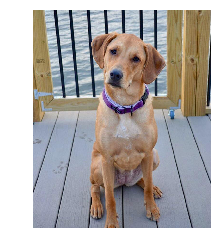

In [80]:
make_prediction_xception('images/chelsea.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Dalmatian.


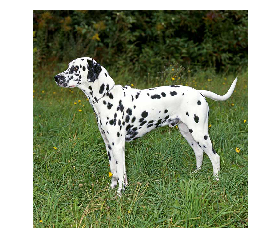

In [81]:
make_prediction_xception('images/dal.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Welsh springer spaniel.


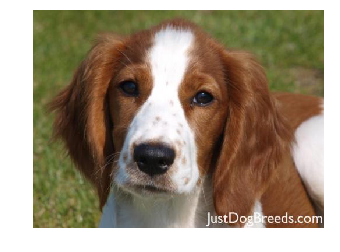

In [82]:
make_prediction_xception('images/Welsh_springer_spaniel_08203.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Affenpinscher.


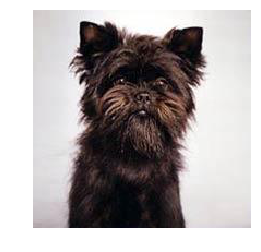

In [83]:
make_prediction_xception('images/n02110627_7013.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Old english sheepdog.


Top 5 predictions (for mixed breeds)
Predicted breed: Old english sheepdog with a confidence of 0.7924
Predicted breed: Bearded collie with a confidence of 0.0762
Predicted breed: Glen of imaal terrier with a confidence of 0.0257
Predicted breed: Havanese with a confidence of 0.0221
Predicted breed: Briard with a confidence of 0.0191


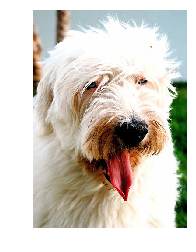

In [84]:
make_prediction_xception('images/n02105641_534.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: English springer spaniel.


Top 5 predictions (for mixed breeds)
Predicted breed: English springer spaniel with a confidence of 0.9448
Predicted breed: Brittany with a confidence of 0.0380
Predicted breed: German wirehaired pointer with a confidence of 0.0087
Predicted breed: Boykin spaniel with a confidence of 0.0015
Predicted breed: Welsh springer spaniel with a confidence of 0.0010


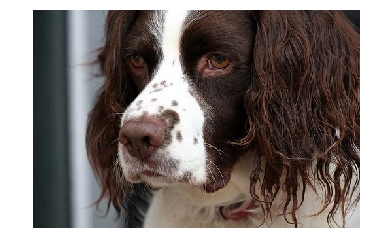

In [85]:
make_prediction_xception('images/n02102040_1055.jpg',multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Lhasa apso.


Top 5 predictions (for mixed breeds)
Predicted breed: Lhasa apso with a confidence of 0.3128
Predicted breed: Havanese with a confidence of 0.2721
Predicted breed: Maltese with a confidence of 0.2645
Predicted breed: Bichon frise with a confidence of 0.0789
Predicted breed: Lowchen with a confidence of 0.0510


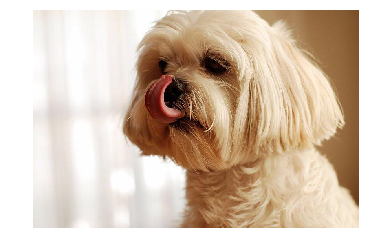

In [86]:
make_prediction_xception('images/n02098413_178.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Cavalier king charles spaniel.


Top 5 predictions (for mixed breeds)
Predicted breed: Cavalier king charles spaniel with a confidence of 0.9911
Predicted breed: English toy spaniel with a confidence of 0.0068
Predicted breed: Japanese chin with a confidence of 0.0010
Predicted breed: Cocker spaniel with a confidence of 0.0007
Predicted breed: Papillon with a confidence of 0.0001


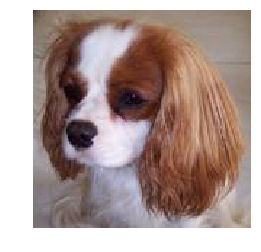

In [87]:
make_prediction_xception('images/n02086646_23.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Dachshund.


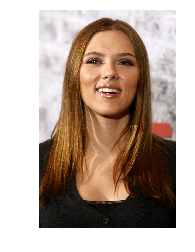

In [88]:
make_prediction_xception('images/scarlet.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Glen of imaal terrier.


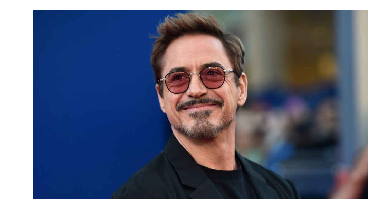

In [89]:
make_prediction_xception('images/robert.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


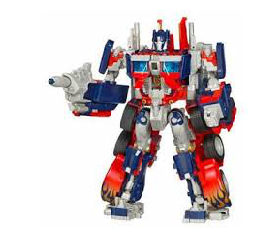

In [90]:
make_prediction_xception('images/optimus.jpg')

-------------------------------------

## Step 4.5: Using Inception_V3

The main hallmark of this architecture is the improved utilization of the computing resources inside the network. This was achieved by a carefully crafted design that allows for increasing the depth and width of the network while keeping the computational budget constant. This model consists of a network of 48 layers. 

<img style="border-width:0" src="http://joelouismarino.github.io/images/blog_images/blog_googlenet_keras/googlenet_components.png" />




In [91]:
from keras.applications.inception_v3 import InceptionV3

### Extracting bottleneck features

i.e Inception_V3 bottleneck features

In [92]:
bottleneck_features_InceptionV3 = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_InceptionV3 = bottleneck_features_InceptionV3['train']
valid_InceptionV3 = bottleneck_features_InceptionV3['valid']
test_InceptionV3 = bottleneck_features_InceptionV3['test']

dog_breeds = len(dog_names)

### Defining the Model Architecture

In [93]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

InceptionV3_model = Sequential()
InceptionV3_model.add(GlobalAveragePooling2D(input_shape=train_InceptionV3.shape[1:]))
InceptionV3_model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
InceptionV3_model.add(Dropout(0.4))
InceptionV3_model.add(Dense(dog_breeds, activation='softmax'))

InceptionV3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               307350    
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               20083     
Total params: 327,433
Trainable params: 327,433
Non-trainable params: 0
_________________________________________________________________



### Compiling the Model

In [94]:
from keras.optimizers import Adam, Adamax

InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

### Training the Model

In [95]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionV3.hdf5', verbose=1, save_best_only=True)

InceptionV3_model.fit(train_InceptionV3, train_targets, 
          validation_data=(valid_InceptionV3, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 1:10:05 - loss: 6.8339 - acc: 0.0000e+ - ETA: 17:26 - loss: 6.9381 - acc: 0.0125     - ETA: 9:55 - loss: 6.6935 - acc: 0.0286 - ETA: 6:54 - loss: 6.5330 - acc: 0.040 - ETA: 5:17 - loss: 6.4421 - acc: 0.042 - ETA: 4:16 - loss: 6.3741 - acc: 0.040 - ETA: 3:34 - loss: 6.2924 - acc: 0.039 - ETA: 3:04 - loss: 6.2309 - acc: 0.043 - ETA: 2:41 - loss: 6.1683 - acc: 0.052 - ETA: 2:23 - loss: 6.1112 - acc: 0.058 - ETA: 2:08 - loss: 6.0846 - acc: 0.061 - ETA: 1:56 - loss: 6.0454 - acc: 0.066 - ETA: 1:46 - loss: 6.0146 - acc: 0.070 - ETA: 1:38 - loss: 5.9866 - acc: 0.070 - ETA: 1:30 - loss: 5.9465 - acc: 0.074 - ETA: 1:24 - loss: 5.9039 - acc: 0.084 - ETA: 1:18 - loss: 5.8833 - acc: 0.085 - ETA: 1:13 - loss: 5.8511 - acc: 0.094 - ETA: 1:09 - loss: 5.8035 - acc: 0.103 - ETA: 1:05 - loss: 5.7771 - acc: 0.106 - ETA: 1:01 - loss: 5.7513 - acc: 0.106 - ETA: 58s - loss: 5.7050 - acc: 0.115 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 2.0498 - acc: 0.550 - ETA: 5s - loss: 1.7331 - acc: 0.662 - ETA: 5s - loss: 1.6777 - acc: 0.692 - ETA: 5s - loss: 1.6932 - acc: 0.710 - ETA: 5s - loss: 1.6906 - acc: 0.715 - ETA: 5s - loss: 1.6355 - acc: 0.731 - ETA: 5s - loss: 1.6086 - acc: 0.739 - ETA: 5s - loss: 1.6236 - acc: 0.736 - ETA: 5s - loss: 1.6188 - acc: 0.740 - ETA: 5s - loss: 1.5951 - acc: 0.746 - ETA: 5s - loss: 1.5845 - acc: 0.748 - ETA: 5s - loss: 1.5813 - acc: 0.750 - ETA: 5s - loss: 1.5970 - acc: 0.743 - ETA: 5s - loss: 1.5978 - acc: 0.745 - ETA: 5s - loss: 1.5961 - acc: 0.746 - ETA: 5s - loss: 1.5946 - acc: 0.748 - ETA: 5s - loss: 1.5918 - acc: 0.749 - ETA: 5s - loss: 1.5993 - acc: 0.748 - ETA: 5s - loss: 1.5868 - acc: 0.755 - ETA: 5s - loss: 1.6024 - acc: 0.750 - ETA: 4s - loss: 1.6026 - acc: 0.750 - ETA: 4s - loss: 1.6013 - acc: 0.750 - ETA: 4s - loss: 1.6062 - acc: 0.750 - ETA: 4s - loss: 1.6095 - acc: 0.749 - ETA: 4s - loss: 1.6035 - acc: 0.750 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.9099 - acc: 0.850 - ETA: 5s - loss: 1.1924 - acc: 0.787 - ETA: 5s - loss: 1.3243 - acc: 0.785 - ETA: 5s - loss: 1.4038 - acc: 0.770 - ETA: 5s - loss: 1.4023 - acc: 0.750 - ETA: 5s - loss: 1.3507 - acc: 0.762 - ETA: 5s - loss: 1.3121 - acc: 0.778 - ETA: 5s - loss: 1.2977 - acc: 0.772 - ETA: 5s - loss: 1.2853 - acc: 0.780 - ETA: 5s - loss: 1.2704 - acc: 0.789 - ETA: 5s - loss: 1.2530 - acc: 0.793 - ETA: 5s - loss: 1.2369 - acc: 0.797 - ETA: 5s - loss: 1.2400 - acc: 0.800 - ETA: 5s - loss: 1.2482 - acc: 0.793 - ETA: 5s - loss: 1.2400 - acc: 0.800 - ETA: 5s - loss: 1.2267 - acc: 0.805 - ETA: 5s - loss: 1.2104 - acc: 0.808 - ETA: 4s - loss: 1.2081 - acc: 0.803 - ETA: 4s - loss: 1.2166 - acc: 0.802 - ETA: 4s - loss: 1.2076 - acc: 0.805 - ETA: 4s - loss: 1.2190 - acc: 0.802 - ETA: 4s - loss: 1.2241 - acc: 0.803 - ETA: 4s - loss: 1.2371 - acc: 0.797 - ETA: 4s - loss: 1.2348 - acc: 0.797 - ETA: 4s - loss: 1.2324 - acc: 0.798 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.6301 - acc: 0.950 - ETA: 5s - loss: 0.9987 - acc: 0.825 - ETA: 5s - loss: 1.1144 - acc: 0.785 - ETA: 5s - loss: 1.0473 - acc: 0.795 - ETA: 5s - loss: 1.0532 - acc: 0.800 - ETA: 5s - loss: 1.0667 - acc: 0.803 - ETA: 5s - loss: 1.0364 - acc: 0.815 - ETA: 5s - loss: 1.0264 - acc: 0.815 - ETA: 5s - loss: 1.0217 - acc: 0.814 - ETA: 5s - loss: 0.9998 - acc: 0.816 - ETA: 5s - loss: 0.9951 - acc: 0.816 - ETA: 5s - loss: 0.9807 - acc: 0.822 - ETA: 5s - loss: 0.9947 - acc: 0.817 - ETA: 5s - loss: 0.9916 - acc: 0.820 - ETA: 5s - loss: 0.9908 - acc: 0.821 - ETA: 5s - loss: 0.9831 - acc: 0.825 - ETA: 4s - loss: 0.9884 - acc: 0.825 - ETA: 4s - loss: 0.9966 - acc: 0.824 - ETA: 4s - loss: 0.9954 - acc: 0.821 - ETA: 4s - loss: 0.9921 - acc: 0.821 - ETA: 4s - loss: 0.9879 - acc: 0.824 - ETA: 4s - loss: 0.9935 - acc: 0.822 - ETA: 4s - loss: 0.9940 - acc: 0.822 - ETA: 4s - loss: 0.9860 - acc: 0.824 - ETA: 4s - loss: 0.9863 - acc: 0.823 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 1.2352 - acc: 0.800 - ETA: 5s - loss: 1.0908 - acc: 0.787 - ETA: 5s - loss: 0.9318 - acc: 0.857 - ETA: 5s - loss: 0.9512 - acc: 0.845 - ETA: 5s - loss: 0.9714 - acc: 0.834 - ETA: 5s - loss: 0.9642 - acc: 0.834 - ETA: 5s - loss: 0.9577 - acc: 0.839 - ETA: 5s - loss: 0.9726 - acc: 0.840 - ETA: 5s - loss: 0.9748 - acc: 0.846 - ETA: 5s - loss: 0.9435 - acc: 0.857 - ETA: 5s - loss: 0.9635 - acc: 0.848 - ETA: 5s - loss: 0.9502 - acc: 0.854 - ETA: 5s - loss: 0.9521 - acc: 0.848 - ETA: 5s - loss: 0.9432 - acc: 0.851 - ETA: 5s - loss: 0.9323 - acc: 0.853 - ETA: 5s - loss: 0.9527 - acc: 0.847 - ETA: 5s - loss: 0.9548 - acc: 0.844 - ETA: 5s - loss: 0.9443 - acc: 0.844 - ETA: 5s - loss: 0.9520 - acc: 0.837 - ETA: 4s - loss: 0.9520 - acc: 0.835 - ETA: 4s - loss: 0.9512 - acc: 0.833 - ETA: 4s - loss: 0.9569 - acc: 0.829 - ETA: 4s - loss: 0.9554 - acc: 0.829 - ETA: 4s - loss: 0.9486 - acc: 0.831 - ETA: 4s - loss: 0.9525 - acc: 0.829 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.5653 - acc: 0.950 - ETA: 6s - loss: 0.8985 - acc: 0.850 - ETA: 6s - loss: 0.9089 - acc: 0.871 - ETA: 5s - loss: 0.8386 - acc: 0.870 - ETA: 5s - loss: 0.8348 - acc: 0.873 - ETA: 5s - loss: 0.8531 - acc: 0.862 - ETA: 5s - loss: 0.8761 - acc: 0.855 - ETA: 5s - loss: 0.8572 - acc: 0.861 - ETA: 5s - loss: 0.8599 - acc: 0.858 - ETA: 5s - loss: 0.8484 - acc: 0.864 - ETA: 5s - loss: 0.8609 - acc: 0.856 - ETA: 5s - loss: 0.8728 - acc: 0.852 - ETA: 5s - loss: 0.8762 - acc: 0.850 - ETA: 5s - loss: 0.8781 - acc: 0.842 - ETA: 5s - loss: 0.8895 - acc: 0.840 - ETA: 5s - loss: 0.8867 - acc: 0.841 - ETA: 5s - loss: 0.8824 - acc: 0.843 - ETA: 5s - loss: 0.8887 - acc: 0.841 - ETA: 4s - loss: 0.8969 - acc: 0.837 - ETA: 4s - loss: 0.8978 - acc: 0.834 - ETA: 4s - loss: 0.8916 - acc: 0.836 - ETA: 4s - loss: 0.8960 - acc: 0.836 - ETA: 4s - loss: 0.9039 - acc: 0.830 - ETA: 4s - loss: 0.9058 - acc: 0.829 - ETA: 4s - loss: 0.9127 - acc: 0.829 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 1.0614 - acc: 0.750 - ETA: 5s - loss: 0.9386 - acc: 0.825 - ETA: 5s - loss: 0.8694 - acc: 0.850 - ETA: 5s - loss: 0.8616 - acc: 0.845 - ETA: 5s - loss: 0.8761 - acc: 0.846 - ETA: 5s - loss: 0.8743 - acc: 0.846 - ETA: 5s - loss: 0.8581 - acc: 0.850 - ETA: 5s - loss: 0.8586 - acc: 0.850 - ETA: 5s - loss: 0.8572 - acc: 0.842 - ETA: 5s - loss: 0.8358 - acc: 0.844 - ETA: 5s - loss: 0.8231 - acc: 0.848 - ETA: 5s - loss: 0.8340 - acc: 0.841 - ETA: 5s - loss: 0.8247 - acc: 0.844 - ETA: 5s - loss: 0.8326 - acc: 0.841 - ETA: 5s - loss: 0.8372 - acc: 0.841 - ETA: 5s - loss: 0.8376 - acc: 0.840 - ETA: 5s - loss: 0.8422 - acc: 0.838 - ETA: 5s - loss: 0.8356 - acc: 0.843 - ETA: 5s - loss: 0.8426 - acc: 0.841 - ETA: 4s - loss: 0.8389 - acc: 0.844 - ETA: 4s - loss: 0.8274 - acc: 0.849 - ETA: 4s - loss: 0.8239 - acc: 0.850 - ETA: 4s - loss: 0.8165 - acc: 0.854 - ETA: 4s - loss: 0.8265 - acc: 0.851 - ETA: 4s - loss: 0.8212 - acc: 0.856 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 1.0649 - acc: 0.850 - ETA: 5s - loss: 0.7611 - acc: 0.887 - ETA: 5s - loss: 0.7038 - acc: 0.885 - ETA: 5s - loss: 0.7263 - acc: 0.880 - ETA: 5s - loss: 0.7491 - acc: 0.876 - ETA: 5s - loss: 0.7613 - acc: 0.875 - ETA: 5s - loss: 0.7427 - acc: 0.876 - ETA: 5s - loss: 0.7537 - acc: 0.871 - ETA: 5s - loss: 0.8083 - acc: 0.855 - ETA: 5s - loss: 0.8040 - acc: 0.853 - ETA: 5s - loss: 0.7974 - acc: 0.857 - ETA: 5s - loss: 0.8091 - acc: 0.856 - ETA: 5s - loss: 0.8021 - acc: 0.856 - ETA: 5s - loss: 0.8090 - acc: 0.855 - ETA: 4s - loss: 0.8058 - acc: 0.856 - ETA: 4s - loss: 0.8034 - acc: 0.857 - ETA: 4s - loss: 0.8014 - acc: 0.857 - ETA: 4s - loss: 0.7925 - acc: 0.861 - ETA: 4s - loss: 0.7825 - acc: 0.866 - ETA: 4s - loss: 0.7723 - acc: 0.869 - ETA: 4s - loss: 0.7788 - acc: 0.865 - ETA: 4s - loss: 0.7749 - acc: 0.867 - ETA: 4s - loss: 0.7758 - acc: 0.867 - ETA: 4s - loss: 0.7738 - acc: 0.867 - ETA: 4s - loss: 0.7733 - acc: 0.868 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8089 - acc: 0.900 - ETA: 6s - loss: 0.7421 - acc: 0.900 - ETA: 5s - loss: 0.7233 - acc: 0.900 - ETA: 5s - loss: 0.7319 - acc: 0.900 - ETA: 5s - loss: 0.7292 - acc: 0.892 - ETA: 5s - loss: 0.7199 - acc: 0.896 - ETA: 5s - loss: 0.7363 - acc: 0.889 - ETA: 5s - loss: 0.7506 - acc: 0.884 - ETA: 5s - loss: 0.7792 - acc: 0.878 - ETA: 5s - loss: 0.7636 - acc: 0.880 - ETA: 5s - loss: 0.7566 - acc: 0.880 - ETA: 5s - loss: 0.7768 - acc: 0.872 - ETA: 5s - loss: 0.7910 - acc: 0.867 - ETA: 5s - loss: 0.7854 - acc: 0.867 - ETA: 5s - loss: 0.7817 - acc: 0.869 - ETA: 5s - loss: 0.7734 - acc: 0.872 - ETA: 5s - loss: 0.7857 - acc: 0.869 - ETA: 5s - loss: 0.7861 - acc: 0.869 - ETA: 5s - loss: 0.7840 - acc: 0.868 - ETA: 4s - loss: 0.7816 - acc: 0.869 - ETA: 4s - loss: 0.7768 - acc: 0.871 - ETA: 4s - loss: 0.7742 - acc: 0.870 - ETA: 4s - loss: 0.7737 - acc: 0.869 - ETA: 4s - loss: 0.7701 - acc: 0.872 - ETA: 4s - loss: 0.7672 - acc: 0.873 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7092 - acc: 0.850 - ETA: 5s - loss: 0.7061 - acc: 0.875 - ETA: 5s - loss: 0.7739 - acc: 0.864 - ETA: 5s - loss: 0.7800 - acc: 0.850 - ETA: 5s - loss: 0.7285 - acc: 0.873 - ETA: 5s - loss: 0.7477 - acc: 0.862 - ETA: 5s - loss: 0.7626 - acc: 0.855 - ETA: 5s - loss: 0.7325 - acc: 0.872 - ETA: 5s - loss: 0.7470 - acc: 0.868 - ETA: 5s - loss: 0.7416 - acc: 0.875 - ETA: 5s - loss: 0.7478 - acc: 0.872 - ETA: 5s - loss: 0.7530 - acc: 0.873 - ETA: 5s - loss: 0.7548 - acc: 0.872 - ETA: 5s - loss: 0.7493 - acc: 0.874 - ETA: 5s - loss: 0.7449 - acc: 0.875 - ETA: 5s - loss: 0.7410 - acc: 0.877 - ETA: 4s - loss: 0.7287 - acc: 0.881 - ETA: 4s - loss: 0.7359 - acc: 0.877 - ETA: 4s - loss: 0.7505 - acc: 0.872 - ETA: 4s - loss: 0.7479 - acc: 0.872 - ETA: 4s - loss: 0.7501 - acc: 0.871 - ETA: 4s - loss: 0.7478 - acc: 0.873 - ETA: 4s - loss: 0.7435 - acc: 0.876 - ETA: 4s - loss: 0.7420 - acc: 0.876 - ETA: 4s - loss: 0.7372 - acc: 0.877 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8204 - acc: 0.900 - ETA: 6s - loss: 0.6815 - acc: 0.887 - ETA: 6s - loss: 0.7435 - acc: 0.878 - ETA: 6s - loss: 0.7371 - acc: 0.880 - ETA: 5s - loss: 0.7425 - acc: 0.880 - ETA: 5s - loss: 0.7405 - acc: 0.881 - ETA: 5s - loss: 0.7287 - acc: 0.881 - ETA: 5s - loss: 0.7346 - acc: 0.879 - ETA: 5s - loss: 0.7349 - acc: 0.876 - ETA: 5s - loss: 0.7537 - acc: 0.869 - ETA: 5s - loss: 0.7519 - acc: 0.864 - ETA: 5s - loss: 0.7431 - acc: 0.869 - ETA: 5s - loss: 0.7624 - acc: 0.863 - ETA: 5s - loss: 0.7590 - acc: 0.867 - ETA: 5s - loss: 0.7498 - acc: 0.868 - ETA: 5s - loss: 0.7507 - acc: 0.869 - ETA: 5s - loss: 0.7459 - acc: 0.870 - ETA: 5s - loss: 0.7529 - acc: 0.868 - ETA: 5s - loss: 0.7549 - acc: 0.867 - ETA: 4s - loss: 0.7605 - acc: 0.866 - ETA: 4s - loss: 0.7586 - acc: 0.868 - ETA: 4s - loss: 0.7493 - acc: 0.872 - ETA: 4s - loss: 0.7516 - acc: 0.871 - ETA: 4s - loss: 0.7466 - acc: 0.872 - ETA: 4s - loss: 0.7450 - acc: 0.873 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7290 - acc: 0.850 - ETA: 5s - loss: 0.7652 - acc: 0.850 - ETA: 5s - loss: 0.6973 - acc: 0.871 - ETA: 5s - loss: 0.6861 - acc: 0.880 - ETA: 5s - loss: 0.6759 - acc: 0.884 - ETA: 5s - loss: 0.6530 - acc: 0.896 - ETA: 5s - loss: 0.6426 - acc: 0.897 - ETA: 5s - loss: 0.6419 - acc: 0.897 - ETA: 5s - loss: 0.6534 - acc: 0.890 - ETA: 5s - loss: 0.6359 - acc: 0.900 - ETA: 5s - loss: 0.6426 - acc: 0.898 - ETA: 5s - loss: 0.6434 - acc: 0.897 - ETA: 5s - loss: 0.6347 - acc: 0.902 - ETA: 5s - loss: 0.6432 - acc: 0.897 - ETA: 5s - loss: 0.6491 - acc: 0.893 - ETA: 5s - loss: 0.6596 - acc: 0.889 - ETA: 5s - loss: 0.6713 - acc: 0.882 - ETA: 5s - loss: 0.6740 - acc: 0.881 - ETA: 5s - loss: 0.6720 - acc: 0.882 - ETA: 4s - loss: 0.6759 - acc: 0.883 - ETA: 4s - loss: 0.6786 - acc: 0.882 - ETA: 4s - loss: 0.6799 - acc: 0.882 - ETA: 4s - loss: 0.6788 - acc: 0.882 - ETA: 4s - loss: 0.6773 - acc: 0.882 - ETA: 4s - loss: 0.6753 - acc: 0.884 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6622 - acc: 0.850 - ETA: 6s - loss: 0.7135 - acc: 0.862 - ETA: 5s - loss: 0.6800 - acc: 0.878 - ETA: 5s - loss: 0.6645 - acc: 0.885 - ETA: 5s - loss: 0.6322 - acc: 0.892 - ETA: 5s - loss: 0.6734 - acc: 0.878 - ETA: 5s - loss: 0.6800 - acc: 0.873 - ETA: 5s - loss: 0.6771 - acc: 0.879 - ETA: 5s - loss: 0.6903 - acc: 0.882 - ETA: 5s - loss: 0.6905 - acc: 0.875 - ETA: 5s - loss: 0.6920 - acc: 0.875 - ETA: 5s - loss: 0.6847 - acc: 0.877 - ETA: 5s - loss: 0.6876 - acc: 0.877 - ETA: 5s - loss: 0.6884 - acc: 0.878 - ETA: 5s - loss: 0.6976 - acc: 0.877 - ETA: 5s - loss: 0.6934 - acc: 0.881 - ETA: 5s - loss: 0.6974 - acc: 0.880 - ETA: 5s - loss: 0.6973 - acc: 0.879 - ETA: 5s - loss: 0.6975 - acc: 0.879 - ETA: 5s - loss: 0.7048 - acc: 0.877 - ETA: 5s - loss: 0.7011 - acc: 0.880 - ETA: 5s - loss: 0.6971 - acc: 0.878 - ETA: 4s - loss: 0.7014 - acc: 0.877 - ETA: 4s - loss: 0.7108 - acc: 0.874 - ETA: 4s - loss: 0.7048 - acc: 0.876 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7357 - acc: 0.800 - ETA: 6s - loss: 0.6562 - acc: 0.850 - ETA: 5s - loss: 0.7106 - acc: 0.842 - ETA: 5s - loss: 0.7171 - acc: 0.855 - ETA: 5s - loss: 0.7422 - acc: 0.850 - ETA: 5s - loss: 0.7325 - acc: 0.843 - ETA: 5s - loss: 0.7471 - acc: 0.842 - ETA: 5s - loss: 0.7317 - acc: 0.850 - ETA: 5s - loss: 0.7540 - acc: 0.840 - ETA: 5s - loss: 0.7530 - acc: 0.842 - ETA: 5s - loss: 0.7403 - acc: 0.846 - ETA: 5s - loss: 0.7373 - acc: 0.850 - ETA: 5s - loss: 0.7338 - acc: 0.855 - ETA: 5s - loss: 0.7279 - acc: 0.855 - ETA: 5s - loss: 0.7264 - acc: 0.855 - ETA: 5s - loss: 0.7244 - acc: 0.858 - ETA: 5s - loss: 0.7232 - acc: 0.858 - ETA: 5s - loss: 0.7205 - acc: 0.861 - ETA: 5s - loss: 0.7296 - acc: 0.860 - ETA: 4s - loss: 0.7299 - acc: 0.858 - ETA: 4s - loss: 0.7258 - acc: 0.858 - ETA: 4s - loss: 0.7272 - acc: 0.857 - ETA: 4s - loss: 0.7234 - acc: 0.859 - ETA: 4s - loss: 0.7226 - acc: 0.858 - ETA: 4s - loss: 0.7267 - acc: 0.856 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.4424 - acc: 1.000 - ETA: 5s - loss: 0.5549 - acc: 0.937 - ETA: 5s - loss: 0.6086 - acc: 0.914 - ETA: 5s - loss: 0.6110 - acc: 0.910 - ETA: 5s - loss: 0.5893 - acc: 0.915 - ETA: 5s - loss: 0.6143 - acc: 0.909 - ETA: 5s - loss: 0.6282 - acc: 0.902 - ETA: 5s - loss: 0.6279 - acc: 0.904 - ETA: 5s - loss: 0.6267 - acc: 0.908 - ETA: 5s - loss: 0.6192 - acc: 0.910 - ETA: 5s - loss: 0.6179 - acc: 0.914 - ETA: 5s - loss: 0.6217 - acc: 0.911 - ETA: 5s - loss: 0.6376 - acc: 0.906 - ETA: 5s - loss: 0.6424 - acc: 0.906 - ETA: 4s - loss: 0.6330 - acc: 0.907 - ETA: 4s - loss: 0.6301 - acc: 0.909 - ETA: 4s - loss: 0.6338 - acc: 0.907 - ETA: 4s - loss: 0.6405 - acc: 0.906 - ETA: 4s - loss: 0.6439 - acc: 0.904 - ETA: 4s - loss: 0.6471 - acc: 0.902 - ETA: 4s - loss: 0.6409 - acc: 0.903 - ETA: 4s - loss: 0.6411 - acc: 0.903 - ETA: 4s - loss: 0.6449 - acc: 0.902 - ETA: 4s - loss: 0.6495 - acc: 0.900 - ETA: 4s - loss: 0.6443 - acc: 0.901 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6424 - acc: 0.900 - ETA: 5s - loss: 0.6730 - acc: 0.912 - ETA: 5s - loss: 0.6841 - acc: 0.871 - ETA: 5s - loss: 0.6852 - acc: 0.880 - ETA: 5s - loss: 0.6660 - acc: 0.896 - ETA: 5s - loss: 0.6517 - acc: 0.890 - ETA: 5s - loss: 0.6622 - acc: 0.886 - ETA: 5s - loss: 0.6443 - acc: 0.893 - ETA: 5s - loss: 0.6554 - acc: 0.890 - ETA: 5s - loss: 0.6729 - acc: 0.885 - ETA: 5s - loss: 0.6798 - acc: 0.882 - ETA: 5s - loss: 0.6934 - acc: 0.879 - ETA: 5s - loss: 0.6867 - acc: 0.882 - ETA: 5s - loss: 0.6738 - acc: 0.885 - ETA: 5s - loss: 0.6793 - acc: 0.882 - ETA: 5s - loss: 0.6755 - acc: 0.883 - ETA: 5s - loss: 0.6766 - acc: 0.882 - ETA: 5s - loss: 0.6718 - acc: 0.886 - ETA: 4s - loss: 0.6720 - acc: 0.886 - ETA: 4s - loss: 0.6758 - acc: 0.884 - ETA: 4s - loss: 0.6733 - acc: 0.886 - ETA: 4s - loss: 0.6716 - acc: 0.886 - ETA: 4s - loss: 0.6702 - acc: 0.887 - ETA: 4s - loss: 0.6743 - acc: 0.886 - ETA: 4s - loss: 0.6692 - acc: 0.887 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7594 - acc: 0.900 - ETA: 6s - loss: 0.5791 - acc: 0.937 - ETA: 6s - loss: 0.6411 - acc: 0.921 - ETA: 6s - loss: 0.6357 - acc: 0.905 - ETA: 5s - loss: 0.6188 - acc: 0.900 - ETA: 5s - loss: 0.6062 - acc: 0.906 - ETA: 5s - loss: 0.6016 - acc: 0.907 - ETA: 5s - loss: 0.6175 - acc: 0.904 - ETA: 5s - loss: 0.6097 - acc: 0.904 - ETA: 5s - loss: 0.6031 - acc: 0.908 - ETA: 5s - loss: 0.6048 - acc: 0.906 - ETA: 5s - loss: 0.6183 - acc: 0.904 - ETA: 5s - loss: 0.6237 - acc: 0.902 - ETA: 5s - loss: 0.6196 - acc: 0.905 - ETA: 5s - loss: 0.6226 - acc: 0.903 - ETA: 5s - loss: 0.6167 - acc: 0.905 - ETA: 5s - loss: 0.6199 - acc: 0.904 - ETA: 5s - loss: 0.6208 - acc: 0.901 - ETA: 5s - loss: 0.6343 - acc: 0.897 - ETA: 5s - loss: 0.6388 - acc: 0.894 - ETA: 5s - loss: 0.6449 - acc: 0.892 - ETA: 4s - loss: 0.6475 - acc: 0.891 - ETA: 4s - loss: 0.6548 - acc: 0.888 - ETA: 4s - loss: 0.6527 - acc: 0.888 - ETA: 4s - loss: 0.6562 - acc: 0.888 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6247 - acc: 0.900 - ETA: 5s - loss: 0.6130 - acc: 0.887 - ETA: 5s - loss: 0.6368 - acc: 0.871 - ETA: 5s - loss: 0.6397 - acc: 0.880 - ETA: 5s - loss: 0.6148 - acc: 0.888 - ETA: 5s - loss: 0.5996 - acc: 0.893 - ETA: 5s - loss: 0.5993 - acc: 0.897 - ETA: 5s - loss: 0.6085 - acc: 0.893 - ETA: 5s - loss: 0.6174 - acc: 0.888 - ETA: 5s - loss: 0.6188 - acc: 0.891 - ETA: 5s - loss: 0.6193 - acc: 0.892 - ETA: 5s - loss: 0.6237 - acc: 0.891 - ETA: 5s - loss: 0.6256 - acc: 0.892 - ETA: 5s - loss: 0.6251 - acc: 0.892 - ETA: 5s - loss: 0.6312 - acc: 0.889 - ETA: 4s - loss: 0.6422 - acc: 0.887 - ETA: 4s - loss: 0.6365 - acc: 0.888 - ETA: 4s - loss: 0.6401 - acc: 0.885 - ETA: 4s - loss: 0.6388 - acc: 0.885 - ETA: 4s - loss: 0.6388 - acc: 0.885 - ETA: 4s - loss: 0.6354 - acc: 0.889 - ETA: 4s - loss: 0.6358 - acc: 0.890 - ETA: 4s - loss: 0.6401 - acc: 0.890 - ETA: 4s - loss: 0.6375 - acc: 0.893 - ETA: 4s - loss: 0.6365 - acc: 0.893 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4303 - acc: 0.950 - ETA: 5s - loss: 0.5065 - acc: 0.912 - ETA: 5s - loss: 0.5621 - acc: 0.885 - ETA: 5s - loss: 0.5676 - acc: 0.900 - ETA: 5s - loss: 0.5696 - acc: 0.903 - ETA: 5s - loss: 0.5510 - acc: 0.918 - ETA: 5s - loss: 0.5798 - acc: 0.902 - ETA: 5s - loss: 0.5941 - acc: 0.895 - ETA: 5s - loss: 0.5982 - acc: 0.892 - ETA: 5s - loss: 0.5875 - acc: 0.896 - ETA: 5s - loss: 0.5919 - acc: 0.893 - ETA: 5s - loss: 0.5879 - acc: 0.893 - ETA: 5s - loss: 0.5812 - acc: 0.894 - ETA: 5s - loss: 0.5998 - acc: 0.890 - ETA: 5s - loss: 0.6088 - acc: 0.882 - ETA: 4s - loss: 0.6031 - acc: 0.885 - ETA: 4s - loss: 0.6064 - acc: 0.883 - ETA: 4s - loss: 0.6137 - acc: 0.882 - ETA: 4s - loss: 0.6151 - acc: 0.883 - ETA: 4s - loss: 0.6184 - acc: 0.880 - ETA: 4s - loss: 0.6171 - acc: 0.881 - ETA: 4s - loss: 0.6227 - acc: 0.881 - ETA: 4s - loss: 0.6264 - acc: 0.880 - ETA: 4s - loss: 0.6274 - acc: 0.881 - ETA: 4s - loss: 0.6339 - acc: 0.881 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8455 - acc: 0.750 - ETA: 5s - loss: 0.7042 - acc: 0.837 - ETA: 5s - loss: 0.6242 - acc: 0.885 - ETA: 5s - loss: 0.6468 - acc: 0.885 - ETA: 5s - loss: 0.6355 - acc: 0.884 - ETA: 5s - loss: 0.6278 - acc: 0.893 - ETA: 5s - loss: 0.6462 - acc: 0.884 - ETA: 5s - loss: 0.6491 - acc: 0.886 - ETA: 5s - loss: 0.6519 - acc: 0.880 - ETA: 5s - loss: 0.6589 - acc: 0.880 - ETA: 5s - loss: 0.6398 - acc: 0.888 - ETA: 5s - loss: 0.6346 - acc: 0.892 - ETA: 5s - loss: 0.6296 - acc: 0.890 - ETA: 5s - loss: 0.6361 - acc: 0.887 - ETA: 5s - loss: 0.6422 - acc: 0.881 - ETA: 5s - loss: 0.6313 - acc: 0.887 - ETA: 5s - loss: 0.6328 - acc: 0.886 - ETA: 5s - loss: 0.6309 - acc: 0.887 - ETA: 5s - loss: 0.6299 - acc: 0.890 - ETA: 4s - loss: 0.6238 - acc: 0.892 - ETA: 4s - loss: 0.6259 - acc: 0.891 - ETA: 4s - loss: 0.6179 - acc: 0.896 - ETA: 4s - loss: 0.6250 - acc: 0.892 - ETA: 4s - loss: 0.6230 - acc: 0.892 - ETA: 4s - loss: 0.6225 - acc: 0.893 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.6377 - acc: 0.900 - ETA: 6s - loss: 0.6076 - acc: 0.900 - ETA: 6s - loss: 0.5945 - acc: 0.907 - ETA: 5s - loss: 0.5614 - acc: 0.910 - ETA: 5s - loss: 0.5489 - acc: 0.911 - ETA: 5s - loss: 0.5586 - acc: 0.906 - ETA: 5s - loss: 0.5429 - acc: 0.905 - ETA: 6s - loss: 0.5541 - acc: 0.907 - ETA: 5s - loss: 0.5600 - acc: 0.906 - ETA: 5s - loss: 0.5595 - acc: 0.905 - ETA: 5s - loss: 0.5582 - acc: 0.906 - ETA: 5s - loss: 0.5608 - acc: 0.906 - ETA: 5s - loss: 0.5684 - acc: 0.901 - ETA: 5s - loss: 0.5720 - acc: 0.901 - ETA: 5s - loss: 0.5747 - acc: 0.900 - ETA: 5s - loss: 0.5671 - acc: 0.902 - ETA: 5s - loss: 0.5727 - acc: 0.899 - ETA: 5s - loss: 0.5769 - acc: 0.897 - ETA: 5s - loss: 0.5731 - acc: 0.900 - ETA: 5s - loss: 0.5767 - acc: 0.900 - ETA: 5s - loss: 0.5778 - acc: 0.897 - ETA: 5s - loss: 0.5842 - acc: 0.895 - ETA: 4s - loss: 0.5851 - acc: 0.894 - ETA: 4s - loss: 0.5868 - acc: 0.894 - ETA: 4s - loss: 0.5933 - acc: 0.894 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4178 - acc: 1.000 - ETA: 6s - loss: 0.4717 - acc: 0.975 - ETA: 6s - loss: 0.5510 - acc: 0.935 - ETA: 6s - loss: 0.5670 - acc: 0.925 - ETA: 5s - loss: 0.5548 - acc: 0.923 - ETA: 5s - loss: 0.5569 - acc: 0.926 - ETA: 5s - loss: 0.5608 - acc: 0.920 - ETA: 5s - loss: 0.5611 - acc: 0.921 - ETA: 5s - loss: 0.5650 - acc: 0.919 - ETA: 5s - loss: 0.5769 - acc: 0.915 - ETA: 5s - loss: 0.5830 - acc: 0.914 - ETA: 5s - loss: 0.5740 - acc: 0.915 - ETA: 5s - loss: 0.5836 - acc: 0.910 - ETA: 5s - loss: 0.5878 - acc: 0.909 - ETA: 5s - loss: 0.5924 - acc: 0.906 - ETA: 5s - loss: 0.5997 - acc: 0.906 - ETA: 5s - loss: 0.6019 - acc: 0.904 - ETA: 5s - loss: 0.6047 - acc: 0.901 - ETA: 5s - loss: 0.6082 - acc: 0.900 - ETA: 4s - loss: 0.6144 - acc: 0.894 - ETA: 4s - loss: 0.6107 - acc: 0.895 - ETA: 4s - loss: 0.6103 - acc: 0.894 - ETA: 4s - loss: 0.6102 - acc: 0.894 - ETA: 4s - loss: 0.6105 - acc: 0.893 - ETA: 4s - loss: 0.6140 - acc: 0.891 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6845 - acc: 0.850 - ETA: 6s - loss: 0.6368 - acc: 0.887 - ETA: 6s - loss: 0.6742 - acc: 0.864 - ETA: 6s - loss: 0.6443 - acc: 0.885 - ETA: 5s - loss: 0.6378 - acc: 0.892 - ETA: 5s - loss: 0.6379 - acc: 0.893 - ETA: 5s - loss: 0.6084 - acc: 0.902 - ETA: 5s - loss: 0.6081 - acc: 0.904 - ETA: 5s - loss: 0.5950 - acc: 0.905 - ETA: 5s - loss: 0.5983 - acc: 0.901 - ETA: 5s - loss: 0.6027 - acc: 0.896 - ETA: 5s - loss: 0.5867 - acc: 0.901 - ETA: 5s - loss: 0.5868 - acc: 0.902 - ETA: 5s - loss: 0.5865 - acc: 0.901 - ETA: 5s - loss: 0.5887 - acc: 0.900 - ETA: 5s - loss: 0.5857 - acc: 0.902 - ETA: 5s - loss: 0.5902 - acc: 0.899 - ETA: 5s - loss: 0.5995 - acc: 0.893 - ETA: 5s - loss: 0.6052 - acc: 0.892 - ETA: 4s - loss: 0.6027 - acc: 0.893 - ETA: 4s - loss: 0.5973 - acc: 0.894 - ETA: 4s - loss: 0.5973 - acc: 0.895 - ETA: 4s - loss: 0.6030 - acc: 0.893 - ETA: 4s - loss: 0.6056 - acc: 0.891 - ETA: 4s - loss: 0.6101 - acc: 0.891 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6746 - acc: 0.900 - ETA: 5s - loss: 0.6867 - acc: 0.900 - ETA: 5s - loss: 0.6267 - acc: 0.892 - ETA: 5s - loss: 0.6168 - acc: 0.895 - ETA: 5s - loss: 0.5935 - acc: 0.907 - ETA: 5s - loss: 0.6017 - acc: 0.903 - ETA: 5s - loss: 0.6086 - acc: 0.900 - ETA: 5s - loss: 0.6006 - acc: 0.900 - ETA: 5s - loss: 0.5812 - acc: 0.907 - ETA: 5s - loss: 0.5833 - acc: 0.905 - ETA: 5s - loss: 0.5734 - acc: 0.907 - ETA: 5s - loss: 0.5683 - acc: 0.909 - ETA: 5s - loss: 0.5834 - acc: 0.906 - ETA: 5s - loss: 0.5857 - acc: 0.903 - ETA: 5s - loss: 0.5852 - acc: 0.902 - ETA: 4s - loss: 0.5842 - acc: 0.904 - ETA: 4s - loss: 0.5810 - acc: 0.905 - ETA: 4s - loss: 0.5767 - acc: 0.904 - ETA: 4s - loss: 0.5809 - acc: 0.902 - ETA: 4s - loss: 0.5885 - acc: 0.899 - ETA: 4s - loss: 0.5862 - acc: 0.899 - ETA: 4s - loss: 0.5811 - acc: 0.900 - ETA: 4s - loss: 0.5825 - acc: 0.899 - ETA: 4s - loss: 0.5782 - acc: 0.901 - ETA: 4s - loss: 0.5743 - acc: 0.902 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.9550 - acc: 0.850 - ETA: 5s - loss: 0.6730 - acc: 0.875 - ETA: 5s - loss: 0.6260 - acc: 0.914 - ETA: 5s - loss: 0.6040 - acc: 0.920 - ETA: 5s - loss: 0.6018 - acc: 0.919 - ETA: 5s - loss: 0.5871 - acc: 0.928 - ETA: 5s - loss: 0.5803 - acc: 0.923 - ETA: 5s - loss: 0.5733 - acc: 0.922 - ETA: 5s - loss: 0.5696 - acc: 0.924 - ETA: 5s - loss: 0.5603 - acc: 0.926 - ETA: 5s - loss: 0.5592 - acc: 0.925 - ETA: 5s - loss: 0.5654 - acc: 0.923 - ETA: 5s - loss: 0.5755 - acc: 0.918 - ETA: 5s - loss: 0.5662 - acc: 0.921 - ETA: 5s - loss: 0.5688 - acc: 0.919 - ETA: 5s - loss: 0.5668 - acc: 0.917 - ETA: 5s - loss: 0.5573 - acc: 0.920 - ETA: 5s - loss: 0.5516 - acc: 0.921 - ETA: 4s - loss: 0.5566 - acc: 0.920 - ETA: 4s - loss: 0.5614 - acc: 0.917 - ETA: 4s - loss: 0.5682 - acc: 0.913 - ETA: 4s - loss: 0.5758 - acc: 0.907 - ETA: 4s - loss: 0.5801 - acc: 0.904 - ETA: 4s - loss: 0.5783 - acc: 0.905 - ETA: 4s - loss: 0.5845 - acc: 0.902 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4814 - acc: 0.950 - ETA: 5s - loss: 0.5854 - acc: 0.887 - ETA: 5s - loss: 0.5433 - acc: 0.907 - ETA: 5s - loss: 0.5497 - acc: 0.910 - ETA: 5s - loss: 0.5608 - acc: 0.911 - ETA: 5s - loss: 0.5427 - acc: 0.908 - ETA: 5s - loss: 0.5637 - acc: 0.902 - ETA: 5s - loss: 0.5862 - acc: 0.888 - ETA: 5s - loss: 0.5918 - acc: 0.889 - ETA: 5s - loss: 0.5861 - acc: 0.892 - ETA: 5s - loss: 0.5861 - acc: 0.894 - ETA: 4s - loss: 0.5902 - acc: 0.894 - ETA: 4s - loss: 0.5818 - acc: 0.898 - ETA: 4s - loss: 0.5827 - acc: 0.897 - ETA: 4s - loss: 0.5828 - acc: 0.897 - ETA: 4s - loss: 0.5770 - acc: 0.901 - ETA: 4s - loss: 0.5757 - acc: 0.901 - ETA: 4s - loss: 0.5751 - acc: 0.900 - ETA: 4s - loss: 0.5786 - acc: 0.897 - ETA: 4s - loss: 0.5896 - acc: 0.893 - ETA: 4s - loss: 0.5861 - acc: 0.894 - ETA: 4s - loss: 0.5899 - acc: 0.893 - ETA: 4s - loss: 0.5868 - acc: 0.894 - ETA: 4s - loss: 0.5929 - acc: 0.892 - ETA: 4s - loss: 0.5949 - acc: 0.891 - ETA: 


Epoch 00052: val_loss improved from 0.74046 to 0.74012, saving model to saved_models/weights.best.InceptionV3.hdf5
Epoch 53/60
6680/6680 [==============================] - ETA: 5s - loss: 0.6991 - acc: 0.850 - ETA: 5s - loss: 0.5173 - acc: 0.912 - ETA: 5s - loss: 0.5829 - acc: 0.907 - ETA: 5s - loss: 0.6146 - acc: 0.890 - ETA: 5s - loss: 0.5856 - acc: 0.903 - ETA: 5s - loss: 0.5767 - acc: 0.907 - ETA: 5s - loss: 0.5814 - acc: 0.902 - ETA: 5s - loss: 0.5689 - acc: 0.905 - ETA: 5s - loss: 0.5751 - acc: 0.905 - ETA: 5s - loss: 0.5684 - acc: 0.907 - ETA: 5s - loss: 0.5877 - acc: 0.891 - ETA: 4s - loss: 0.5913 - acc: 0.891 - ETA: 4s - loss: 0.5880 - acc: 0.890 - ETA: 4s - loss: 0.5869 - acc: 0.891 - ETA: 4s - loss: 0.5867 - acc: 0.890 - ETA: 4s - loss: 0.5781 - acc: 0.893 - ETA: 4s - loss: 0.5845 - acc: 0.888 - ETA: 4s - loss: 0.5893 - acc: 0.887 - ETA: 4s - loss: 0.5887 - acc: 0.886 - ETA: 4s - loss: 0.5888 - acc: 0.886 - ETA: 4s - loss: 0.5954 - acc: 0.884 - ETA: 4s - loss: 0.5950 - acc:

6680/6680 [==============================] - ETA: 6s - loss: 0.5519 - acc: 0.900 - ETA: 5s - loss: 0.5453 - acc: 0.937 - ETA: 5s - loss: 0.5673 - acc: 0.892 - ETA: 5s - loss: 0.5875 - acc: 0.890 - ETA: 5s - loss: 0.5585 - acc: 0.896 - ETA: 5s - loss: 0.5946 - acc: 0.875 - ETA: 5s - loss: 0.5819 - acc: 0.881 - ETA: 5s - loss: 0.5676 - acc: 0.889 - ETA: 5s - loss: 0.5670 - acc: 0.888 - ETA: 5s - loss: 0.5693 - acc: 0.891 - ETA: 5s - loss: 0.5584 - acc: 0.896 - ETA: 5s - loss: 0.5591 - acc: 0.897 - ETA: 5s - loss: 0.5530 - acc: 0.898 - ETA: 5s - loss: 0.5522 - acc: 0.898 - ETA: 5s - loss: 0.5561 - acc: 0.897 - ETA: 5s - loss: 0.5645 - acc: 0.892 - ETA: 5s - loss: 0.5621 - acc: 0.894 - ETA: 4s - loss: 0.5576 - acc: 0.896 - ETA: 4s - loss: 0.5650 - acc: 0.894 - ETA: 4s - loss: 0.5769 - acc: 0.890 - ETA: 4s - loss: 0.5748 - acc: 0.891 - ETA: 4s - loss: 0.5739 - acc: 0.893 - ETA: 4s - loss: 0.5722 - acc: 0.892 - ETA: 4s - loss: 0.5766 - acc: 0.889 - ETA: 4s - loss: 0.5764 - acc: 0.891 - ETA: 

6680/6680 [==============================] - ETA: 8s - loss: 0.6160 - acc: 0.850 - ETA: 6s - loss: 0.4870 - acc: 0.925 - ETA: 6s - loss: 0.5059 - acc: 0.907 - ETA: 6s - loss: 0.4842 - acc: 0.925 - ETA: 5s - loss: 0.5204 - acc: 0.911 - ETA: 5s - loss: 0.5216 - acc: 0.918 - ETA: 5s - loss: 0.5089 - acc: 0.928 - ETA: 5s - loss: 0.5076 - acc: 0.928 - ETA: 5s - loss: 0.5044 - acc: 0.927 - ETA: 5s - loss: 0.5079 - acc: 0.927 - ETA: 5s - loss: 0.5092 - acc: 0.927 - ETA: 5s - loss: 0.5119 - acc: 0.925 - ETA: 5s - loss: 0.5126 - acc: 0.925 - ETA: 4s - loss: 0.5307 - acc: 0.917 - ETA: 4s - loss: 0.5244 - acc: 0.919 - ETA: 4s - loss: 0.5358 - acc: 0.916 - ETA: 4s - loss: 0.5363 - acc: 0.915 - ETA: 4s - loss: 0.5401 - acc: 0.914 - ETA: 4s - loss: 0.5470 - acc: 0.911 - ETA: 4s - loss: 0.5424 - acc: 0.913 - ETA: 4s - loss: 0.5384 - acc: 0.914 - ETA: 4s - loss: 0.5388 - acc: 0.914 - ETA: 4s - loss: 0.5443 - acc: 0.914 - ETA: 4s - loss: 0.5411 - acc: 0.914 - ETA: 4s - loss: 0.5444 - acc: 0.913 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4485 - acc: 0.950 - ETA: 5s - loss: 0.5432 - acc: 0.912 - ETA: 5s - loss: 0.5568 - acc: 0.907 - ETA: 5s - loss: 0.5750 - acc: 0.895 - ETA: 5s - loss: 0.5629 - acc: 0.896 - ETA: 5s - loss: 0.5606 - acc: 0.900 - ETA: 5s - loss: 0.5741 - acc: 0.897 - ETA: 5s - loss: 0.5793 - acc: 0.900 - ETA: 5s - loss: 0.5764 - acc: 0.898 - ETA: 5s - loss: 0.5733 - acc: 0.894 - ETA: 5s - loss: 0.5796 - acc: 0.891 - ETA: 5s - loss: 0.5711 - acc: 0.897 - ETA: 5s - loss: 0.5592 - acc: 0.901 - ETA: 5s - loss: 0.5585 - acc: 0.903 - ETA: 5s - loss: 0.5533 - acc: 0.904 - ETA: 5s - loss: 0.5483 - acc: 0.906 - ETA: 4s - loss: 0.5474 - acc: 0.906 - ETA: 4s - loss: 0.5443 - acc: 0.907 - ETA: 4s - loss: 0.5453 - acc: 0.908 - ETA: 4s - loss: 0.5463 - acc: 0.905 - ETA: 4s - loss: 0.5474 - acc: 0.903 - ETA: 4s - loss: 0.5439 - acc: 0.905 - ETA: 4s - loss: 0.5477 - acc: 0.903 - ETA: 4s - loss: 0.5485 - acc: 0.904 - ETA: 4s - loss: 0.5482 - acc: 0.903 - ETA: 

In [96]:
epochs = 60
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionV3.hdf5', verbose=1, save_best_only=True)

InceptionV3_model.fit(train_InceptionV3, train_targets, 
          validation_data=(valid_InceptionV3, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - ETA: 5s - loss: 0.3522 - acc: 1.000 - ETA: 5s - loss: 0.5220 - acc: 0.912 - ETA: 5s - loss: 0.5044 - acc: 0.914 - ETA: 5s - loss: 0.5201 - acc: 0.910 - ETA: 5s - loss: 0.5767 - acc: 0.888 - ETA: 5s - loss: 0.5637 - acc: 0.893 - ETA: 5s - loss: 0.5509 - acc: 0.902 - ETA: 5s - loss: 0.5444 - acc: 0.906 - ETA: 5s - loss: 0.5425 - acc: 0.904 - ETA: 5s - loss: 0.5442 - acc: 0.903 - ETA: 5s - loss: 0.5436 - acc: 0.903 - ETA: 5s - loss: 0.5512 - acc: 0.900 - ETA: 5s - loss: 0.5721 - acc: 0.893 - ETA: 5s - loss: 0.5655 - acc: 0.898 - ETA: 5s - loss: 0.5680 - acc: 0.901 - ETA: 5s - loss: 0.5650 - acc: 0.902 - ETA: 5s - loss: 0.5812 - acc: 0.898 - ETA: 5s - loss: 0.5718 - acc: 0.901 - ETA: 4s - loss: 0.5675 - acc: 0.900 - ETA: 4s - loss: 0.5690 - acc: 0.899 - ETA: 4s - loss: 0.5646 - acc: 0.901 - ETA: 4s - loss: 0.5659 - acc: 0.901 - ETA: 4s - loss: 0.5616 - acc: 0.903 - ETA: 4s - loss: 0.5592 

6680/6680 [==============================] - ETA: 6s - loss: 0.5354 - acc: 0.950 - ETA: 6s - loss: 0.4537 - acc: 0.962 - ETA: 5s - loss: 0.4927 - acc: 0.942 - ETA: 5s - loss: 0.5324 - acc: 0.920 - ETA: 5s - loss: 0.5873 - acc: 0.892 - ETA: 5s - loss: 0.6270 - acc: 0.878 - ETA: 5s - loss: 0.6197 - acc: 0.878 - ETA: 5s - loss: 0.6153 - acc: 0.881 - ETA: 5s - loss: 0.6069 - acc: 0.888 - ETA: 5s - loss: 0.5943 - acc: 0.891 - ETA: 5s - loss: 0.6011 - acc: 0.883 - ETA: 5s - loss: 0.6093 - acc: 0.882 - ETA: 5s - loss: 0.6057 - acc: 0.883 - ETA: 5s - loss: 0.6011 - acc: 0.885 - ETA: 5s - loss: 0.5965 - acc: 0.886 - ETA: 5s - loss: 0.5952 - acc: 0.885 - ETA: 5s - loss: 0.6014 - acc: 0.881 - ETA: 4s - loss: 0.6013 - acc: 0.882 - ETA: 4s - loss: 0.5995 - acc: 0.881 - ETA: 4s - loss: 0.5954 - acc: 0.884 - ETA: 4s - loss: 0.5962 - acc: 0.884 - ETA: 4s - loss: 0.5949 - acc: 0.885 - ETA: 4s - loss: 0.5935 - acc: 0.885 - ETA: 4s - loss: 0.5953 - acc: 0.885 - ETA: 4s - loss: 0.5943 - acc: 0.884 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.8273 - acc: 0.850 - ETA: 5s - loss: 0.6838 - acc: 0.850 - ETA: 5s - loss: 0.6179 - acc: 0.885 - ETA: 5s - loss: 0.5812 - acc: 0.900 - ETA: 5s - loss: 0.5856 - acc: 0.896 - ETA: 5s - loss: 0.5712 - acc: 0.905 - ETA: 5s - loss: 0.5679 - acc: 0.902 - ETA: 5s - loss: 0.5632 - acc: 0.906 - ETA: 5s - loss: 0.5621 - acc: 0.907 - ETA: 5s - loss: 0.5614 - acc: 0.910 - ETA: 5s - loss: 0.5679 - acc: 0.904 - ETA: 5s - loss: 0.5637 - acc: 0.904 - ETA: 5s - loss: 0.5556 - acc: 0.906 - ETA: 5s - loss: 0.5629 - acc: 0.904 - ETA: 5s - loss: 0.5636 - acc: 0.903 - ETA: 4s - loss: 0.5573 - acc: 0.907 - ETA: 4s - loss: 0.5588 - acc: 0.908 - ETA: 4s - loss: 0.5638 - acc: 0.907 - ETA: 4s - loss: 0.5607 - acc: 0.907 - ETA: 4s - loss: 0.5556 - acc: 0.909 - ETA: 4s - loss: 0.5630 - acc: 0.906 - ETA: 4s - loss: 0.5616 - acc: 0.906 - ETA: 4s - loss: 0.5605 - acc: 0.906 - ETA: 4s - loss: 0.5582 - acc: 0.905 - ETA: 4s - loss: 0.5591 - acc: 0.904 - ETA: 


Epoch 00006: val_loss did not improve
Epoch 7/60
6680/6680 [==============================] - ETA: 6s - loss: 0.7125 - acc: 0.900 - ETA: 5s - loss: 0.6624 - acc: 0.850 - ETA: 5s - loss: 0.5863 - acc: 0.878 - ETA: 5s - loss: 0.5495 - acc: 0.900 - ETA: 5s - loss: 0.5718 - acc: 0.880 - ETA: 5s - loss: 0.5449 - acc: 0.888 - ETA: 5s - loss: 0.5643 - acc: 0.890 - ETA: 5s - loss: 0.5461 - acc: 0.900 - ETA: 5s - loss: 0.5503 - acc: 0.898 - ETA: 5s - loss: 0.5491 - acc: 0.898 - ETA: 5s - loss: 0.5467 - acc: 0.898 - ETA: 5s - loss: 0.5411 - acc: 0.900 - ETA: 5s - loss: 0.5449 - acc: 0.898 - ETA: 5s - loss: 0.5446 - acc: 0.898 - ETA: 4s - loss: 0.5375 - acc: 0.902 - ETA: 4s - loss: 0.5274 - acc: 0.908 - ETA: 4s - loss: 0.5281 - acc: 0.909 - ETA: 4s - loss: 0.5285 - acc: 0.909 - ETA: 4s - loss: 0.5327 - acc: 0.908 - ETA: 4s - loss: 0.5306 - acc: 0.910 - ETA: 4s - loss: 0.5323 - acc: 0.909 - ETA: 4s - loss: 0.5366 - acc: 0.907 - ETA: 4s - loss: 0.5359 - acc: 0.908 - ETA: 4s - loss: 0.5328 - acc: 0

6680/6680 [==============================] - ETA: 5s - loss: 0.5924 - acc: 0.850 - ETA: 5s - loss: 0.5628 - acc: 0.900 - ETA: 5s - loss: 0.5549 - acc: 0.900 - ETA: 5s - loss: 0.5698 - acc: 0.895 - ETA: 5s - loss: 0.5643 - acc: 0.896 - ETA: 5s - loss: 0.5484 - acc: 0.906 - ETA: 5s - loss: 0.5340 - acc: 0.913 - ETA: 5s - loss: 0.5449 - acc: 0.909 - ETA: 5s - loss: 0.5516 - acc: 0.908 - ETA: 5s - loss: 0.5486 - acc: 0.912 - ETA: 5s - loss: 0.5407 - acc: 0.917 - ETA: 5s - loss: 0.5513 - acc: 0.913 - ETA: 5s - loss: 0.5497 - acc: 0.913 - ETA: 5s - loss: 0.5450 - acc: 0.916 - ETA: 5s - loss: 0.5357 - acc: 0.919 - ETA: 5s - loss: 0.5382 - acc: 0.915 - ETA: 4s - loss: 0.5426 - acc: 0.914 - ETA: 4s - loss: 0.5494 - acc: 0.912 - ETA: 4s - loss: 0.5434 - acc: 0.914 - ETA: 4s - loss: 0.5424 - acc: 0.915 - ETA: 4s - loss: 0.5404 - acc: 0.916 - ETA: 4s - loss: 0.5394 - acc: 0.918 - ETA: 4s - loss: 0.5407 - acc: 0.916 - ETA: 4s - loss: 0.5415 - acc: 0.915 - ETA: 4s - loss: 0.5430 - acc: 0.915 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5754 - acc: 0.950 - ETA: 5s - loss: 0.5041 - acc: 0.925 - ETA: 5s - loss: 0.4987 - acc: 0.928 - ETA: 5s - loss: 0.5215 - acc: 0.915 - ETA: 5s - loss: 0.5235 - acc: 0.915 - ETA: 5s - loss: 0.5223 - acc: 0.906 - ETA: 5s - loss: 0.5047 - acc: 0.913 - ETA: 5s - loss: 0.5115 - acc: 0.909 - ETA: 5s - loss: 0.5213 - acc: 0.904 - ETA: 5s - loss: 0.5427 - acc: 0.896 - ETA: 5s - loss: 0.5385 - acc: 0.898 - ETA: 5s - loss: 0.5493 - acc: 0.897 - ETA: 5s - loss: 0.5538 - acc: 0.894 - ETA: 5s - loss: 0.5544 - acc: 0.892 - ETA: 5s - loss: 0.5541 - acc: 0.893 - ETA: 5s - loss: 0.5615 - acc: 0.890 - ETA: 5s - loss: 0.5596 - acc: 0.890 - ETA: 4s - loss: 0.5592 - acc: 0.892 - ETA: 4s - loss: 0.5633 - acc: 0.892 - ETA: 4s - loss: 0.5619 - acc: 0.894 - ETA: 4s - loss: 0.5560 - acc: 0.897 - ETA: 4s - loss: 0.5582 - acc: 0.899 - ETA: 4s - loss: 0.5561 - acc: 0.900 - ETA: 4s - loss: 0.5585 - acc: 0.900 - ETA: 4s - loss: 0.5529 - acc: 0.902 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5069 - acc: 0.950 - ETA: 5s - loss: 0.4622 - acc: 0.950 - ETA: 5s - loss: 0.5426 - acc: 0.921 - ETA: 5s - loss: 0.5805 - acc: 0.900 - ETA: 5s - loss: 0.5816 - acc: 0.896 - ETA: 5s - loss: 0.5688 - acc: 0.903 - ETA: 5s - loss: 0.5719 - acc: 0.894 - ETA: 5s - loss: 0.5548 - acc: 0.902 - ETA: 5s - loss: 0.5605 - acc: 0.902 - ETA: 5s - loss: 0.5547 - acc: 0.905 - ETA: 5s - loss: 0.5552 - acc: 0.906 - ETA: 5s - loss: 0.5495 - acc: 0.905 - ETA: 5s - loss: 0.5475 - acc: 0.906 - ETA: 5s - loss: 0.5410 - acc: 0.908 - ETA: 5s - loss: 0.5440 - acc: 0.908 - ETA: 5s - loss: 0.5338 - acc: 0.909 - ETA: 5s - loss: 0.5264 - acc: 0.913 - ETA: 5s - loss: 0.5306 - acc: 0.912 - ETA: 5s - loss: 0.5331 - acc: 0.914 - ETA: 4s - loss: 0.5324 - acc: 0.912 - ETA: 4s - loss: 0.5309 - acc: 0.914 - ETA: 4s - loss: 0.5365 - acc: 0.913 - ETA: 4s - loss: 0.5346 - acc: 0.912 - ETA: 4s - loss: 0.5355 - acc: 0.911 - ETA: 4s - loss: 0.5389 - acc: 0.912 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4926 - acc: 0.950 - ETA: 5s - loss: 0.4814 - acc: 0.937 - ETA: 5s - loss: 0.4959 - acc: 0.921 - ETA: 5s - loss: 0.4591 - acc: 0.935 - ETA: 5s - loss: 0.4633 - acc: 0.934 - ETA: 5s - loss: 0.4821 - acc: 0.925 - ETA: 5s - loss: 0.4786 - acc: 0.928 - ETA: 5s - loss: 0.4963 - acc: 0.920 - ETA: 5s - loss: 0.5159 - acc: 0.914 - ETA: 5s - loss: 0.5039 - acc: 0.919 - ETA: 5s - loss: 0.5014 - acc: 0.921 - ETA: 5s - loss: 0.5030 - acc: 0.920 - ETA: 5s - loss: 0.4960 - acc: 0.924 - ETA: 5s - loss: 0.4859 - acc: 0.930 - ETA: 5s - loss: 0.4919 - acc: 0.927 - ETA: 5s - loss: 0.4873 - acc: 0.930 - ETA: 4s - loss: 0.4940 - acc: 0.926 - ETA: 4s - loss: 0.5062 - acc: 0.923 - ETA: 4s - loss: 0.5097 - acc: 0.921 - ETA: 4s - loss: 0.5065 - acc: 0.920 - ETA: 4s - loss: 0.5100 - acc: 0.919 - ETA: 4s - loss: 0.5070 - acc: 0.920 - ETA: 4s - loss: 0.5079 - acc: 0.920 - ETA: 4s - loss: 0.5177 - acc: 0.917 - ETA: 4s - loss: 0.5195 - acc: 0.917 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.7290 - acc: 0.900 - ETA: 5s - loss: 0.5971 - acc: 0.875 - ETA: 5s - loss: 0.5713 - acc: 0.885 - ETA: 5s - loss: 0.5710 - acc: 0.885 - ETA: 5s - loss: 0.5919 - acc: 0.876 - ETA: 5s - loss: 0.5660 - acc: 0.887 - ETA: 5s - loss: 0.5821 - acc: 0.878 - ETA: 5s - loss: 0.5736 - acc: 0.881 - ETA: 5s - loss: 0.5805 - acc: 0.880 - ETA: 5s - loss: 0.5725 - acc: 0.882 - ETA: 5s - loss: 0.5615 - acc: 0.887 - ETA: 5s - loss: 0.5540 - acc: 0.891 - ETA: 5s - loss: 0.5461 - acc: 0.897 - ETA: 5s - loss: 0.5529 - acc: 0.895 - ETA: 5s - loss: 0.5533 - acc: 0.896 - ETA: 5s - loss: 0.5438 - acc: 0.901 - ETA: 4s - loss: 0.5468 - acc: 0.899 - ETA: 4s - loss: 0.5449 - acc: 0.901 - ETA: 4s - loss: 0.5442 - acc: 0.901 - ETA: 4s - loss: 0.5459 - acc: 0.902 - ETA: 4s - loss: 0.5465 - acc: 0.900 - ETA: 4s - loss: 0.5460 - acc: 0.900 - ETA: 4s - loss: 0.5494 - acc: 0.899 - ETA: 4s - loss: 0.5499 - acc: 0.897 - ETA: 4s - loss: 0.5477 - acc: 0.897 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4496 - acc: 0.950 - ETA: 5s - loss: 0.4568 - acc: 0.962 - ETA: 5s - loss: 0.4417 - acc: 0.957 - ETA: 5s - loss: 0.4981 - acc: 0.935 - ETA: 5s - loss: 0.5149 - acc: 0.919 - ETA: 5s - loss: 0.5187 - acc: 0.915 - ETA: 5s - loss: 0.5379 - acc: 0.913 - ETA: 5s - loss: 0.5359 - acc: 0.913 - ETA: 5s - loss: 0.5224 - acc: 0.916 - ETA: 5s - loss: 0.5098 - acc: 0.919 - ETA: 5s - loss: 0.5126 - acc: 0.919 - ETA: 5s - loss: 0.5091 - acc: 0.920 - ETA: 5s - loss: 0.5091 - acc: 0.921 - ETA: 5s - loss: 0.5123 - acc: 0.918 - ETA: 5s - loss: 0.5222 - acc: 0.914 - ETA: 5s - loss: 0.5185 - acc: 0.915 - ETA: 5s - loss: 0.5185 - acc: 0.914 - ETA: 5s - loss: 0.5191 - acc: 0.916 - ETA: 5s - loss: 0.5197 - acc: 0.915 - ETA: 5s - loss: 0.5264 - acc: 0.913 - ETA: 4s - loss: 0.5301 - acc: 0.913 - ETA: 4s - loss: 0.5362 - acc: 0.911 - ETA: 4s - loss: 0.5384 - acc: 0.909 - ETA: 4s - loss: 0.5433 - acc: 0.907 - ETA: 4s - loss: 0.5439 - acc: 0.906 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.4163 - acc: 1.000 - ETA: 5s - loss: 0.5346 - acc: 0.900 - ETA: 5s - loss: 0.5715 - acc: 0.892 - ETA: 5s - loss: 0.5532 - acc: 0.910 - ETA: 5s - loss: 0.5127 - acc: 0.930 - ETA: 5s - loss: 0.4942 - acc: 0.934 - ETA: 5s - loss: 0.4888 - acc: 0.934 - ETA: 5s - loss: 0.5060 - acc: 0.918 - ETA: 5s - loss: 0.5083 - acc: 0.916 - ETA: 5s - loss: 0.5158 - acc: 0.914 - ETA: 5s - loss: 0.5245 - acc: 0.911 - ETA: 5s - loss: 0.5334 - acc: 0.907 - ETA: 5s - loss: 0.5290 - acc: 0.908 - ETA: 5s - loss: 0.5285 - acc: 0.910 - ETA: 5s - loss: 0.5314 - acc: 0.908 - ETA: 5s - loss: 0.5380 - acc: 0.906 - ETA: 5s - loss: 0.5379 - acc: 0.907 - ETA: 5s - loss: 0.5385 - acc: 0.904 - ETA: 4s - loss: 0.5413 - acc: 0.901 - ETA: 4s - loss: 0.5446 - acc: 0.897 - ETA: 4s - loss: 0.5414 - acc: 0.899 - ETA: 4s - loss: 0.5371 - acc: 0.900 - ETA: 4s - loss: 0.5416 - acc: 0.897 - ETA: 4s - loss: 0.5414 - acc: 0.897 - ETA: 4s - loss: 0.5462 - acc: 0.897 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5464 - acc: 1.000 - ETA: 5s - loss: 0.4533 - acc: 0.962 - ETA: 5s - loss: 0.4952 - acc: 0.942 - ETA: 5s - loss: 0.4961 - acc: 0.945 - ETA: 5s - loss: 0.4830 - acc: 0.934 - ETA: 5s - loss: 0.5115 - acc: 0.925 - ETA: 5s - loss: 0.5126 - acc: 0.921 - ETA: 5s - loss: 0.5171 - acc: 0.919 - ETA: 5s - loss: 0.5182 - acc: 0.919 - ETA: 5s - loss: 0.5175 - acc: 0.919 - ETA: 5s - loss: 0.5137 - acc: 0.918 - ETA: 5s - loss: 0.5283 - acc: 0.912 - ETA: 5s - loss: 0.5238 - acc: 0.913 - ETA: 5s - loss: 0.5308 - acc: 0.908 - ETA: 5s - loss: 0.5240 - acc: 0.912 - ETA: 5s - loss: 0.5224 - acc: 0.912 - ETA: 4s - loss: 0.5267 - acc: 0.908 - ETA: 4s - loss: 0.5332 - acc: 0.908 - ETA: 4s - loss: 0.5288 - acc: 0.911 - ETA: 4s - loss: 0.5363 - acc: 0.909 - ETA: 4s - loss: 0.5448 - acc: 0.906 - ETA: 4s - loss: 0.5423 - acc: 0.908 - ETA: 4s - loss: 0.5383 - acc: 0.910 - ETA: 4s - loss: 0.5402 - acc: 0.908 - ETA: 4s - loss: 0.5379 - acc: 0.907 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.5748 - acc: 0.900 - ETA: 5s - loss: 0.4914 - acc: 0.950 - ETA: 5s - loss: 0.5194 - acc: 0.928 - ETA: 5s - loss: 0.5178 - acc: 0.925 - ETA: 5s - loss: 0.5015 - acc: 0.923 - ETA: 5s - loss: 0.5241 - acc: 0.912 - ETA: 5s - loss: 0.5174 - acc: 0.915 - ETA: 5s - loss: 0.5444 - acc: 0.906 - ETA: 5s - loss: 0.5353 - acc: 0.908 - ETA: 5s - loss: 0.5332 - acc: 0.910 - ETA: 5s - loss: 0.5302 - acc: 0.906 - ETA: 5s - loss: 0.5257 - acc: 0.908 - ETA: 5s - loss: 0.5482 - acc: 0.900 - ETA: 5s - loss: 0.5527 - acc: 0.900 - ETA: 5s - loss: 0.5632 - acc: 0.898 - ETA: 5s - loss: 0.5600 - acc: 0.900 - ETA: 4s - loss: 0.5574 - acc: 0.900 - ETA: 4s - loss: 0.5548 - acc: 0.901 - ETA: 4s - loss: 0.5583 - acc: 0.900 - ETA: 4s - loss: 0.5621 - acc: 0.899 - ETA: 4s - loss: 0.5524 - acc: 0.904 - ETA: 4s - loss: 0.5495 - acc: 0.905 - ETA: 4s - loss: 0.5493 - acc: 0.905 - ETA: 4s - loss: 0.5464 - acc: 0.906 - ETA: 4s - loss: 0.5428 - acc: 0.908 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.3599 - acc: 1.000 - ETA: 5s - loss: 0.4636 - acc: 0.937 - ETA: 5s - loss: 0.5096 - acc: 0.928 - ETA: 5s - loss: 0.4846 - acc: 0.925 - ETA: 5s - loss: 0.5214 - acc: 0.915 - ETA: 5s - loss: 0.4957 - acc: 0.923 - ETA: 5s - loss: 0.4831 - acc: 0.928 - ETA: 5s - loss: 0.4879 - acc: 0.928 - ETA: 5s - loss: 0.4790 - acc: 0.932 - ETA: 5s - loss: 0.4709 - acc: 0.937 - ETA: 5s - loss: 0.4758 - acc: 0.932 - ETA: 5s - loss: 0.4734 - acc: 0.933 - ETA: 5s - loss: 0.4775 - acc: 0.932 - ETA: 4s - loss: 0.4886 - acc: 0.927 - ETA: 4s - loss: 0.4933 - acc: 0.925 - ETA: 4s - loss: 0.4868 - acc: 0.929 - ETA: 4s - loss: 0.4836 - acc: 0.930 - ETA: 4s - loss: 0.4888 - acc: 0.928 - ETA: 4s - loss: 0.4889 - acc: 0.927 - ETA: 4s - loss: 0.4901 - acc: 0.927 - ETA: 4s - loss: 0.4886 - acc: 0.926 - ETA: 4s - loss: 0.4865 - acc: 0.925 - ETA: 4s - loss: 0.4870 - acc: 0.924 - ETA: 4s - loss: 0.4864 - acc: 0.924 - ETA: 4s - loss: 0.4916 - acc: 0.921 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.7309 - acc: 0.800 - ETA: 5s - loss: 0.5203 - acc: 0.900 - ETA: 5s - loss: 0.4870 - acc: 0.921 - ETA: 5s - loss: 0.4721 - acc: 0.930 - ETA: 5s - loss: 0.4739 - acc: 0.930 - ETA: 5s - loss: 0.4800 - acc: 0.928 - ETA: 5s - loss: 0.4797 - acc: 0.926 - ETA: 5s - loss: 0.4859 - acc: 0.920 - ETA: 5s - loss: 0.4781 - acc: 0.922 - ETA: 5s - loss: 0.4810 - acc: 0.921 - ETA: 5s - loss: 0.4746 - acc: 0.925 - ETA: 5s - loss: 0.4718 - acc: 0.927 - ETA: 5s - loss: 0.4759 - acc: 0.926 - ETA: 5s - loss: 0.4740 - acc: 0.925 - ETA: 5s - loss: 0.4781 - acc: 0.925 - ETA: 5s - loss: 0.4776 - acc: 0.925 - ETA: 5s - loss: 0.4749 - acc: 0.927 - ETA: 5s - loss: 0.4792 - acc: 0.925 - ETA: 4s - loss: 0.4797 - acc: 0.924 - ETA: 4s - loss: 0.4799 - acc: 0.922 - ETA: 4s - loss: 0.4880 - acc: 0.919 - ETA: 4s - loss: 0.4894 - acc: 0.915 - ETA: 4s - loss: 0.4942 - acc: 0.912 - ETA: 4s - loss: 0.5044 - acc: 0.908 - ETA: 4s - loss: 0.5013 - acc: 0.909 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4328 - acc: 1.000 - ETA: 5s - loss: 0.4240 - acc: 0.975 - ETA: 5s - loss: 0.4335 - acc: 0.964 - ETA: 5s - loss: 0.4635 - acc: 0.955 - ETA: 5s - loss: 0.4838 - acc: 0.950 - ETA: 5s - loss: 0.4987 - acc: 0.937 - ETA: 5s - loss: 0.4953 - acc: 0.942 - ETA: 5s - loss: 0.4982 - acc: 0.936 - ETA: 5s - loss: 0.4925 - acc: 0.934 - ETA: 5s - loss: 0.4984 - acc: 0.925 - ETA: 5s - loss: 0.4952 - acc: 0.925 - ETA: 5s - loss: 0.5025 - acc: 0.923 - ETA: 5s - loss: 0.5100 - acc: 0.918 - ETA: 5s - loss: 0.5091 - acc: 0.920 - ETA: 5s - loss: 0.5138 - acc: 0.920 - ETA: 4s - loss: 0.5198 - acc: 0.917 - ETA: 4s - loss: 0.5245 - acc: 0.915 - ETA: 4s - loss: 0.5258 - acc: 0.913 - ETA: 4s - loss: 0.5252 - acc: 0.914 - ETA: 4s - loss: 0.5228 - acc: 0.914 - ETA: 4s - loss: 0.5166 - acc: 0.917 - ETA: 4s - loss: 0.5187 - acc: 0.916 - ETA: 4s - loss: 0.5124 - acc: 0.918 - ETA: 4s - loss: 0.5086 - acc: 0.920 - ETA: 4s - loss: 0.5100 - acc: 0.919 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5248 - acc: 0.900 - ETA: 5s - loss: 0.5152 - acc: 0.900 - ETA: 5s - loss: 0.4880 - acc: 0.921 - ETA: 5s - loss: 0.4827 - acc: 0.910 - ETA: 5s - loss: 0.4934 - acc: 0.907 - ETA: 5s - loss: 0.5232 - acc: 0.893 - ETA: 5s - loss: 0.5066 - acc: 0.907 - ETA: 5s - loss: 0.5118 - acc: 0.902 - ETA: 5s - loss: 0.5171 - acc: 0.903 - ETA: 5s - loss: 0.5153 - acc: 0.900 - ETA: 5s - loss: 0.5069 - acc: 0.903 - ETA: 5s - loss: 0.4974 - acc: 0.908 - ETA: 5s - loss: 0.4946 - acc: 0.909 - ETA: 5s - loss: 0.4953 - acc: 0.906 - ETA: 5s - loss: 0.5069 - acc: 0.898 - ETA: 4s - loss: 0.5096 - acc: 0.901 - ETA: 4s - loss: 0.5122 - acc: 0.900 - ETA: 4s - loss: 0.5074 - acc: 0.901 - ETA: 4s - loss: 0.5060 - acc: 0.903 - ETA: 4s - loss: 0.5084 - acc: 0.902 - ETA: 4s - loss: 0.5010 - acc: 0.905 - ETA: 4s - loss: 0.5042 - acc: 0.904 - ETA: 4s - loss: 0.5112 - acc: 0.903 - ETA: 4s - loss: 0.5114 - acc: 0.902 - ETA: 4s - loss: 0.5117 - acc: 0.902 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.3763 - acc: 0.950 - ETA: 5s - loss: 0.3834 - acc: 0.950 - ETA: 5s - loss: 0.4310 - acc: 0.914 - ETA: 5s - loss: 0.4351 - acc: 0.925 - ETA: 5s - loss: 0.4486 - acc: 0.921 - ETA: 5s - loss: 0.4708 - acc: 0.913 - ETA: 5s - loss: 0.4682 - acc: 0.916 - ETA: 5s - loss: 0.4634 - acc: 0.914 - ETA: 5s - loss: 0.4568 - acc: 0.920 - ETA: 5s - loss: 0.4609 - acc: 0.918 - ETA: 5s - loss: 0.4636 - acc: 0.916 - ETA: 5s - loss: 0.4620 - acc: 0.916 - ETA: 5s - loss: 0.4632 - acc: 0.916 - ETA: 5s - loss: 0.4736 - acc: 0.911 - ETA: 5s - loss: 0.4674 - acc: 0.916 - ETA: 4s - loss: 0.4620 - acc: 0.919 - ETA: 4s - loss: 0.4726 - acc: 0.914 - ETA: 4s - loss: 0.4778 - acc: 0.913 - ETA: 4s - loss: 0.4723 - acc: 0.916 - ETA: 4s - loss: 0.4752 - acc: 0.916 - ETA: 4s - loss: 0.4773 - acc: 0.915 - ETA: 4s - loss: 0.4818 - acc: 0.915 - ETA: 4s - loss: 0.4803 - acc: 0.915 - ETA: 4s - loss: 0.4862 - acc: 0.914 - ETA: 4s - loss: 0.4934 - acc: 0.912 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4976 - acc: 0.950 - ETA: 5s - loss: 0.4745 - acc: 0.950 - ETA: 5s - loss: 0.4649 - acc: 0.942 - ETA: 5s - loss: 0.4619 - acc: 0.940 - ETA: 5s - loss: 0.4667 - acc: 0.942 - ETA: 5s - loss: 0.4640 - acc: 0.946 - ETA: 5s - loss: 0.4499 - acc: 0.950 - ETA: 5s - loss: 0.4491 - acc: 0.950 - ETA: 5s - loss: 0.4477 - acc: 0.950 - ETA: 5s - loss: 0.4516 - acc: 0.946 - ETA: 5s - loss: 0.4455 - acc: 0.946 - ETA: 5s - loss: 0.4541 - acc: 0.942 - ETA: 5s - loss: 0.4488 - acc: 0.945 - ETA: 5s - loss: 0.4566 - acc: 0.942 - ETA: 5s - loss: 0.4628 - acc: 0.941 - ETA: 5s - loss: 0.4563 - acc: 0.944 - ETA: 4s - loss: 0.4661 - acc: 0.937 - ETA: 4s - loss: 0.4610 - acc: 0.938 - ETA: 4s - loss: 0.4693 - acc: 0.935 - ETA: 4s - loss: 0.4691 - acc: 0.935 - ETA: 4s - loss: 0.4733 - acc: 0.936 - ETA: 4s - loss: 0.4798 - acc: 0.933 - ETA: 4s - loss: 0.4820 - acc: 0.931 - ETA: 4s - loss: 0.4918 - acc: 0.927 - ETA: 4s - loss: 0.4938 - acc: 0.927 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.4864 - acc: 0.950 - ETA: 5s - loss: 0.5396 - acc: 0.900 - ETA: 5s - loss: 0.4715 - acc: 0.921 - ETA: 5s - loss: 0.4811 - acc: 0.920 - ETA: 5s - loss: 0.4690 - acc: 0.926 - ETA: 5s - loss: 0.4907 - acc: 0.921 - ETA: 5s - loss: 0.4857 - acc: 0.923 - ETA: 5s - loss: 0.4872 - acc: 0.925 - ETA: 5s - loss: 0.5012 - acc: 0.914 - ETA: 5s - loss: 0.4891 - acc: 0.917 - ETA: 5s - loss: 0.4975 - acc: 0.916 - ETA: 5s - loss: 0.4927 - acc: 0.919 - ETA: 5s - loss: 0.4877 - acc: 0.920 - ETA: 5s - loss: 0.4839 - acc: 0.921 - ETA: 5s - loss: 0.4871 - acc: 0.918 - ETA: 5s - loss: 0.4882 - acc: 0.919 - ETA: 5s - loss: 0.4848 - acc: 0.919 - ETA: 5s - loss: 0.4872 - acc: 0.917 - ETA: 4s - loss: 0.4898 - acc: 0.917 - ETA: 4s - loss: 0.4886 - acc: 0.917 - ETA: 4s - loss: 0.4920 - acc: 0.914 - ETA: 4s - loss: 0.4991 - acc: 0.911 - ETA: 4s - loss: 0.5038 - acc: 0.909 - ETA: 4s - loss: 0.5046 - acc: 0.907 - ETA: 4s - loss: 0.5018 - acc: 0.907 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4360 - acc: 0.900 - ETA: 5s - loss: 0.4109 - acc: 0.950 - ETA: 5s - loss: 0.4409 - acc: 0.942 - ETA: 5s - loss: 0.4740 - acc: 0.930 - ETA: 5s - loss: 0.4868 - acc: 0.930 - ETA: 5s - loss: 0.4699 - acc: 0.937 - ETA: 5s - loss: 0.4715 - acc: 0.934 - ETA: 5s - loss: 0.4722 - acc: 0.934 - ETA: 5s - loss: 0.4720 - acc: 0.932 - ETA: 5s - loss: 0.4720 - acc: 0.932 - ETA: 5s - loss: 0.4792 - acc: 0.926 - ETA: 5s - loss: 0.4799 - acc: 0.926 - ETA: 5s - loss: 0.4721 - acc: 0.928 - ETA: 4s - loss: 0.4692 - acc: 0.931 - ETA: 4s - loss: 0.4684 - acc: 0.933 - ETA: 4s - loss: 0.4690 - acc: 0.931 - ETA: 4s - loss: 0.4732 - acc: 0.928 - ETA: 4s - loss: 0.4758 - acc: 0.927 - ETA: 4s - loss: 0.4749 - acc: 0.927 - ETA: 4s - loss: 0.4761 - acc: 0.927 - ETA: 4s - loss: 0.4833 - acc: 0.923 - ETA: 4s - loss: 0.4853 - acc: 0.921 - ETA: 4s - loss: 0.4849 - acc: 0.920 - ETA: 4s - loss: 0.4876 - acc: 0.920 - ETA: 4s - loss: 0.4872 - acc: 0.918 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.5204 - acc: 0.900 - ETA: 6s - loss: 0.4712 - acc: 0.937 - ETA: 5s - loss: 0.4834 - acc: 0.921 - ETA: 5s - loss: 0.5431 - acc: 0.890 - ETA: 5s - loss: 0.5089 - acc: 0.911 - ETA: 5s - loss: 0.4955 - acc: 0.918 - ETA: 5s - loss: 0.4934 - acc: 0.926 - ETA: 5s - loss: 0.4828 - acc: 0.929 - ETA: 5s - loss: 0.4943 - acc: 0.922 - ETA: 5s - loss: 0.4965 - acc: 0.919 - ETA: 5s - loss: 0.5119 - acc: 0.917 - ETA: 5s - loss: 0.5056 - acc: 0.922 - ETA: 5s - loss: 0.4994 - acc: 0.921 - ETA: 5s - loss: 0.5166 - acc: 0.916 - ETA: 5s - loss: 0.5123 - acc: 0.916 - ETA: 5s - loss: 0.5117 - acc: 0.916 - ETA: 5s - loss: 0.5087 - acc: 0.915 - ETA: 4s - loss: 0.5039 - acc: 0.916 - ETA: 4s - loss: 0.5109 - acc: 0.915 - ETA: 4s - loss: 0.5117 - acc: 0.915 - ETA: 4s - loss: 0.5195 - acc: 0.913 - ETA: 4s - loss: 0.5189 - acc: 0.914 - ETA: 4s - loss: 0.5196 - acc: 0.914 - ETA: 4s - loss: 0.5177 - acc: 0.916 - ETA: 4s - loss: 0.5161 - acc: 0.917 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4292 - acc: 0.950 - ETA: 5s - loss: 0.5123 - acc: 0.925 - ETA: 5s - loss: 0.4985 - acc: 0.928 - ETA: 5s - loss: 0.4779 - acc: 0.936 - ETA: 5s - loss: 0.4684 - acc: 0.935 - ETA: 5s - loss: 0.4742 - acc: 0.932 - ETA: 5s - loss: 0.4615 - acc: 0.935 - ETA: 5s - loss: 0.4808 - acc: 0.927 - ETA: 5s - loss: 0.4874 - acc: 0.924 - ETA: 5s - loss: 0.4932 - acc: 0.918 - ETA: 5s - loss: 0.4903 - acc: 0.919 - ETA: 5s - loss: 0.4865 - acc: 0.920 - ETA: 5s - loss: 0.4835 - acc: 0.921 - ETA: 5s - loss: 0.4788 - acc: 0.923 - ETA: 5s - loss: 0.4747 - acc: 0.925 - ETA: 5s - loss: 0.4720 - acc: 0.929 - ETA: 5s - loss: 0.4871 - acc: 0.922 - ETA: 5s - loss: 0.4803 - acc: 0.925 - ETA: 4s - loss: 0.4809 - acc: 0.926 - ETA: 4s - loss: 0.4809 - acc: 0.927 - ETA: 4s - loss: 0.4825 - acc: 0.925 - ETA: 4s - loss: 0.4871 - acc: 0.923 - ETA: 4s - loss: 0.4919 - acc: 0.922 - ETA: 4s - loss: 0.4884 - acc: 0.924 - ETA: 4s - loss: 0.4890 - acc: 0.922 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.6020 - acc: 0.900 - ETA: 6s - loss: 0.5863 - acc: 0.887 - ETA: 5s - loss: 0.5694 - acc: 0.907 - ETA: 5s - loss: 0.5598 - acc: 0.915 - ETA: 5s - loss: 0.5344 - acc: 0.915 - ETA: 5s - loss: 0.4961 - acc: 0.931 - ETA: 5s - loss: 0.5059 - acc: 0.923 - ETA: 5s - loss: 0.5082 - acc: 0.918 - ETA: 5s - loss: 0.5265 - acc: 0.908 - ETA: 5s - loss: 0.5196 - acc: 0.914 - ETA: 5s - loss: 0.5209 - acc: 0.909 - ETA: 5s - loss: 0.5306 - acc: 0.905 - ETA: 5s - loss: 0.5297 - acc: 0.906 - ETA: 5s - loss: 0.5282 - acc: 0.906 - ETA: 5s - loss: 0.5286 - acc: 0.905 - ETA: 5s - loss: 0.5244 - acc: 0.905 - ETA: 4s - loss: 0.5189 - acc: 0.906 - ETA: 4s - loss: 0.5202 - acc: 0.905 - ETA: 4s - loss: 0.5266 - acc: 0.904 - ETA: 4s - loss: 0.5316 - acc: 0.904 - ETA: 4s - loss: 0.5333 - acc: 0.903 - ETA: 4s - loss: 0.5343 - acc: 0.901 - ETA: 4s - loss: 0.5307 - acc: 0.903 - ETA: 4s - loss: 0.5242 - acc: 0.905 - ETA: 4s - loss: 0.5243 - acc: 0.905 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4292 - acc: 0.950 - ETA: 5s - loss: 0.5235 - acc: 0.912 - ETA: 5s - loss: 0.5042 - acc: 0.900 - ETA: 5s - loss: 0.4996 - acc: 0.900 - ETA: 5s - loss: 0.4802 - acc: 0.911 - ETA: 5s - loss: 0.4810 - acc: 0.908 - ETA: 5s - loss: 0.5046 - acc: 0.902 - ETA: 5s - loss: 0.5150 - acc: 0.897 - ETA: 5s - loss: 0.5067 - acc: 0.900 - ETA: 5s - loss: 0.5087 - acc: 0.896 - ETA: 5s - loss: 0.5008 - acc: 0.902 - ETA: 4s - loss: 0.4988 - acc: 0.903 - ETA: 4s - loss: 0.5062 - acc: 0.900 - ETA: 4s - loss: 0.5015 - acc: 0.903 - ETA: 4s - loss: 0.4976 - acc: 0.905 - ETA: 4s - loss: 0.4901 - acc: 0.909 - ETA: 4s - loss: 0.4968 - acc: 0.905 - ETA: 4s - loss: 0.4950 - acc: 0.908 - ETA: 4s - loss: 0.4926 - acc: 0.910 - ETA: 4s - loss: 0.4956 - acc: 0.909 - ETA: 4s - loss: 0.4993 - acc: 0.908 - ETA: 4s - loss: 0.4988 - acc: 0.910 - ETA: 4s - loss: 0.4974 - acc: 0.911 - ETA: 4s - loss: 0.4987 - acc: 0.909 - ETA: 4s - loss: 0.5041 - acc: 0.908 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4271 - acc: 0.900 - ETA: 5s - loss: 0.4775 - acc: 0.900 - ETA: 5s - loss: 0.4671 - acc: 0.914 - ETA: 5s - loss: 0.4667 - acc: 0.920 - ETA: 5s - loss: 0.4546 - acc: 0.926 - ETA: 5s - loss: 0.4467 - acc: 0.934 - ETA: 5s - loss: 0.4490 - acc: 0.927 - ETA: 5s - loss: 0.4503 - acc: 0.929 - ETA: 5s - loss: 0.4443 - acc: 0.930 - ETA: 5s - loss: 0.4585 - acc: 0.929 - ETA: 5s - loss: 0.4545 - acc: 0.930 - ETA: 5s - loss: 0.4577 - acc: 0.928 - ETA: 4s - loss: 0.4676 - acc: 0.926 - ETA: 4s - loss: 0.4740 - acc: 0.920 - ETA: 4s - loss: 0.4720 - acc: 0.921 - ETA: 4s - loss: 0.4687 - acc: 0.923 - ETA: 4s - loss: 0.4696 - acc: 0.922 - ETA: 4s - loss: 0.4671 - acc: 0.923 - ETA: 4s - loss: 0.4634 - acc: 0.925 - ETA: 4s - loss: 0.4642 - acc: 0.924 - ETA: 4s - loss: 0.4696 - acc: 0.923 - ETA: 4s - loss: 0.4747 - acc: 0.921 - ETA: 4s - loss: 0.4754 - acc: 0.921 - ETA: 4s - loss: 0.4774 - acc: 0.921 - ETA: 4s - loss: 0.4854 - acc: 0.919 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.3536 - acc: 1.000 - ETA: 5s - loss: 0.4292 - acc: 0.950 - ETA: 5s - loss: 0.4550 - acc: 0.935 - ETA: 5s - loss: 0.4265 - acc: 0.950 - ETA: 5s - loss: 0.4767 - acc: 0.919 - ETA: 5s - loss: 0.4800 - acc: 0.915 - ETA: 5s - loss: 0.4928 - acc: 0.915 - ETA: 5s - loss: 0.4805 - acc: 0.918 - ETA: 5s - loss: 0.4779 - acc: 0.918 - ETA: 5s - loss: 0.4677 - acc: 0.923 - ETA: 5s - loss: 0.4700 - acc: 0.921 - ETA: 5s - loss: 0.4696 - acc: 0.919 - ETA: 5s - loss: 0.4638 - acc: 0.921 - ETA: 5s - loss: 0.4573 - acc: 0.922 - ETA: 5s - loss: 0.4534 - acc: 0.924 - ETA: 5s - loss: 0.4597 - acc: 0.921 - ETA: 4s - loss: 0.4544 - acc: 0.923 - ETA: 4s - loss: 0.4473 - acc: 0.926 - ETA: 4s - loss: 0.4435 - acc: 0.929 - ETA: 4s - loss: 0.4588 - acc: 0.923 - ETA: 4s - loss: 0.4615 - acc: 0.921 - ETA: 4s - loss: 0.4664 - acc: 0.920 - ETA: 4s - loss: 0.4696 - acc: 0.920 - ETA: 4s - loss: 0.4779 - acc: 0.917 - ETA: 4s - loss: 0.4748 - acc: 0.917 - ETA: 

6680/6680 [==============================] - ETA: 5s - loss: 0.4054 - acc: 0.950 - ETA: 5s - loss: 0.4219 - acc: 0.950 - ETA: 5s - loss: 0.5067 - acc: 0.907 - ETA: 5s - loss: 0.5039 - acc: 0.915 - ETA: 5s - loss: 0.4902 - acc: 0.911 - ETA: 5s - loss: 0.4861 - acc: 0.906 - ETA: 5s - loss: 0.4828 - acc: 0.913 - ETA: 5s - loss: 0.4707 - acc: 0.918 - ETA: 5s - loss: 0.4795 - acc: 0.916 - ETA: 5s - loss: 0.4934 - acc: 0.908 - ETA: 5s - loss: 0.5130 - acc: 0.904 - ETA: 5s - loss: 0.5071 - acc: 0.908 - ETA: 5s - loss: 0.5070 - acc: 0.906 - ETA: 5s - loss: 0.5027 - acc: 0.907 - ETA: 4s - loss: 0.5067 - acc: 0.907 - ETA: 4s - loss: 0.5118 - acc: 0.906 - ETA: 4s - loss: 0.5128 - acc: 0.906 - ETA: 4s - loss: 0.5149 - acc: 0.906 - ETA: 4s - loss: 0.5130 - acc: 0.908 - ETA: 4s - loss: 0.5238 - acc: 0.908 - ETA: 4s - loss: 0.5184 - acc: 0.910 - ETA: 4s - loss: 0.5128 - acc: 0.911 - ETA: 4s - loss: 0.5107 - acc: 0.912 - ETA: 4s - loss: 0.5114 - acc: 0.912 - ETA: 4s - loss: 0.5079 - acc: 0.912 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4154 - acc: 1.000 - ETA: 6s - loss: 0.4284 - acc: 0.937 - ETA: 6s - loss: 0.4296 - acc: 0.935 - ETA: 5s - loss: 0.4223 - acc: 0.931 - ETA: 5s - loss: 0.4332 - acc: 0.928 - ETA: 5s - loss: 0.4416 - acc: 0.929 - ETA: 5s - loss: 0.4576 - acc: 0.925 - ETA: 5s - loss: 0.4591 - acc: 0.923 - ETA: 5s - loss: 0.4467 - acc: 0.928 - ETA: 5s - loss: 0.4585 - acc: 0.925 - ETA: 5s - loss: 0.4584 - acc: 0.923 - ETA: 5s - loss: 0.4533 - acc: 0.927 - ETA: 5s - loss: 0.4584 - acc: 0.926 - ETA: 5s - loss: 0.4742 - acc: 0.922 - ETA: 5s - loss: 0.4732 - acc: 0.921 - ETA: 5s - loss: 0.4728 - acc: 0.920 - ETA: 4s - loss: 0.4806 - acc: 0.917 - ETA: 4s - loss: 0.4828 - acc: 0.917 - ETA: 4s - loss: 0.4825 - acc: 0.916 - ETA: 4s - loss: 0.4800 - acc: 0.917 - ETA: 4s - loss: 0.4781 - acc: 0.918 - ETA: 4s - loss: 0.4763 - acc: 0.917 - ETA: 4s - loss: 0.4771 - acc: 0.918 - ETA: 4s - loss: 0.4780 - acc: 0.918 - ETA: 4s - loss: 0.4768 - acc: 0.919 - ETA: 

6680/6680 [==============================] - ETA: 6s - loss: 0.4719 - acc: 0.950 - ETA: 5s - loss: 0.4965 - acc: 0.912 - ETA: 5s - loss: 0.4979 - acc: 0.921 - ETA: 5s - loss: 0.4959 - acc: 0.910 - ETA: 5s - loss: 0.4974 - acc: 0.900 - ETA: 5s - loss: 0.5107 - acc: 0.893 - ETA: 5s - loss: 0.5035 - acc: 0.897 - ETA: 5s - loss: 0.4994 - acc: 0.897 - ETA: 5s - loss: 0.4950 - acc: 0.900 - ETA: 5s - loss: 0.4989 - acc: 0.898 - ETA: 5s - loss: 0.4903 - acc: 0.903 - ETA: 5s - loss: 0.5003 - acc: 0.901 - ETA: 5s - loss: 0.5055 - acc: 0.897 - ETA: 5s - loss: 0.4968 - acc: 0.902 - ETA: 5s - loss: 0.4984 - acc: 0.903 - ETA: 5s - loss: 0.4949 - acc: 0.905 - ETA: 5s - loss: 0.4890 - acc: 0.909 - ETA: 4s - loss: 0.4880 - acc: 0.910 - ETA: 4s - loss: 0.4946 - acc: 0.907 - ETA: 4s - loss: 0.4959 - acc: 0.906 - ETA: 4s - loss: 0.4968 - acc: 0.906 - ETA: 4s - loss: 0.4983 - acc: 0.907 - ETA: 4s - loss: 0.4944 - acc: 0.909 - ETA: 4s - loss: 0.4958 - acc: 0.906 - ETA: 4s - loss: 0.4948 - acc: 0.906 - ETA: 

### Test the accuracy of model

In [97]:
InceptionV3_predictions = [np.argmax(InceptionV3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_InceptionV3]

# report test accuracy
test_accuracy = 100*np.sum(np.array(InceptionV3_predictions)==np.argmax(test_targets, axis=1))/len(InceptionV3_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 82.1770%


### Predicting Dog Breed with InceptionV3

In [98]:
def extract_InceptionV3(tensor):
    from keras.applications.inception_v3 import InceptionV3, preprocess_input
    return InceptionV3(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [99]:
# top_N defines how many predictions to return
top_N = 5

def predict_breed_InceptionV3(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_InceptionV3
    print('Extracting bottleneck features...')
    bottleneck_features_forInceptionV3 = extract_InceptionV3(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction_InceptionV3 = InceptionV3_model.predict(bottleneck_features_forInceptionV3)[0]
    
    # sort predicted breeds by highest probability, extract the top N predictions
    breeds_predicted_InceptionV3 = [dog_names[idx] for idx in np.argsort(prediction_InceptionV3)[::-1][:top_N]]
    confidence_predicted_InceptionV3 = np.sort(prediction_InceptionV3)[::-1][:top_N]
    
    print('Predicting breed...')
    # take prediction, lookup in dog_names, return value
    return breeds_predicted_InceptionV3, confidence_predicted_InceptionV3

# Step 5: Write the Algorithm to identify Dog Breeds

In [100]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction_InceptionV3(path, multiple_breeds = False):
    breeds, confidence = predict_breed_InceptionV3(path)
    img = mpimg.imread(path)
    plt.axis('off')
  
    if dog_detector(path):
        imgplot = plt.imshow(img)
        print('Its a Dog. Breed: {}.'.format(breeds[0].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 5 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[0].replace("_", " ")))
    else:
        print("No human face or dog detected")
        imgplot = plt.imshow(img)

# Step 6: Test the Algorithm

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Labrador retriever.


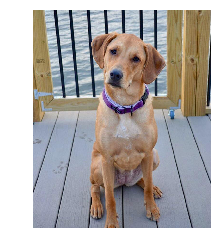

In [101]:
make_prediction_InceptionV3('images/chelsea.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Dalmatian.


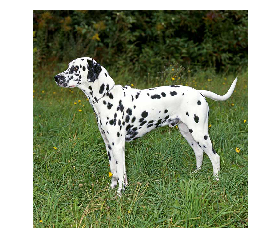

In [102]:
make_prediction_InceptionV3('images/dal.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chihuahua.


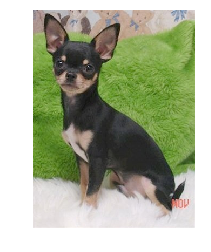

In [103]:
make_prediction_InceptionV3('images/chihuahua2.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Chihuahua.


Top 5 predictions (for mixed breeds)
Predicted breed: Chihuahua with a confidence of 0.9999
Predicted breed: Basenji with a confidence of 0.0000
Predicted breed: Pembroke welsh corgi with a confidence of 0.0000
Predicted breed: Xoloitzcuintli with a confidence of 0.0000
Predicted breed: Norwegian buhund with a confidence of 0.0000


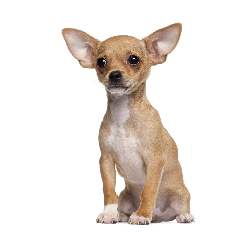

In [104]:
make_prediction_InceptionV3('images/chihuahua.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Boston terrier.


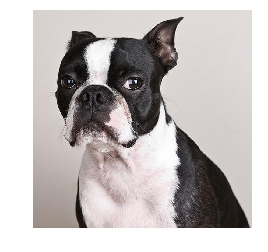

In [105]:
make_prediction_InceptionV3('images/n02096585_145.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Borzoi.


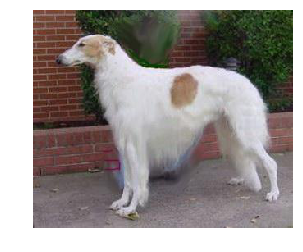

In [106]:
make_prediction_InceptionV3('images/n02090622_5890.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: American foxhound.


Top 5 predictions (for mixed breeds)
Predicted breed: American foxhound with a confidence of 0.8185
Predicted breed: Plott with a confidence of 0.1240
Predicted breed: Beagle with a confidence of 0.0366
Predicted breed: Pointer with a confidence of 0.0071
Predicted breed: Dachshund with a confidence of 0.0036


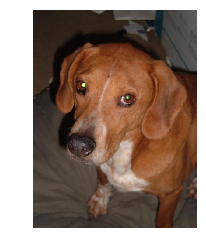

In [107]:
make_prediction_InceptionV3('images/n02090379_433.jpg', multiple_breeds = True)

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Nova scotia duck tolling retriever.


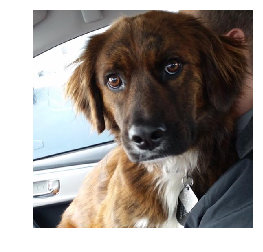

In [108]:
make_prediction_InceptionV3('images/taylor.png')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: American staffordshire terrier.


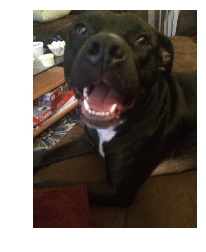

In [109]:
make_prediction_InceptionV3('images/jenny.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Plott.


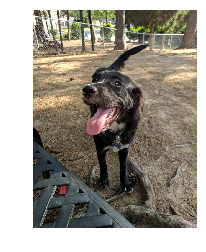

In [110]:
make_prediction_InceptionV3('images/jessie1.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Its a Dog. Breed: Airedale terrier.


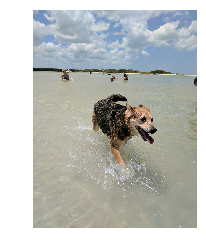

In [111]:
make_prediction_InceptionV3('images/jessie3.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a Bullmastiff.


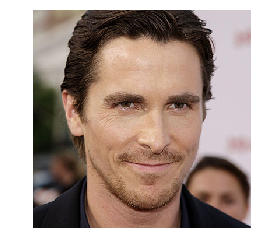

In [112]:
make_prediction_InceptionV3('images/christian.jpeg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
Hello human!
If you were a dog, you'd be a American water spaniel.


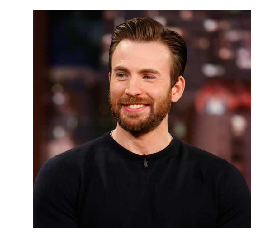

In [113]:
make_prediction_InceptionV3('images/chris.jpg')

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Predicting breed...
No human face or dog detected


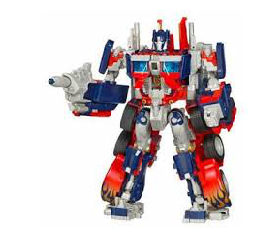

In [116]:
make_prediction_InceptionV3('images/optimus.jpg')

# References

In [5]:
# Dataset 

# Dog Images :  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# Human Images :  http://vis-www.cs.umass.edu/lfw/lfw.tgz


# Bottleneck features

# ResNet50 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz
# VGG16 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz
# VGG19 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz
# Xception : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz
# Inception_V3 : https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz"


# Algorithms

# Keras ships out-of-the-box with five Convolutional Neural Networks that have been pre-trained on the ImageNet dataset

# VGG 16 : https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py
# VGG 19 : https://github.com/fchollet/keras/blob/master/keras/applications/vgg19.py
# ResNet50 : https://github.com/fchollet/keras/blob/master/keras/applications/resnet50.py
# Xception : https://github.com/fchollet/keras/blob/master/keras/applications/xception.py
# Inception V3 : https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py


# References

# https://github.com/nikbearbrown/NEU_COE
# Keras installation: https://keras.io/#installation
# TensorFlow installation: https://www.tensorflow.org/install/
# https://www.pyimagesearch.com/2016/07/18/installing-keras-for-deep-learning/
# https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/
# cs231n.github.io/transfer-learning/
# https://github.com/fchollet/keras
# https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
# http://ijarcet.org/wp-content/uploads/IJARCET-VOL-5-ISSUE-12-2707-2715.pdf
# https://www.researchgate.net/publication/283813525_Dog_breed_classification_via_landmarks
# https://web.stanford.edu/class/cs231a/prev_projects_2016/output%20(1).pdf
# http://cs231n.stanford.edu/reports/2015/pdfs/automatic-dog-breed.pdf
# https://pdfs.semanticscholar.org/d58a/663d775c3ef6398d605b6d6dbd02fb3d8725.pdf
# http://ijarcet.org/wp-content/uploads/IJARCET-VOL-5-ISSUE-12-2707-2715.pdf
# https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Bottleneck-Interspeech2011-pub.pdf
# Very Deep Convolutional Networks for Large-Scale Image Recognition : https://arxiv.org/abs/1409.1556
# https://github.com/keras-team/keras/blob/master/keras/applications/imagenet_utils.py

# Other References

# ImageNet : http://www.image-net.org/about-overview
# Haar : https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html
# Introduction to Transfer Learning for Deep Learning : https://machinelearningmastery.com/transfer-learning-for-deep-learning/
# CNN : https://en.wikipedia.org/wiki/Convolutional_neural_network
# Deep learning architectures : https://www.ibm.com/developerworks/library/cc-machine-learning-deep-learning-architectures/index.html


# YouTube References

# https://www.youtube.com/watch?v=aircAruvnKk
# https://www.youtube.com/watch?v=IHZwWFHWa-w
# https://www.youtube.com/watch?v=Ilg3gGewQ5U
# MIT 6.S191: Introduction to Deep Learning https://youtu.be/JN6H4rQvwgY
# TensorFlow 101 (Really Awesome Intro Into TensorFlow) https://youtu.be/oxf3o8IbCk4
# Introduction to TensorFlow Tutorials https://youtu.be/er8RQZoX3yk

# Licenses

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by NISHANT GOHEL and KARAN BHAVSAR is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by NISHANT GOHEL and KARAN BHAVSAR is licensed under the MIT License https://opensource.org/licenses/MIT